This is a good paper to read:
http://ilpubs.stanford.edu:8090/917/1/conceptMining-Techrep.pdf

Here are a few others I found
https://link.springer.com/article/10.1007/BF02826953



https://www.sciencedirect.com/science/article/pii/S1532046419300383



https://www.ncbi.nlm.nih.gov/pubmed/31265066


You should also do a review of the current literature and methods/techniques in Concept Extraction. Tackle this as a research project. We'll want to leverage anything we can that's out there, and also not re-make the wheel. Also try to find how Abstract Concepts are defined (and extracted), and any techniques that are used in the NLP domain to tackle that challenge.

Cosine & Cost:
https://arxiv.org/abs/1410.6093

https://medium.com/@adriensieg/text-similarities-da019229c894

https://github.com/adsieg/text_similarity

https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f

https://towardsdatascience.com/custom-loss-functions-for-gradient-boosting-f79c1b40466d

https://stackoverflow.com/questions/51657527/implementing-custom-stopping-metrics-to-optimize-during-training-in-h2o-model-di

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html

Genism Wod 2VEc :
https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.Xr7VRRNKh0s

https://github.com/kavgan/nlp-in-practice/tree/master/word2vec

https://www.quora.com/profile/Kavita-Ganesan-1

Search: Group All similar words and convert to Vector NLP Python

https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

https://ireneli.eu/2016/07/27/nlp-05-from-word2vec-to-doc2vec-a-simple-example-with-gensim/

https://www.quora.com/How-do-you-extract-vectors-from-word2vec-given-a-word

https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

--- convert any word to vector : Two Methods: 
* Gensim:build a model that can give a vector for any word that is not in the corpus
https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

* Which algorithm is used for learning a word embedding that is not from a text corpus. 
https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/

1. Pre-trained 2. Custom Built Model.

Infer Vector:

https://groups.google.com/forum/#!topic/gensim/vMwRkH4SdvU



### Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('news.csv', delimiter =',')

In [3]:
df.head()

Unnamed: 0                   authors  \
0           0              ['Cbc News']   
1           1              ['Cbc News']   
2           2  ['The Associated Press']   
3           3              ['Cbc News']   
4           4              ['Cbc News']   

                                               title         publish_date  \
0  Coronavirus a 'wake-up call' for Canada's pres...  2020-03-27 08:00:00   
1  Yukon gov't names 2 possible sources of corona...  2020-03-27 01:45:00   
2  U.S. Senate passes $2T coronavirus relief package  2020-03-26 05:13:00   
3  Coronavirus: The latest in drug treatment and ...  2020-03-27 00:36:00   
4  The latest on the coronavirus outbreak for Mar...  2020-03-26 20:57:00   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                                 url  
0  https://www.cbc.ca/news/health/covid-19-drug-s...  
1  https://www.cbc.ca/news/canada/north/yukon-cor...  
2  https://www.cbc.ca/news/world/senate-coronavir...  
3  https://www.cbc.ca/news/health/coronavirus-tre...  
4  https://www.cbc.ca/news/the-latest-on-the-coro...

In [4]:
df.shape

(3566, 7)

In [5]:
df.describe()

Unnamed: 0
count  3566.000000
mean   2455.649748
std    1298.529450
min       0.000000
25%    1473.250000
50%    2496.500000
75%    3569.750000
max    4608.000000

#### Dropping unwanted columns

In [6]:
df.drop(["Unnamed: 0",'publish_date','url'], axis = 1, inplace = True)

In [7]:
df.head()

authors  \
0              ['Cbc News']   
1              ['Cbc News']   
2  ['The Associated Press']   
3              ['Cbc News']   
4              ['Cbc News']   

                                               title  \
0  Coronavirus a 'wake-up call' for Canada's pres...   
1  Yukon gov't names 2 possible sources of corona...   
2  U.S. Senate passes $2T coronavirus relief package   
3  Coronavirus: The latest in drug treatment and ...   
4  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  
0  Canadian pharmacies are limiting how much medi...  
1  The Yukon government has identified two places...  
2  The Senate late Wednesday passed an unparallel...  
3  Scientists around the world are racing to find...  
4      Trudeau says rules of Quarantine Act will ...

In [8]:
df['authors'] = df['authors'].str.strip('[]')
df['authors'] = df['authors'].str.strip('  ''')
df['authors'] = df.authors.str.replace("[({':]", "")
df['authors'] = df['authors'].str.lower()

In [9]:
df.head()

authors                                              title  \
0              cbc news  Coronavirus a 'wake-up call' for Canada's pres...   
1              cbc news  Yukon gov't names 2 possible sources of corona...   
2  the associated press  U.S. Senate passes $2T coronavirus relief package   
3              cbc news  Coronavirus: The latest in drug treatment and ...   
4              cbc news  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  
0  Canadian pharmacies are limiting how much medi...  
1  The Yukon government has identified two places...  
2  The Senate late Wednesday passed an unparallel...  
3  Scientists around the world are racing to find...  
4      Trudeau says rules of Quarantine Act will ...

In [10]:
df['authors'].nunique()

261

In [11]:
#df['authors'].unique()

#### Cleaning Authors Column

In [12]:
import re

df['authors'].replace(to_replace = [r'cbcs?\b.*',r'.*\bcbcs?', r'.*cbcnews.*'], value='cbc', regex=True, inplace=True)
df['authors'].replace(to_replace = ['the associated press'], value='associated press', inplace=True)
df['authors'].replace(to_replace = [r'canadian?\b.*',r'.*\bcanadian?'], value='canadian', regex=True, inplace=True)
df['authors'].replace(to_replace = [r'freelancer?\b.*',r'.*\bfreelancer?'], value='freelancer', regex=True, inplace=True)


In [13]:
df['authors']

0                                                     cbc
1                                                     cbc
2                                        associated press
3                                                     cbc
4                                                     cbc
5                                                     cbc
6                                                     cbc
7                                        associated press
8                                         thomson reuters
9                                                     cbc
10                                                    cbc
11                                                    cbc
12      colleen m. flood is director of the centre for...
13                                                    cbc
14                                                    cbc
15                                                    cbc
16                                                       
17            

In [14]:
df['authors'].nunique()

36

## Explore the dataset

In [15]:
# What is the shape of the dataset?

print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 3566 rows and 4 columns


In [16]:
# How many News Authors are there? Considering Authors as Label.

print("Out of {} rows, {} are CBC News, {} are Associated Press".format(len(df),
                                                       len(df[df['authors']=='Cbc News']),
                                                       len(df[df['authors']=='The Associated Press'])))

Out of 3566 rows, 0 are CBC News, 0 are Associated Press


In [17]:
# How much missing data is there?

print("Number of null in label: {}".format(df['authors'].isnull().sum()))
print("Number of null in text: {}".format(df['text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


## NLP Basics: Implementing a pipeline to clean text

### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes. These would be loaded to machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**
2. **Tokenization**
3. **Remove stopwords**
4. **Lemmatize/Stem**

In [18]:
df.head()

authors                                              title  \
0               cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1               cbc  Yukon gov't names 2 possible sources of corona...   
2  associated press  U.S. Senate passes $2T coronavirus relief package   
3               cbc  Coronavirus: The latest in drug treatment and ...   
4               cbc  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  
0  Canadian pharmacies are limiting how much medi...  
1  The Yukon government has identified two places...  
2  The Senate late Wednesday passed an unparallel...  
3  Scientists around the world are racing to find...  
4      Trudeau says rules of Quarantine Act will ...

### Remove punctuation

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [17]:
df['body_text_clean'] = df['text'].apply(lambda x: remove_punct(x))

In [18]:
df.head()

authors                                              title  \
0               cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1               cbc  Yukon gov't names 2 possible sources of corona...   
2  associated press  U.S. Senate passes $2T coronavirus relief package   
3               cbc  Coronavirus: The latest in drug treatment and ...   
4               cbc  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                     body_text_clean  
0  Canadian pharmacies are limiting how much medi...  
1  The Yukon government has identified two places...  
2  The Senate late Wednesday passed an unparallel...  
3  Scientists around the world are racing to find...  
4      Trudeau says rules of Quarantine Act will ...

### Tokenization

In [19]:
import re

In [20]:
def tokenize(text):
    tokens = re.split('\\W+', text)
    return tokens

In [21]:
df['body_text_tokenized'] = df['body_text_clean'].apply(lambda x: tokenize(x.lower()))

In [22]:
df.head()

authors                                              title  \
0               cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1               cbc  Yukon gov't names 2 possible sources of corona...   
2  associated press  U.S. Senate passes $2T coronavirus relief package   
3               cbc  Coronavirus: The latest in drug treatment and ...   
4               cbc  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                 body_text_tokenized  
0  [canadian, pharmacies, are, limiting, how, muc...  
1  [the, yukon, government, has, identified, two,...  
2  [the, senate, late, wednesday, passed, an, unp...  
3  [scientists, around, the, world, are, racing, ...  
4  [, trudeau, says, rules, of, quarantine, act, ...

### Remove stopwords

In [23]:
import nltk

#from nltk.corpus import stopwords
#stopwords.words('english')

In [24]:
stopword = nltk.corpus.stopwords.words('english')

In [26]:
#stopword

In [25]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

In [26]:
df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

## Supplemental Data Cleaning: Using Stemming

In [29]:
import nltk

ps = nltk.PorterStemmer()   # Test out Porter stemmer

In [34]:
# dir(ps)

* Examples

In [35]:
#print(ps.stem('grows'))
#print(ps.stem('growing'))
#print(ps.stem('grow'))

In [36]:
#print(ps.stem('run'))
#print(ps.stem('running'))
#print(ps.stem('runner'))

### Stem text

In [30]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [31]:
df['body_text_stemmed'] = df['body_text_nostop'].apply(lambda x: stemming(x))

In [32]:
df.head()

authors                                              title  \
0               cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1               cbc  Yukon gov't names 2 possible sources of corona...   
2  associated press  U.S. Senate passes $2T coronavirus relief package   
3               cbc  Coronavirus: The latest in drug treatment and ...   
4               cbc  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   
1  [the, yukon, government, has, identified, two,...   
2  [the, senate, late, wednesday, passed, an, unp...   
3  [scientists, around, the, world, are, racing, ...   
4  [, trudeau, says, rules, of, quarantine, act, ...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   
1  [yukon, government, identified, two, places, w...   
2  [senate, late, wednesday, passed, unparalleled...   
3  [scientists, around, world, racing, find, nove...   
4  [, trudeau, says, rules, quarantine, act, enfo...   

                                   body_text_stemmed  
0  [canadian, pharmaci, limit, much, medic, dispe...  
1  [yukon, govern, identifi, two, place, whitehor...  
2  [senat, late, wednesday, pass, unparallel, 22,...  
3  [scientist, around, world, race, find, novel, ...  
4  [, trudeau, say, rule, quarantin, act, enforc,...

In [33]:
#df.groupby(['authors']).sum()

### Supplemental Data Cleaning: Using a Lemmatizer

In [27]:
# nltk.download()
import nltk

wn = nltk.WordNetLemmatizer()   # https://wordnet.princeton.edu/
ps = nltk.PorterStemmer()

In [35]:
#dir(wn)

* Examples

In [43]:
#print(ps.stem('meanness'))
#print(ps.stem('meaning'))

In [44]:
#print(wn.lemmatize('meanness'))
#print(wn.lemmatize('meaning'))

In [45]:
# Step 0: Import packages and stopwords
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.utils import simple_preprocess, lemmatize
from nltk.corpus import stopwords
import re
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)
stop_words = stopwords.words('english')
stop_words = stop_words + ['com', 'edu', 'lines', 'would', 'could','said', 'http']

In [28]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [29]:
df['body_text_lemmatized'] = df['body_text_nostop'].apply(lambda x: lemmatizing(x))

In [30]:
df.head(2)

authors                                              title  \
0     cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1     cbc  Yukon gov't names 2 possible sources of corona...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   
1  [the, yukon, government, has, identified, two,...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   
1  [yukon, government, identified, two, places, w...   

                                body_text_lemmatized  
0  [canadian, pharmacy, limiting, much, medicatio...  
1  [yukon, government, identified, two, place, wh...

In [31]:
len(df['body_text_lemmatized'])

3566

In [40]:
print("Total words in first row i.e row 0:",len(df['body_text_lemmatized'][0]))
print("Total words in first row i.e row 1:",len(df['body_text_lemmatized'][1]))

Total words in first row i.e row 0: 242
Total words in first row i.e row 1: 179


In [49]:
#pip install pattern3

In [50]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.utils import simple_preprocess, lemmatize

In [53]:
#pip install https://github.com/clips/pattern/archive/python3.zip

In [54]:
#pip install ConfigParser

In [55]:
#from ConfigParser import SafeConfigParser

In [56]:
#pip install mysql-python

In [51]:
# https://www.machinelearningplus.com/nlp/gensim-tutorial/

import gensim
from gensim import corpora
from pprint import pprint

In [52]:
len(df['body_text_lemmatized'])
# there are 3566 rows . Each row has many words in its lemmatized form. 

3566

In [53]:
# Create dictionary
dictionary = corpora.Dictionary(df['body_text_lemmatized'])

# In gensim, the dictionary contains a map of all words (tokens) to its unique id.

2020-05-27 09:49:01,544 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-27 09:49:03,395 : INFO : built Dictionary(38483 unique tokens: ['', '2000', '30day', '80', 'acetaminophen']...) from 3566 documents (total 1502567 corpus positions)


In [54]:
print(dictionary)

# This dictionary has 38483 Unique words.

Dictionary(38483 unique tokens: ['', '2000', '30day', '80', 'acetaminophen']...)


In [55]:
# Let’s see the unique ids for each of these tokens.
# Show the word to id map
#print(dictionary.token2id)

In [56]:
from nltk.corpus import wordnet

In [57]:
wordnet.synsets("fever")

[Synset('fever.n.01'), Synset('fever.n.02')]

In [58]:
#data_processed = 

In [59]:
# Create the Inputs of LDA model: Dictionary and Corpus
dct = corpora.Dictionary(df['body_text_lemmatized'])

2020-05-27 09:49:09,313 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-27 09:49:11,486 : INFO : built Dictionary(38483 unique tokens: ['', '2000', '30day', '80', 'acetaminophen']...) from 3566 documents (total 1502567 corpus positions)


In [60]:
print(dct)
# this dct has all the unique words that are in the data frame column 'body_text_lemmatized'

Dictionary(38483 unique tokens: ['', '2000', '30day', '80', 'acetaminophen']...)


In [61]:
corpus = [dct.doc2bow(line) for line in df['body_text_lemmatized']]

In [62]:
type(corpus)

list

In [63]:
corpus[0:5]  #.  Row 1: starts from : (0,1) to (160,1).   Row2: Starts from (18,1),....

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 3),
  (6, 1),
  (7, 2),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 3),
  (21, 2),
  (22, 3),
  (23, 3),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 11),
  (39, 1),
  (40, 4),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 4),
  (65, 3),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 4),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1

Interpretation of corpus:
The (0, 1) in line 1 or row 1 means, the word with id=0 appears once in the row 1.
Likewise, the (3, 2)  means the word with id 3 appears 2 times in the row 1. And so on.

We have the Dictionary and Corpus created. Let’s build a LDA topic model with 7 topics, using LdaMulticore(). 7 topics is an arbitrary choice for now.

In [64]:
# Step 4: Train the LDA model
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dct,
                         random_state=100,
                         num_topics=7,
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         #alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

2020-05-27 09:49:12,892 : INFO : using symmetric alpha at 0.14285714285714285
2020-05-27 09:49:12,895 : INFO : using symmetric eta at 0.14285714285714285
2020-05-27 09:49:12,904 : INFO : using serial LDA version on this node
2020-05-27 09:49:12,986 : INFO : running online LDA training, 7 topics, 10 passes over the supplied corpus of 3566 documents, updating every 3000 documents, evaluating every ~0 documents, iterating 100x with a convergence threshold of 0.001000
2020-05-27 09:49:12,988 : INFO : training LDA model using 3 processes
2020-05-27 09:49:13,059 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #1000/3566, outstanding queue size 1
2020-05-27 09:49:13,333 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #2000/3566, outstanding queue size 2
2020-05-27 09:49:13,343 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #3000/3566, outstanding queue size 3
2020-05-27 09:49:13,348 : INFO : PROGRESS: pass 0, dispatched chunk #3 = documents 

2020-05-27 09:50:02,192 : INFO : topic diff=0.129703, rho=0.119895
2020-05-27 09:50:03,232 : INFO : merging changes from 566 documents into a model of 3566 documents
2020-05-27 09:50:03,250 : INFO : topic #6 (0.143): 0.009*"said" + 0.004*"health" + 0.003*"covid19" + 0.003*"people" + 0.003*"canadian" + 0.002*"say" + 0.002*"week" + 0.002*"case" + 0.002*"government" + 0.002*"hand"
2020-05-27 09:50:03,252 : INFO : topic #2 (0.143): 0.007*"said" + 0.003*"covid19" + 0.003*"people" + 0.003*"health" + 0.002*"coronavirus" + 0.002*"also" + 0.002*"public" + 0.002*"time" + 0.002*"canadian" + 0.002*"city"
2020-05-27 09:50:03,255 : INFO : topic #1 (0.143): 0.007*"said" + 0.005*"health" + 0.004*"people" + 0.004*"covid19" + 0.003*"case" + 0.003*"coronavirus" + 0.002*"hospital" + 0.002*"canada" + 0.002*"public" + 0.002*"say"
2020-05-27 09:50:03,257 : INFO : topic #4 (0.143): 0.014*"said" + 0.008*"people" + 0.007*"case" + 0.006*"health" + 0.006*"covid19" + 0.004*"say" + 0.003*"virus" + 0.003*"care" + 0.

2020-05-27 09:50:31,230 : INFO : topic #0 (0.143): 0.020*"said" + 0.012*"health" + 0.012*"case" + 0.009*"people" + 0.009*"coronavirus" + 0.008*"covid19" + 0.007*"canadian" + 0.007*"canada" + 0.006*"virus" + 0.006*"china"
2020-05-27 09:50:31,232 : INFO : topic #2 (0.143): 0.007*"said" + 0.003*"covid19" + 0.003*"people" + 0.003*"richey" + 0.002*"schlatter" + 0.002*"health" + 0.002*"coronavirus" + 0.002*"also" + 0.002*"time" + 0.002*"day"
2020-05-27 09:50:31,236 : INFO : topic #3 (0.143): 0.020*"said" + 0.009*"covid19" + 0.008*"people" + 0.007*"health" + 0.005*"government" + 0.005*"say" + 0.004*"also" + 0.004*"public" + 0.004*"province" + 0.004*"need"
2020-05-27 09:50:31,238 : INFO : topic diff=0.141647, rho=0.117391
2020-05-27 09:50:32,168 : INFO : merging changes from 566 documents into a model of 3566 documents
2020-05-27 09:50:32,187 : INFO : topic #6 (0.143): 0.009*"said" + 0.004*"sanitizer" + 0.004*"hand" + 0.003*"health" + 0.003*"covid19" + 0.003*"canadian" + 0.002*"distillery" + 0

2020-05-27 09:50:53,534 : INFO : PROGRESS: pass 8, dispatched chunk #2 = documents up to #3000/3566, outstanding queue size 3
2020-05-27 09:50:53,536 : INFO : PROGRESS: pass 8, dispatched chunk #3 = documents up to #3566/3566, outstanding queue size 4
2020-05-27 09:51:01,829 : INFO : merging changes from 3000 documents into a model of 3566 documents
2020-05-27 09:51:01,847 : INFO : topic #6 (0.143): 0.009*"said" + 0.006*"sanitizer" + 0.006*"hand" + 0.004*"distillery" + 0.004*"worker" + 0.003*"company" + 0.003*"canadian" + 0.002*"covid19" + 0.002*"lng" + 0.002*"health"
2020-05-27 09:51:01,850 : INFO : topic #5 (0.143): 0.016*"said" + 0.004*"people" + 0.004*"say" + 0.004*"year" + 0.004*"one" + 0.003*"day" + 0.003*"time" + 0.003*"canada" + 0.003*"school" + 0.003*"covid19"
2020-05-27 09:51:01,853 : INFO : topic #3 (0.143): 0.020*"said" + 0.010*"covid19" + 0.008*"people" + 0.007*"health" + 0.005*"government" + 0.005*"say" + 0.004*"also" + 0.004*"province" + 0.004*"public" + 0.004*"need"
202

In [81]:
# save the model
#lda_model.save('lda_model.model')

# See the topics
lda_model.print_topics(-1)

2020-05-15 11:55:22,858 : INFO : topic #0 (0.143): 0.021*"said" + 0.013*"health" + 0.012*"case" + 0.010*"people" + 0.009*"coronavirus" + 0.008*"covid19" + 0.008*"canadian" + 0.007*"canada" + 0.006*"china" + 0.006*"virus"
2020-05-15 11:55:22,861 : INFO : topic #1 (0.143): 0.007*"said" + 0.004*"hand" + 0.004*"sanitizer" + 0.004*"covid19" + 0.003*"dillon" + 0.003*"health" + 0.003*"zbar" + 0.003*"theatre" + 0.003*"people" + 0.002*"award"
2020-05-15 11:55:22,863 : INFO : topic #2 (0.143): 0.007*"said" + 0.005*"richey" + 0.005*"schlatter" + 0.003*"trial" + 0.002*"jury" + 0.002*"later" + 0.002*"te" + 0.002*"new" + 0.002*"read" + 0.002*"kalen"
2020-05-15 11:55:22,866 : INFO : topic #3 (0.143): 0.020*"said" + 0.010*"covid19" + 0.007*"people" + 0.007*"health" + 0.005*"government" + 0.004*"say" + 0.004*"also" + 0.004*"province" + 0.004*"public" + 0.004*"need"
2020-05-15 11:55:22,868 : INFO : topic #4 (0.143): 0.015*"said" + 0.008*"people" + 0.007*"health" + 0.007*"case" + 0.006*"covid19" + 0.005*

[(0,
  '0.021*"said" + 0.013*"health" + 0.012*"case" + 0.010*"people" + 0.009*"coronavirus" + 0.008*"covid19" + 0.008*"canadian" + 0.007*"canada" + 0.006*"china" + 0.006*"virus"'),
 (1,
  '0.007*"said" + 0.004*"hand" + 0.004*"sanitizer" + 0.004*"covid19" + 0.003*"dillon" + 0.003*"health" + 0.003*"zbar" + 0.003*"theatre" + 0.003*"people" + 0.002*"award"'),
 (2,
  '0.007*"said" + 0.005*"richey" + 0.005*"schlatter" + 0.003*"trial" + 0.002*"jury" + 0.002*"later" + 0.002*"te" + 0.002*"new" + 0.002*"read" + 0.002*"kalen"'),
 (3,
  '0.020*"said" + 0.010*"covid19" + 0.007*"people" + 0.007*"health" + 0.005*"government" + 0.004*"say" + 0.004*"also" + 0.004*"province" + 0.004*"public" + 0.004*"need"'),
 (4,
  '0.015*"said" + 0.008*"people" + 0.007*"health" + 0.007*"case" + 0.006*"covid19" + 0.005*"virus" + 0.005*"say" + 0.004*"also" + 0.004*"one" + 0.004*"outbreak"'),
 (5,
  '0.016*"said" + 0.005*"year" + 0.004*"say" + 0.004*"people" + 0.004*"one" + 0.004*"time" + 0.004*"day" + 0.003*"canada" + 0

In [76]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [78]:
#vis = pyLDAvis.gensim.prepare(lda_model, corpus, dct)

In [ ]:
vis

In [79]:
df.head()

authors                                              title  \
0               cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1               cbc  Yukon gov't names 2 possible sources of corona...   
2  associated press  U.S. Senate passes $2T coronavirus relief package   
3               cbc  Coronavirus: The latest in drug treatment and ...   
4               cbc  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   
1  [the, yukon, government, has, identified, two,...   
2  [the, senate, late, wednesday, passed, an, unp...   
3  [scientists, around, the, world, are, racing, ...   
4  [, trudeau, says, rules, of, quarantine, act, ...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   
1  [yukon, government, identified, two, places, w...   
2  [senate, late, wednesday, passed, unparalleled...   
3  [scientists, around, world, racing, find, nove...   
4  [, trudeau, says, rules, quarantine, act, enfo...   

                                   body_text_stemmed  \
0  [canadian, pharmaci, limit, much, medic, dispe...   
1  [yukon, govern, identifi, two, place, whitehor...   
2  [senat, late, wednesday, pass, unparallel, 22,...   
3  [scientist, around, world, race, find, novel, ...   
4  [, trudeau, say, rule, quarantin, act, enforc,...   

                                body_text_lemmatized  
0  [canadian, pharmacy, limiting, much, medicatio...  
1  [yukon, government, identified, two, place, wh...  
2  [senate, late, wednesday, passed, unparalleled...  
3  [scientist, around, world, racing, find, novel...  
4  [, trudeau, say, rule, quarantine, act, enforc...

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [70]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['body_text_clean'])

In [71]:
print(tfidf_matrix.shape)
# There are 3566 rows and 42567 columns. 


(3566, 42567)


In [72]:
print(tfidf_matrix)

  (0, 7626)	0.03886941016883063
  (0, 29342)	0.08305434236294314
  (0, 4532)	0.059176403002430704
  (0, 23322)	0.03431678623350348
  (0, 19056)	0.031549051163664396
  (0, 26084)	0.02169376875824688
  (0, 24896)	0.04477647898830833
  (0, 7567)	0.013138408668947905
  (0, 5646)	0.010204049503112498
  (0, 12747)	0.07046934725497668
  (0, 38589)	0.15883041237790482
  (0, 39263)	0.02778799175412062
  (0, 30441)	0.023641117775322292
  (0, 34988)	0.19132628057428766
  (0, 31753)	0.05667712508174441
  (0, 38155)	0.07841599115813623
  (0, 25967)	0.03608371437258685
  (0, 3126)	0.12265475444176566
  (0, 20565)	0.1676014145980597
  (0, 16012)	0.038059183237259
  (0, 13342)	0.40513665400038
  (0, 9469)	0.04010198944270438
  (0, 16395)	0.06177868231738877
  (0, 20390)	0.18812867765768865
  (0, 4066)	0.11208415808138217
  :	:
  (3565, 39982)	0.05521158267474437
  (3565, 31065)	0.04718667002093887
  (3565, 27984)	0.059264123301996534
  (3565, 11466)	0.04542287001781137
  (3565, 14492)	0.05401711790240

In [73]:
type(tfidf_matrix)

scipy.sparse.csr.csr_matrix

In [74]:
# http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/
from sklearn.metrics.pairwise import cosine_similarity

###### Explanation of Cosine Similarity:

* Each document means each row.

* So the cosine similarity gives the similarity score of each row with all other rows.

* The tfidf_matrix[0] is the Scipy operation to get the first row of the sparse matrix and the resulting array is the Cosine Similarity between the first row with all the rows in the dataframe.

* Note that the first value of the array is 1.0 because it is the Cosine Similarity between the first row with itself. If you take second row, the second place value is 1.0 and the first place value is the comparision between the first row and second row.

* Also note that due to the presence of similar words in any row for example compare 7 and 9 as it is regarding the hospitals, it achieved a better score.

In [75]:
df.head(1)

authors                                              title  \
0     cbc  Coronavirus a 'wake-up call' for Canada's pres...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   

                                   body_text_stemmed  \
0  [canadian, pharmaci, limit, much, medic, dispe...   

                                body_text_lemmatized  
0  [canadian, pharmacy, limiting, much, medicatio...

In [76]:
len(df)

3566

In [77]:
cosine_similarity(tfidf_matrix, tfidf_matrix)

array([[1.        , 0.11110562, 0.17062852, ..., 0.03798085, 0.14342861,
        0.14990991],
       [0.11110562, 1.        , 0.17492976, ..., 0.04109605, 0.15497296,
        0.17239165],
       [0.17062852, 0.17492976, 1.        , ..., 0.05978298, 0.21686735,
        0.2126821 ],
       ...,
       [0.03798085, 0.04109605, 0.05978298, ..., 1.        , 0.0508887 ,
        0.05907265],
       [0.14342861, 0.15497296, 0.21686735, ..., 0.0508887 , 1.        ,
        0.39913774],
       [0.14990991, 0.17239165, 0.2126821 , ..., 0.05907265, 0.39913774,
        1.        ]])

In [135]:
cosine_similarity(tfidf_matrix, tfidf_matrix)[19][15]

0.36845303311139066

In [115]:
cosine_similarity(tfidf_matrix[1], tfidf_matrix)

array([[0.11110562, 1.        , 0.17492976, ..., 0.04109605, 0.15497296,
        0.17239165]])

In [92]:
df['body_text_clean'][0:10]

0    Canadian pharmacies are limiting how much medi...
1    The Yukon government has identified two places...
2    The Senate late Wednesday passed an unparallel...
3    Scientists around the world are racing to find...
4        Trudeau says rules of Quarantine Act will ...
5    The continued existence of wildlife markets wh...
6    Recent developments  Two new cases in western ...
7    Michigan hospitals are bracing for a surge of ...
8    The number of confirmed COVID19 cases in the U...
9    The Jewish General Hospital plans to set up tr...
Name: body_text_clean, dtype: object

In [ ]:
#df['body_text_clean'][15]

In [137]:
#df['body_text_clean'][19]

In [ ]:
####  Lets for instance, check the angle between the 7th and 9th rows:

Links:
    
https://www.machinelearningplus.com/nlp/cosine-similarity/
https://www.machinelearningplus.com/nlp/gensim-tutorial/
https://pythonprogramming.net/wordnet-nltk-tutorial/
    https://www.researchgate.net/post/How_to_compute_similarity_score_of_one_text_with_many_other_text_using_Jaccard_Similarity
    
   https://kanoki.org/2018/12/27/text-matching-cosine-similarity/
   
   https://www.geeksforgeeks.org/python-measure-similarity-between-two-sentences-using-cosine-similarity/

http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/


https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

In [110]:
import math

In [116]:
# This was already calculated on the previous step, so we just use the value
cos_sim = 0.11110562

In [117]:
angle_in_radians = math.acos(cos_sim)

In [118]:
print(math.degrees(angle_in_radians))
### Higher the Angle degree less similar the text words.

83.62094636920347


In [ ]:
df.head()

In [ ]:
# form a set containing keywords of both strings  
rvector = X_set.union(Y_set)  
for w in rvector: 
    if w in X_set: l1.append(1) # create a vector 
    else: l1.append(0) 
    if w in Y_set: l2.append(1) 
    else: l2.append(0) 
c = 0
  
# cosine formula  
for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
cosine = c / float((sum(l1)*sum(l2))**0.5) 
print("similarity: ", cosine) 

In [89]:
df.head()

authors                                              title  \
0               cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1               cbc  Yukon gov't names 2 possible sources of corona...   
2  associated press  U.S. Senate passes $2T coronavirus relief package   
3               cbc  Coronavirus: The latest in drug treatment and ...   
4               cbc  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   
1  [the, yukon, government, has, identified, two,...   
2  [the, senate, late, wednesday, passed, an, unp...   
3  [scientists, around, the, world, are, racing, ...   
4  [, trudeau, says, rules, of, quarantine, act, ...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   
1  [yukon, government, identified, two, places, w...   
2  [senate, late, wednesday, passed, unparalleled...   
3  [scientists, around, world, racing, find, nove...   
4  [, trudeau, says, rules, quarantine, act, enfo...   

                                   body_text_stemmed  \
0  [canadian, pharmaci, limit, much, medic, dispe...   
1  [yukon, govern, identifi, two, place, whitehor...   
2  [senat, late, wednesday, pass, unparallel, 22,...   
3  [scientist, around, world, race, find, novel, ...   
4  [, trudeau, say, rule, quarantin, act, enforc,...   

                                body_text_lemmatized  
0  [canadian, pharmacy, limiting, much, medicatio...  
1  [yukon, government, identified, two, place, wh...  
2  [senate, late, wednesday, passed, unparalleled...  
3  [scientist, around, world, racing, find, novel...  
4  [, trudeau, say, rule, quarantine, act, enforc...

In [83]:
# imports needed and set up logging
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [82]:
documents = df['body_text_lemmatized']

In [111]:
#documents

## WORD 2 VEC

In [78]:
## https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

https://radimrehurek.com/gensim/models/keyedvectors.html
    
https://radimrehurek.com/gensim/models/keyedvectors.html

SyntaxError: invalid syntax (<ipython-input-78-2b65d17f3783>, line 3)

In [79]:
# build vocabulary and train model
"""
model = gensim.models.Word2Vec(
        documents,
        size=150,
        window=10,
        min_count=2,
        workers=10,
        iter=10) """

'\nmodel = gensim.models.Word2Vec(\n        documents,\n        size=150,\n        window=10,\n        min_count=2,\n        workers=10,\n        iter=10) '

In [51]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [84]:
model = gensim.models.Word2Vec(documents, size=15, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2020-05-21 12:35:44,317 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-05-21 12:35:44,318 : INFO : collecting all words and their counts
2020-05-21 12:35:44,319 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-21 12:35:44,687 : INFO : collected 38483 word types from a corpus of 1502567 raw words and 3566 sentences
2020-05-21 12:35:44,688 : INFO : Loading a fresh vocabulary
2020-05-21 12:35:44,751 : INFO : effective_min_count=2 retains 26341 unique words (68% of original 38483, drops 12142)
2020-05-21 12:35:44,753 : INFO : effective_min_count=2 leaves 1490425 word corpus (99% of original 1502567, drops 12142)
2020-05-21 12:35:44,855 : INFO : deleting the raw counts dictionary of 38483 items
2020-05-21 12:35:44,857 : INFO : sample=0.001 downsamples 26 most-common words
2020-05-21 12:35:44,858 : INFO : downsampling leaves estimated 1414732 word corpus (94.9% of prior 1490425)
2020-05-21 12:35:44,951 : INFO : estima

2020-05-21 12:35:55,716 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-21 12:35:55,720 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 12:35:55,724 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 12:35:55,724 : INFO : EPOCH - 1 : training on 1502567 raw words (1414945 effective words) took 1.7s, 831282 effective words/s
2020-05-21 12:35:56,731 : INFO : EPOCH 2 - PROGRESS: at 52.52% examples, 781554 words/s, in_qsize 19, out_qsize 0
2020-05-21 12:35:57,378 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-05-21 12:35:57,387 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-05-21 12:35:57,388 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-05-21 12:35:57,390 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-05-21 12:35:57,419 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-05-21 12:35:57,4

2020-05-21 12:36:07,954 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-21 12:36:07,958 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-21 12:36:07,959 : INFO : EPOCH - 8 : training on 1502567 raw words (1414440 effective words) took 1.7s, 835719 effective words/s
2020-05-21 12:36:09,003 : INFO : EPOCH 9 - PROGRESS: at 53.20% examples, 763177 words/s, in_qsize 19, out_qsize 0
2020-05-21 12:36:09,621 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-05-21 12:36:09,622 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-05-21 12:36:09,678 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-05-21 12:36:09,686 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-05-21 12:36:09,696 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-05-21 12:36:09,700 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-05-21 12:36:09,7

(14147331, 15025670)

In [282]:
#model = gensim.models.Word2Vec (documents, size=15, window=10, min_count=2, workers=10)
#model.train(documents,total_examples=len(documents),epochs=10)

In [140]:
#model.save_word2vec_format("sample")


In [285]:
print(model)

Word2Vec(vocab=26341, size=15, alpha=0.025)


In [286]:
print(model.corpus_total_words)

1502567


In [287]:
vector = model.most_similar('pharmacy')  # numpy vector of a word

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2020-05-16 10:53:00,587 : INFO : precomputing L2-norms of word weight vectors


In [288]:
vector

[('item', 0.885820746421814),
 ('saveonfoods', 0.8698201179504395),
 ('supermarket', 0.8226836323738098),
 ('walmart', 0.8045311570167542),
 ('gown', 0.8031696677207947),
 ('shopper', 0.8024187088012695),
 ('sanitizer', 0.7963298559188843),
 ('household', 0.7840445041656494),
 ('store', 0.7792531251907349),
 ('happensnova', 0.7777266502380371)]

In [289]:
print(model.most_similar('pharmacy'))

[('item', 0.885820746421814), ('saveonfoods', 0.8698201179504395), ('supermarket', 0.8226836323738098), ('walmart', 0.8045311570167542), ('gown', 0.8031696677207947), ('shopper', 0.8024187088012695), ('sanitizer', 0.7963298559188843), ('household', 0.7840445041656494), ('store', 0.7792531251907349), ('happensnova', 0.7777266502380371)]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [290]:
w1 = "pharmacy"
model.wv.most_similar(positive=w1)

[('item', 0.885820746421814),
 ('saveonfoods', 0.8698201179504395),
 ('supermarket', 0.8226836323738098),
 ('walmart', 0.8045311570167542),
 ('gown', 0.8031696677207947),
 ('shopper', 0.8024187088012695),
 ('sanitizer', 0.7963298559188843),
 ('household', 0.7840445041656494),
 ('store', 0.7792531251907349),
 ('happensnova', 0.7777266502380371)]

In [291]:
# look up top 6 words similar to 'polite'
w1 = ["canadian"]
model.wv.most_similar (positive=w1,topn=6)

[('repatriate', 0.8539537191390991),
 ('airlift', 0.8105179667472839),
 ('stranded', 0.7997399568557739),
 ('repatriation', 0.7916631698608398),
 ('canada', 0.7869678139686584),
 ('champagne', 0.7863779067993164)]

In [120]:
# look up top 6 words similar to 'polite'
w1 = ["government"]
model.wv.most_similar (positive=w1,topn=6)

[('zeroing', 0.558214545249939),
 ('counterpart', 0.49010032415390015),
 ('legislation', 0.4703233540058136),
 ('reserve', 0.46247804164886475),
 ('constitutionality', 0.4583984315395355),
 ('sincerely', 0.4400820732116699)]

In [119]:
# look up top 6 words similar to 'polite'
w1 = ["scientist"]
model.wv.most_similar (positive=w1,topn=6)

[('researcher', 0.8705568313598633),
 ('sequence', 0.7743020057678223),
 ('genetic', 0.7713807821273804),
 ('sequencing', 0.7636632919311523),
 ('sarscov2', 0.7525931596755981),
 ('antiviral', 0.7457045912742615)]

In [122]:
# look up top 6 words similar to 'polite'
w1 = ["virus"]
model.wv.most_similar (positive=w1,topn=6)

[('illness', 0.6054689288139343),
 ('pathogen', 0.5820873975753784),
 ('disease', 0.5766044855117798),
 ('easily', 0.571129560470581),
 ('persontoperson', 0.5672399997711182),
 ('evidence', 0.5560476779937744)]

In [124]:
# look up top 6 words similar to 'polite'
w1 = ["covid"]
model.wv.most_similar (positive=w1,topn=6)

[('respiratory', 0.4811989963054657),
 ('developing', 0.4727019667625427),
 ('measles', 0.461738646030426),
 ('rapid', 0.44326603412628174),
 ('incidence', 0.44312170147895813),
 ('immunity', 0.44086551666259766)]

In [293]:
# similarity between two different words
model.wv.similarity(w1="cloud",w2="sky")

0.28136253

### Similarity between two words in the vocabulary
You can even use the Word2Vec model to return the similarity between two words that are present in the vocabulary.

In [121]:
# similarity between two different words
model.wv.similarity(w1="scientist",w2="government")

-0.035450604

Under the hood, the above three snippets computes the cosine similarity between the two specified words using word vectors of each. From the scores, it makes sense that dirty is highly similar to smelly but dirty is dissimilar to clean. If you do a similarity between two identical words, the score will be 1.0 as the range of the cosine similarity score will always be between [0.0-1.0]. You can read more about cosine similarity scoring

In [292]:
# similarity between two different words
model.wv.similarity(w1="virus",w2="covid")

0.726161

In [165]:
# similarity between two different words
model.wv.similarity(w1="people",w2="time")

0.44498426

In [129]:
# similarity between two different words
model.wv.similarity(w1="boy",w2="girl")

0.6169248

In [133]:
# similarity between two different words
model.wv.similarity(w1="female",w2="male")

0.7923625

In [142]:
# similarity between two different words
model.wv.similarity(w1="virus",w2="covid") # 0.726161


import math
cos_sim = 0.726161  # this is the score for Virus and covid
angle_in_radians = math.acos(cos_sim)
print(math.degrees(angle_in_radians))  # Answer is 43.4. That means the angle is lower so the words are more similar.
### Higher the Angle degree less similar the text words.

43.43448478047924


In [144]:
# similarity between two different words
model.wv.similarity(w1="people",w2="time")

cos_sim = 0.44498426  # this is the score for 
angle_in_radians = math.acos(cos_sim)
print(math.degrees(angle_in_radians))  # Answer is 63.57. This means that they are less similar as the angle is more.


63.5776682702253


#### Sample

In [320]:
# Slovenia
vector = model.wv['supply']

In [321]:
vector

array([ 0.16876966,  9.061778  ,  1.0789036 ,  0.6053074 ,  3.1314983 ,
       -1.3097268 ,  1.4963707 , -1.4639261 ,  2.504019  ,  2.7108243 ,
       -2.0074768 , -0.6369862 , -0.74106014, -9.713718  , -9.220852  ],
      dtype=float32)

In [323]:
vector = model.wv['provide']
vector

array([-1.6272739 , -1.6098101 , -1.655932  ,  4.33027   ,  1.2663903 ,
       -4.8515635 ,  2.6741552 , -0.28631696, -2.9940434 ,  0.565649  ,
       -4.4699006 ,  2.0799196 , -3.4640033 , -4.614665  , -0.91963714],
      dtype=float32)

In [158]:
for i, word in enumerate(model.wv.vocab):
    if i == 50:
        break
    print(word)

canadian
pharmacy
limiting
much
medication
dispensed
try
prevent
shortage
recognizing
active
ingredient
drug
come
india
china
medical
supply
chain
disrupted
spread
covid19
provincial
regulatory
college
complying
pharmacist
association
call
limit
amount
given
patient
30day
goal
stop
people
refilling
prescription
early
ensure
lifesaving
dont
run
short
vulnerable
mina
tadrous
researcher
toronto


In [155]:
model_with_loss = gensim.models.Word2Vec(
    documents,
    min_count=1,
    compute_loss=True,
    hs=0,
    sg=1,
    seed=42
)

# getting the training loss value
training_loss = model_with_loss.get_latest_training_loss()
print(training_loss)

2020-05-15 13:26:00,927 : INFO : collecting all words and their counts
2020-05-15 13:26:00,928 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-15 13:26:01,330 : INFO : collected 38483 word types from a corpus of 1502567 raw words and 3566 sentences
2020-05-15 13:26:01,331 : INFO : Loading a fresh vocabulary
2020-05-15 13:26:01,423 : INFO : effective_min_count=1 retains 38483 unique words (100% of original 38483, drops 0)
2020-05-15 13:26:01,424 : INFO : effective_min_count=1 leaves 1502567 word corpus (100% of original 1502567, drops 0)
2020-05-15 13:26:01,584 : INFO : deleting the raw counts dictionary of 38483 items
2020-05-15 13:26:01,585 : INFO : sample=0.001 downsamples 26 most-common words
2020-05-15 13:26:01,587 : INFO : downsampling leaves estimated 1427532 word corpus (95.0% of prior 1502567)
2020-05-15 13:26:01,718 : INFO : estimated required memory for 38483 words and 100 dimensions: 50027900 bytes
2020-05-15 13:26:01,719 : INFO : resetting

24698732.0


## Doc 2 Vec

In [ ]:
https://radimrehurek.com/gensim/models/doc2vec.html#gensim.models.doc2vec.Doc2Vec

In [52]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [66]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [67]:
df.head(1)

authors                                              title  \
0     cbc  Coronavirus a 'wake-up call' for Canada's pres...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   

                                   body_text_stemmed  \
0  [canadian, pharmaci, limit, much, medic, dispe...   

                                body_text_lemmatized  
0  [canadian, pharmacy, limiting, much, medicatio...

In [68]:
# docs = df['body_text_lemmatized']
#for i in enumerate(docs[0:1]):
#    print(i)

In [69]:
#for i in df['body_text_lemmatized'][0:1]:
#    print("row: ", i )

# Too many values to unpack : use enumerate

In [53]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['body_text_lemmatized'])]

In [54]:
documents

[TaggedDocument(words=['canadian', 'pharmacy', 'limiting', 'much', 'medication', 'dispensed', 'try', 'prevent', 'shortage', 'recognizing', 'active', 'ingredient', 'drug', 'come', 'india', 'china', 'medical', 'supply', 'chain', 'disrupted', 'spread', 'covid19', 'provincial', 'regulatory', 'college', 'complying', 'canadian', 'pharmacist', 'association', 'call', 'limit', 'amount', 'medication', 'given', 'patient', '30day', 'supply', 'goal', 'stop', 'people', 'refilling', 'prescription', 'early', 'ensure', 'lifesaving', 'drug', 'dont', 'run', 'short', 'supply', 'chain', 'vulnerable', 'mina', 'tadrous', 'pharmacist', 'researcher', 'toronto', 'monitor', 'pharmaceutical', 'supply', 'worried', 'canadian', 'start', 'stockpiling', 'drug', 'watching', 'unfolding', 'u', 'region', 'virus', 'spread', 'said', 'pharmacist', 'concerned', 'drug', 'lifesaving', 'inhaler', 'people', 'might', 'stockpile', 'based', 'misinformation', 'circulating', 'potential', 'treatment', 'covid19', 'relationship', 'people

In [72]:
len(df['body_text_lemmatized'])

3566

In [73]:
len(documents) # So tags are 3565 as it starts from 0.

3566

In [74]:
# documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
# documents

In [67]:
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

2020-05-27 23:10:33,376 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-05-27 23:10:33,378 : INFO : collecting all words and their counts
2020-05-27 23:10:33,380 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-05-27 23:10:33,813 : INFO : collected 38483 word types and 3566 unique tags from a corpus of 3566 examples and 1502567 words
2020-05-27 23:10:33,814 : INFO : Loading a fresh vocabulary
2020-05-27 23:10:34,162 : INFO : effective_min_count=1 retains 38483 unique words (100% of original 38483, drops 0)
2020-05-27 23:10:34,163 : INFO : effective_min_count=1 leaves 1502567 word corpus (100% of original 1502567, drops 0)
2020-05-27 23:10:34,341 : INFO : deleting the raw counts dictionary of 38483 items
2020-05-27 23:10:34,344 : INFO : sample=0.001 downsamples 26 most-common words
2020-05-27 23:10:34,344 : INFO : downsampling leaves estimated 1427532 word corpus (95.0% of prior 1502567)
2020-05-27 23:10:34,519 

In [68]:
model.docvecs

In [69]:
model.docvecs[3565]  # The last vector for the last row

array([ 0.9010734 , -0.6503077 , -0.9842645 ,  0.96902055, -1.3281353 ],
      dtype=float32)

In [70]:
len(model.docvecs)

3566

In [71]:
model.docvecs[0]

array([-0.3734578 ,  0.18718554, -1.1751186 ,  1.1288806 , -0.2630205 ],
      dtype=float32)

In [80]:
model.docvecs[1]

array([ 0.03538845, -0.36065   , -0.10532096, -0.16000977,  0.936491  ],
      dtype=float32)

In [73]:
list_docvec = len(model.docvecs)-1

In [74]:
list_docvec

3565

In [75]:
model.docvecs

In [76]:
for i, doc in enumerate(model.docvecs):
    if (i <= list_docvec):
        print("Vector Format for row",i, ":", doc)

Vector Format for row 0 : [-0.3734578   0.18718554 -1.1751186   1.1288806  -0.2630205 ]
Vector Format for row 1 : [ 0.15371187 -0.582873   -0.12351335 -0.27812973 -0.79828656]
Vector Format for row 2 : [ 0.3902675   1.066028   -1.6868588   0.2918959  -0.18991248]
Vector Format for row 3 : [ 0.48799857 -0.79974645 -1.4029499   1.583672   -0.65880597]
Vector Format for row 4 : [-0.3337404   0.19153121 -2.0367157   0.4522809  -1.0456728 ]
Vector Format for row 5 : [ 1.0275226  -0.34434825 -2.3803196   1.3785316  -0.21844898]
Vector Format for row 6 : [-0.26363748 -1.4603593  -1.2194294  -0.22414637 -2.3876147 ]
Vector Format for row 7 : [ 0.23281166 -0.09872934 -0.5626975   0.22104597 -0.37902337]
Vector Format for row 8 : [ 1.1773714  -0.20446233 -1.4170356   1.2425137  -1.4240425 ]
Vector Format for row 9 : [-0.22498149 -1.2900658  -0.9660861   0.39028153 -1.2768909 ]
Vector Format for row 10 : [ 0.9738517  -0.77575386 -0.7182981  -0.3131593  -2.4024827 ]
Vector Format for row 11 : [-0.

Vector Format for row 243 : [ 0.85787773  0.6627471  -2.2562912   0.54865617 -1.2718656 ]
Vector Format for row 244 : [ 0.34553942 -0.02254302 -1.2414497   0.15938863 -1.063532  ]
Vector Format for row 245 : [ 0.84676516  0.2657705  -2.0958078  -0.11825065 -1.7882043 ]
Vector Format for row 246 : [-0.5581436   0.07705613 -2.6575716   0.31138325 -2.290405  ]
Vector Format for row 247 : [ 0.5375686  -1.3267144  -2.319663   -0.56240416 -1.1970035 ]
Vector Format for row 248 : [ 0.6133671   0.46898443 -4.1145244   1.0040178  -0.5004629 ]
Vector Format for row 249 : [-0.6190063   0.2753008  -1.9819965   0.19628358 -2.1568148 ]
Vector Format for row 250 : [ 0.22708133 -0.43817207 -1.6909407   0.1066459  -0.85780174]
Vector Format for row 251 : [-0.14637494 -1.2630543  -1.4080291   0.01596566 -3.014543  ]
Vector Format for row 252 : [-0.02295874 -0.6952724  -2.4268334   0.8690263  -1.6772647 ]
Vector Format for row 253 : [ 0.35768926 -0.6425108  -1.7851465   0.38268268 -1.9247273 ]
Vector For

Vector Format for row 388 : [ 0.31223193 -0.5805482  -2.3532746   1.190928   -0.9399594 ]
Vector Format for row 389 : [ 0.14767243 -0.57710373 -2.236602    0.390289   -1.3966225 ]
Vector Format for row 390 : [ 0.23370777  0.48731726 -2.2659466  -0.16835926 -2.114966  ]
Vector Format for row 391 : [ 1.1624174   0.38363683 -2.8201942   0.72152007 -1.2766238 ]
Vector Format for row 392 : [ 0.21406157 -0.7705511  -2.6588979   1.1705996  -1.3411368 ]
Vector Format for row 393 : [ 0.0741033  -0.667566   -2.4480073   0.49579135 -1.5954416 ]
Vector Format for row 394 : [ 0.06102301 -0.1798382  -1.8006679   0.7595278  -1.2300618 ]
Vector Format for row 395 : [ 0.23194706 -1.0715033  -2.185134    0.30710405 -1.3712373 ]
Vector Format for row 396 : [ 0.6102416 -1.0823741 -1.6125782  0.2568882 -1.8927383]
Vector Format for row 397 : [ 0.23516311 -1.3364486  -2.2457542   0.2659424  -1.7608434 ]
Vector Format for row 398 : [ 0.21166706 -1.5022354  -2.5126991   0.40453556 -1.9550815 ]
Vector Format f

Vector Format for row 552 : [ 2.0785751   0.7528763  -3.711797    0.71189344 -0.46159413]
Vector Format for row 553 : [ 1.4518533 -1.2214004 -1.9515727  1.053807  -2.4792926]
Vector Format for row 554 : [ 0.95883316  0.37711135 -2.4207807   0.23265383 -0.85059685]
Vector Format for row 555 : [ 0.4790778  -0.11430825 -1.0965016   0.03453482 -0.75611895]
Vector Format for row 556 : [ 0.67785585 -1.0755469  -1.6435034   0.31957418 -1.9498515 ]
Vector Format for row 557 : [ 2.1817057   0.7623562  -4.107818    0.8047421  -0.61897033]
Vector Format for row 558 : [ 1.5819637 -1.2770487 -2.036209   1.1316286 -2.8123834]
Vector Format for row 559 : [ 0.7441531   0.5289489  -2.730435    0.34945515 -0.99937326]
Vector Format for row 560 : [ 0.42101422 -0.04207407 -1.1549706   0.11225197 -0.7374839 ]
Vector Format for row 561 : [ 0.80278945 -1.3234216  -1.6271282   0.4036146  -2.042658  ]
Vector Format for row 562 : [ 0.6434141 -0.5904493 -2.062022  -0.5725601 -1.3223903]
Vector Format for row 563

Vector Format for row 793 : [ 0.00806118 -0.5057184  -1.5177053   0.12694663 -1.2307096 ]
Vector Format for row 794 : [ 0.42597485 -1.8363158  -2.818053    1.4103681  -1.5758069 ]
Vector Format for row 795 : [ 1.365615   -1.4828238  -2.8321636  -0.18464945 -2.0231154 ]
Vector Format for row 796 : [ 0.92175823  1.3185954  -4.460032    0.11356892  0.04336865]
Vector Format for row 797 : [-0.16458005 -1.6488755  -2.4470978   0.8523387  -2.610186  ]
Vector Format for row 798 : [ 0.9020442  -0.80400836 -2.13396     1.0455796  -1.9615135 ]
Vector Format for row 799 : [-0.08297949 -0.2674876  -2.4642446   0.4959007  -1.408068  ]
Vector Format for row 800 : [ 0.29938745 -0.54960793 -2.3607965  -0.39877596 -0.4887752 ]
Vector Format for row 801 : [-0.28326136 -0.14332144 -2.8058133  -0.0725176  -1.3716958 ]
Vector Format for row 802 : [-0.5750327 -0.6823865 -2.2067854  0.6123874 -1.1259387]
Vector Format for row 803 : [ 0.9463286  -0.70190126 -2.262394   -0.21169446 -1.7302209 ]
Vector Format f

Vector Format for row 952 : [-5.0252769e-04  2.7797711e-01 -1.7820987e+00  6.5987188e-01
 -1.0663545e+00]
Vector Format for row 953 : [ 0.55819947 -1.0474935  -1.5406259   0.91751623 -1.0300375 ]
Vector Format for row 954 : [ 0.33196187 -0.84388316 -2.066331   -0.18424186 -0.7803712 ]
Vector Format for row 955 : [-0.32255906  0.48664874 -2.1881983   0.01223231 -0.9391839 ]
Vector Format for row 956 : [-0.4886449  -0.08045901 -1.480201    0.7344546  -1.4929744 ]
Vector Format for row 957 : [-0.20835435  0.05371305 -1.0379894  -0.283843   -1.2909505 ]
Vector Format for row 958 : [-0.31887907  0.44876212 -2.2739995  -0.25999704 -1.3584292 ]
Vector Format for row 959 : [-0.7481825  -0.05451549 -1.4165298  -0.13963796 -2.7094471 ]
Vector Format for row 960 : [-0.40799078  0.4472374  -2.3837295  -0.16663687 -0.819034  ]
Vector Format for row 961 : [-0.4418806   0.58503014 -1.9004183  -0.13827318 -1.249946  ]
Vector Format for row 962 : [-0.4348075   0.28134677 -1.7019535  -0.2878017  -1.3060

Vector Format for row 1164 : [ 0.47297946 -0.01687684 -2.2814603  -1.4102242  -1.2735273 ]
Vector Format for row 1165 : [ 0.5807554   0.12870948 -2.1980884   1.191007   -1.0391316 ]
Vector Format for row 1166 : [ 0.87722933 -0.59640855 -0.50077504  0.46629548 -1.3373603 ]
Vector Format for row 1167 : [ 0.35993332  0.16607639 -2.3339212   1.0534453  -1.47229   ]
Vector Format for row 1168 : [-0.03327645 -0.21647814 -1.6804599   0.37284014 -2.061653  ]
Vector Format for row 1169 : [-0.47448227  0.9561462  -2.2819123  -0.22568353 -1.866067  ]
Vector Format for row 1170 : [-0.04517225 -0.90364    -1.1221721   0.18390837 -1.6834668 ]
Vector Format for row 1171 : [-0.10521048 -0.08388576 -1.9216989   0.67071414 -1.6010295 ]
Vector Format for row 1172 : [ 0.25076726  0.3247898  -1.133936    0.01249959 -1.7960641 ]
Vector Format for row 1173 : [ 0.11632826 -0.408914   -1.1413634   0.2180849  -1.813686  ]
Vector Format for row 1174 : [ 0.17718211  0.39716002 -3.3457963  -0.61180145 -0.45568544]

Vector Format for row 1318 : [ 0.27428907  0.51331824 -1.3746228  -0.3694743  -1.05078   ]
Vector Format for row 1319 : [ 0.30492547 -1.0089906  -1.7049687  -0.23566946 -0.40110323]
Vector Format for row 1320 : [ 0.26969406  0.42438313 -2.2213163   0.3220548  -1.034208  ]
Vector Format for row 1321 : [-0.24694952  0.4756757  -2.2391121  -0.25445488 -0.704143  ]
Vector Format for row 1322 : [-0.17157878  0.34780255 -1.6376827  -0.37398222 -2.1840365 ]
Vector Format for row 1323 : [ 0.44947112 -0.42262954 -1.7352777  -0.26870596 -0.27784348]
Vector Format for row 1324 : [ 2.430746    1.8389941  -3.5307105   1.0821025   0.38289085]
Vector Format for row 1325 : [ 0.4312369  0.535826  -1.5838029 -0.3027897 -1.1806114]
Vector Format for row 1326 : [ 0.40384513 -0.9970675  -1.1963159   0.00760581 -3.100139  ]
Vector Format for row 1327 : [ 0.14714842  0.52568966 -3.5353928  -1.481671   -0.6957259 ]
Vector Format for row 1328 : [ 0.22660461  1.0924896  -2.9348562  -0.47139415 -0.7466518 ]
Vect

Vector Format for row 1584 : [ 0.2597197  -0.1409915  -0.7446037   0.33665618 -0.9132451 ]
Vector Format for row 1585 : [-0.27638653 -0.37493372 -1.5381248  -0.05218323 -1.9646169 ]
Vector Format for row 1586 : [ 1.5813496   0.7473     -1.3199161   0.39669648 -1.4609652 ]
Vector Format for row 1587 : [ 0.8957317   1.2805086  -3.1180973   0.07377875 -0.41903487]
Vector Format for row 1588 : [ 0.1156687 -0.7677929 -2.4299066  1.766738  -1.1304566]
Vector Format for row 1589 : [ 0.01275987  0.7485535  -1.6071018   0.05459448 -1.1104712 ]
Vector Format for row 1590 : [ 0.41101724 -0.32647175 -0.67852014  0.19871669 -0.7800909 ]
Vector Format for row 1591 : [-0.10724767  0.2856023  -0.91218734  0.37080106 -1.0729096 ]
Vector Format for row 1592 : [-0.11872298 -0.3310295  -2.4860826  -1.0852387  -1.1846322 ]
Vector Format for row 1593 : [-0.03872302  0.19599749 -0.6992262   0.19838281 -1.111464  ]
Vector Format for row 1594 : [ 1.4605724   0.6597534  -2.212092   -0.4187976  -0.90080947]
Vect

Vector Format for row 1720 : [-0.25484997 -0.6030116  -1.6866568   1.0964756  -1.8159119 ]
Vector Format for row 1721 : [ 0.00993199  0.36023262 -1.1969615  -0.01918056 -1.0783339 ]
Vector Format for row 1722 : [ 0.37234786 -0.5778642  -1.6745403  -0.1576569  -1.9053028 ]
Vector Format for row 1723 : [-0.03680428 -0.5847677  -1.2241644   0.2612065  -1.8774208 ]
Vector Format for row 1724 : [ 0.9869077 -0.5367008 -1.9277928  1.497871  -1.4193285]
Vector Format for row 1725 : [-0.6112164   0.37138063 -2.3397048   0.2746744  -1.3419764 ]
Vector Format for row 1726 : [ 0.85236365  0.8886213  -1.6329913   0.16483602 -0.32106632]
Vector Format for row 1727 : [-0.15865627  0.4499953  -1.879362    1.2440805  -2.0176516 ]
Vector Format for row 1728 : [-0.08330238  0.7065044  -1.5910738  -0.84272903 -1.0555687 ]
Vector Format for row 1729 : [-0.35873243 -0.35593832 -1.8522835  -0.51734626 -1.9105796 ]
Vector Format for row 1730 : [ 0.7616664   0.8992441  -1.4979072   0.22689664 -0.08002777]
Vect

Vector Format for row 1918 : [ 0.2204109   0.04221233 -0.7001204   0.15163827 -0.19429734]
Vector Format for row 1919 : [-0.10169506 -0.8788936  -1.5185254   0.40690914 -2.159414  ]
Vector Format for row 1920 : [-0.1717373   0.69171137 -1.7274742  -0.16000795 -0.81489104]
Vector Format for row 1921 : [-0.18644167  0.6120771  -1.8311197   0.29415348 -1.0546045 ]
Vector Format for row 1922 : [ 2.328069    0.8633022  -2.3740327  -0.29581887 -1.0315989 ]
Vector Format for row 1923 : [ 0.26712844 -0.05748105 -1.3366457   0.15128282 -1.3315175 ]
Vector Format for row 1924 : [ 0.06797349  0.4602479  -2.1066632  -0.41656134 -0.81370074]
Vector Format for row 1925 : [ 0.24892367  0.22648752 -1.4697973   1.0756323  -1.6937287 ]
Vector Format for row 1926 : [-0.23044762 -0.21908309 -1.379893    0.67817503 -1.8722675 ]
Vector Format for row 1927 : [ 0.13732374  0.7233169  -1.8037844   0.21401852 -1.152296  ]
Vector Format for row 1928 : [-0.00213009 -0.3126596  -0.3266712   0.12430067 -0.41937947]

Vector Format for row 2161 : [ 0.61788726 -1.2737544  -1.539841    0.842175   -2.0696287 ]
Vector Format for row 2162 : [-0.8567491   0.17062852 -1.8877724   0.646712   -1.3637483 ]
Vector Format for row 2163 : [-0.23042218 -0.5794557  -1.243897    0.12901351 -2.3795986 ]
Vector Format for row 2164 : [ 0.24872021  0.05943777 -1.975046   -0.3809447  -1.2579689 ]
Vector Format for row 2165 : [ 0.19600831 -0.0709471  -2.2081435  -0.3597841  -1.6272128 ]
Vector Format for row 2166 : [ 0.37830254  1.6593268  -1.4964988   0.1229104  -1.3954757 ]
Vector Format for row 2167 : [-0.22596133 -0.60630834 -1.1437513   0.9641813  -0.90306365]
Vector Format for row 2168 : [ 0.68614733  0.04112124 -1.6630366  -0.99068123 -0.77903795]
Vector Format for row 2169 : [-0.13444138 -0.08808538 -1.108088   -0.18778348 -0.4411475 ]
Vector Format for row 2170 : [ 1.8286778   0.93648607 -2.1369467  -0.18026099 -0.29026383]
Vector Format for row 2171 : [ 0.87342656 -1.251469   -0.87155235  0.39695027 -1.8130167 ]

Vector Format for row 2277 : [ 0.2219514   0.26965848 -0.7336913  -0.10025046 -0.54797155]
Vector Format for row 2278 : [-0.15087597  1.5424845  -2.9991705   0.10989072 -0.2813555 ]
Vector Format for row 2279 : [ 0.44293982  0.4449037  -2.0113733  -0.13240427 -1.5691732 ]
Vector Format for row 2280 : [ 0.4767034  -0.19393246 -2.1993      1.318306    0.07051478]
Vector Format for row 2281 : [ 0.2620687   0.37651506 -0.74371946 -0.24765167 -0.41934457]
Vector Format for row 2282 : [ 0.24134195  0.03940467 -0.23557277  0.18497385 -0.65412813]
Vector Format for row 2283 : [-0.11396887 -0.31417897 -1.4838684   0.60612494 -0.793906  ]
Vector Format for row 2284 : [ 0.37241098  0.3503316  -1.8851794  -0.44240007 -0.17621362]
Vector Format for row 2285 : [ 1.133816    0.5320391  -2.9608133  -0.5394722  -0.37163252]
Vector Format for row 2286 : [ 0.44602612  0.12665696 -1.8459499  -0.657123   -2.355829  ]
Vector Format for row 2287 : [ 0.11701838 -0.9902612  -0.6029416  -0.4352905  -1.1170096 ]

Vector Format for row 2538 : [-0.18233289  0.3392957  -1.0025928  -0.38141832 -0.50876534]
Vector Format for row 2539 : [ 0.9429081   0.3622611  -1.3199419   0.09750059 -1.1053202 ]
Vector Format for row 2540 : [-0.12438203  0.533911   -1.3850005   0.9642239  -0.48834163]
Vector Format for row 2541 : [ 0.10983095  0.3578334  -1.1987715  -0.30120403 -1.0856012 ]
Vector Format for row 2542 : [-0.06147259 -0.09747046 -1.4236534   0.7002467  -0.7996064 ]
Vector Format for row 2543 : [-0.16065624  1.6216404  -2.0947495  -0.510498   -0.5848162 ]
Vector Format for row 2544 : [-0.1552124   1.1265684  -2.2544055   0.77134633 -0.22891986]
Vector Format for row 2545 : [ 0.42161828 -1.3074534  -1.6754184   0.16081513 -0.9959952 ]
Vector Format for row 2546 : [ 0.17946598 -0.23683323 -0.6259817  -0.23130192 -0.54574645]
Vector Format for row 2547 : [-0.28222993  0.28958446 -0.70817715  0.11149705 -0.95676094]
Vector Format for row 2548 : [-0.85435045  0.7446192  -1.8315923  -0.09788659 -0.7536566 ]

Vector Format for row 2679 : [ 0.31517917 -0.2873327  -0.38927197  0.20154068 -0.55691737]
Vector Format for row 2680 : [ 0.00330736  0.3123554  -0.9889577   0.09974892 -1.7257434 ]
Vector Format for row 2681 : [ 0.3299202  -0.32680154 -1.0374873  -0.37485087 -1.1547133 ]
Vector Format for row 2682 : [ 0.43263507 -0.25057527 -0.8093294  -0.05316472 -1.5018253 ]
Vector Format for row 2683 : [-0.02613885 -1.2371196  -0.6929226   0.4989025  -1.0831252 ]
Vector Format for row 2684 : [ 0.24892597  0.82179105 -0.83109325 -0.2542354  -0.97072214]
Vector Format for row 2685 : [-0.6897406   0.24111861 -1.5184041   0.05901547 -1.586875  ]
Vector Format for row 2686 : [ 0.6375018  -0.25697285 -0.947915   -0.40143958 -1.1728516 ]
Vector Format for row 2687 : [-0.530259  -0.1413126 -1.0852442  0.4291983 -1.232681 ]
Vector Format for row 2688 : [ 1.6529043   0.44971427 -1.9056652   0.868233   -0.690029  ]
Vector Format for row 2689 : [-0.22306725  0.15679125 -1.4418296  -0.20407113 -1.3380165 ]
Vect

Vector Format for row 2932 : [-0.05859224  0.6593433  -2.059778   -0.48259747 -0.6663481 ]
Vector Format for row 2933 : [ 0.0346172   0.33861968 -0.64468247 -0.02963561 -1.61424   ]
Vector Format for row 2934 : [ 0.38495627 -0.68609613 -1.1053885  -0.08308896 -0.46921164]
Vector Format for row 2935 : [ 0.19457473  1.0608104  -1.4372195   0.44953066 -0.07537366]
Vector Format for row 2936 : [ 0.4242979  -0.48327628 -1.1950663   1.7934097  -1.2867813 ]
Vector Format for row 2937 : [ 0.17150833  1.0697174  -1.876205   -0.2727313  -0.71818274]
Vector Format for row 2938 : [ 0.993712   -0.21012786 -1.128955   -0.20268737 -1.1250918 ]
Vector Format for row 2939 : [-0.885505    0.27602357 -1.6533474   1.2032143  -0.757476  ]
Vector Format for row 2940 : [-0.834233    0.12662941 -2.1285448   1.2908529  -1.1153705 ]
Vector Format for row 2941 : [ 1.8037817   1.6047435  -3.2707732   0.2893026  -0.66352105]
Vector Format for row 2942 : [ 0.79030347  1.2343132  -1.3966713   0.18847907 -1.0781006 ]

Vector Format for row 3086 : [ 1.4104941   0.96595526 -1.7401779   0.6508662  -0.7636092 ]
Vector Format for row 3087 : [ 0.27939802  0.06605971 -0.62908804 -0.14291349 -1.6432872 ]
Vector Format for row 3088 : [ 0.2838505  -0.28291902 -0.9524567   0.27768904 -0.6886665 ]
Vector Format for row 3089 : [ 0.64103717 -0.5444672  -0.8549827   0.2859547  -1.0106996 ]
Vector Format for row 3090 : [-0.4597621  0.827751  -1.8606335 -0.787499  -1.0893309]
Vector Format for row 3091 : [ 0.20329455  0.2759251  -0.38395533  0.06761578 -0.7920963 ]
Vector Format for row 3092 : [ 1.5205497  0.8959006 -2.0215788  0.6633446 -0.8820029]
Vector Format for row 3093 : [ 0.7291325  -0.6726043  -2.4327548   1.6269774  -0.05302864]
Vector Format for row 3094 : [ 0.25896144 -0.0609944  -0.89724255  0.23928334 -1.2369848 ]
Vector Format for row 3095 : [-0.5602268 -1.2107275 -1.0280744  0.7693815 -1.2374591]
Vector Format for row 3096 : [-0.45765805 -0.23976599 -1.826041    0.04148138 -1.2263751 ]
Vector Format 

Vector Format for row 3269 : [ 0.0097854  -0.215307   -0.7166662   0.5114098  -0.86267287]
Vector Format for row 3270 : [ 0.01262479  0.32058242 -0.5079431  -0.08203475 -1.1550655 ]
Vector Format for row 3271 : [ 0.79512715  1.177556   -1.6822788   0.34004372 -0.72734255]
Vector Format for row 3272 : [ 0.39076114  0.81013864 -1.1002283  -0.4456912  -1.2254843 ]
Vector Format for row 3273 : [ 1.0373976   0.31867716 -1.5997002  -0.1551125  -0.75554115]
Vector Format for row 3274 : [ 0.00456919  0.49903873 -1.1448859  -0.66416436 -1.0312167 ]
Vector Format for row 3275 : [-0.40052032 -1.0862794  -1.5835968   0.2529059  -1.8541975 ]
Vector Format for row 3276 : [-0.21373647 -0.16859345 -1.0498109   0.3946643  -1.6308675 ]
Vector Format for row 3277 : [-0.12004706 -0.03546851 -1.1529425   0.55092484 -1.8233606 ]
Vector Format for row 3278 : [ 1.1651373  1.3552309 -1.4210871  1.1732252 -0.3413918]
Vector Format for row 3279 : [ 1.8490527   1.0496092  -1.9905752   0.5780349  -0.09808458]
Vect

Vector Format for row 3456 : [ 0.8821352   0.6773629  -2.4409769   0.06861226 -1.0910096 ]
Vector Format for row 3457 : [-0.38094243  0.64234775 -2.1612227   0.23838583 -0.9959692 ]
Vector Format for row 3458 : [ 0.7337127  -0.0763262  -1.2288988   0.23310457 -1.5990629 ]
Vector Format for row 3459 : [ 1.0902188   0.08655334 -1.6220386  -0.15819867 -1.1611298 ]
Vector Format for row 3460 : [ 1.730753    1.6250712  -2.398795    0.9127097   0.09155782]
Vector Format for row 3461 : [ 1.4959575  0.7167625 -1.5846435  0.5518698 -1.243345 ]
Vector Format for row 3462 : [ 2.0125144   0.64449835 -2.006062    0.0307209  -1.024244  ]
Vector Format for row 3463 : [ 0.1412902   0.57385325 -0.9386563  -0.11839465 -0.88038826]
Vector Format for row 3464 : [ 0.5583557   0.6313982  -0.83318305  0.30244938 -0.7917529 ]
Vector Format for row 3465 : [ 1.088212    0.7599454  -2.8089733  -0.45741796 -0.74528545]
Vector Format for row 3466 : [ 0.6678034   1.7871515  -2.2674696   0.6907231  -0.50582314]
Vect

KeyError: "tag '3566' not seen in training corpus/invalid"

In [ ]:
for i, doc in enumerate(model.docvecs) :
    print("Vector Format for row",i, ":", doc)

In [ ]:
a = []

In [77]:
result_list = []
for i in model.docvecs:
    result_list = result_list.append(i)

AttributeError: 'NoneType' object has no attribute 'append'

In [274]:
### Convert Vector format To a Dataframe.

In [248]:
df_doc2Vec

0
0 -0.277258
1 -0.220423
2  0.477536
3  1.484971
4  1.734205

In [238]:
type(model.docvecs)

gensim.models.keyedvectors.Doc2VecKeyedVectors

In [239]:
#model.docvecs.get_vector()

In [234]:
print(model.docvecs)

In [2]:
#model.docvecs[0:1]

In [ ]:
# https://ireneli.eu/2016/07/27/nlp-05-from-word2vec-to-doc2vec-a-simple-example-with-gensim/

### Infer Vector

In [55]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize


data = df['body_text_lemmatized']

#tagged_data = [TaggedDocument(words= tags=[str(i)]) for i, d in enumerate(data)]

tagged_data = [TaggedDocument(doc, [i]) for i, doc in enumerate(data)]

In [42]:
tagged_data[0]

TaggedDocument(words=['canadian', 'pharmacy', 'limiting', 'much', 'medication', 'dispensed', 'try', 'prevent', 'shortage', 'recognizing', 'active', 'ingredient', 'drug', 'come', 'india', 'china', 'medical', 'supply', 'chain', 'disrupted', 'spread', 'covid19', 'provincial', 'regulatory', 'college', 'complying', 'canadian', 'pharmacist', 'association', 'call', 'limit', 'amount', 'medication', 'given', 'patient', '30day', 'supply', 'goal', 'stop', 'people', 'refilling', 'prescription', 'early', 'ensure', 'lifesaving', 'drug', 'dont', 'run', 'short', 'supply', 'chain', 'vulnerable', 'mina', 'tadrous', 'pharmacist', 'researcher', 'toronto', 'monitor', 'pharmaceutical', 'supply', 'worried', 'canadian', 'start', 'stockpiling', 'drug', 'watching', 'unfolding', 'u', 'region', 'virus', 'spread', 'said', 'pharmacist', 'concerned', 'drug', 'lifesaving', 'inhaler', 'people', 'might', 'stockpile', 'based', 'misinformation', 'circulating', 'potential', 'treatment', 'covid19', 'relationship', 'people'

In [56]:
max_epochs = 50
vec_size = 30
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

In [57]:
for epoch in range(max_epochs):
    #print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


Model Saved


In [46]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("Corona in the United States of america is spreading fast".lower())
print("Tokenized test data: ",test_data)
v1 = model.infer_vector(test_data)
print("V1_infer:", v1)

Tokenized test data:  ['corona', 'in', 'the', 'united', 'states', 'of', 'america', 'is', 'spreading', 'fast']
V1_infer: [ 0.01793337  0.02020939  0.00058202 -0.02975744 -0.00073655  0.00917725
  0.003478   -0.00363542 -0.00445829 -0.00904949  0.01117749  0.01595002
 -0.04334233 -0.01020918 -0.04801918  0.00890516  0.03451275  0.03374634
  0.02116522 -0.01143422 -0.01594382 -0.0021358  -0.00291675  0.03094008
  0.05476567  0.00235626 -0.01887215  0.05867283  0.02949051  0.01963636]


In [47]:
test_data = word_tokenize("Corona in the United States of america is spreading fast".lower())
print("Tokenized test data: ",test_data)
v1 = model.infer_vector(test_data)
print("V1_infer:", v1)

Tokenized test data:  ['corona', 'in', 'the', 'united', 'states', 'of', 'america', 'is', 'spreading', 'fast']
V1_infer: [ 0.02854447  0.01164343  0.01275072  0.00492845  0.00528272  0.02214033
  0.02134875 -0.01554686 -0.00268842 -0.01241109  0.01035002 -0.00074145
 -0.03699946 -0.00578449 -0.02496508 -0.01518119  0.05073795  0.01162306
  0.01318282 -0.00555951 -0.01747739 -0.01796298 -0.01292242  0.02041131
  0.00579152  0.00461421 -0.04995916  0.05478511  0.0193713  -0.00139037]


In [91]:
v1 = v1.reshape(1,-1)
v1

array([[ 0.02595897,  0.02704734, -0.01906243,  0.02673336, -0.04007863,
        -0.07536056, -0.05140601, -0.05038758, -0.04807521,  0.14658906,
        -0.04432537, -0.00226269,  0.01738811,  0.04797645, -0.0526117 ,
         0.02207982,  0.03009863,  0.13448319,  0.01459212,  0.01275658,
         0.06378804,  0.0174397 , -0.01654557, -0.01379207, -0.07552418,
        -0.07432796, -0.05087284, -0.03010465, -0.07040079, -0.00765162]],
      dtype=float32)

In [128]:
test_data_1 = word_tokenize("The quicj brown fox jumps over the lazy dog".lower())
print("Tokenized test data: ",test_data_1)
v2 = model.infer_vector(test_data_1)
print("V2_infer:", v2)

Tokenized test data:  ['the', 'quicj', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
V2_infer: [-0.01353947 -0.00956267 -0.0065172  -0.01506737  0.00044616 -0.00991995
 -0.01211335 -0.0015816  -0.00345831  0.01262548  0.01205636 -0.00394746
  0.00263668 -0.01358827  0.00258739 -0.01112022  0.0056459   0.01012594
 -0.01522571  0.00389528 -0.00438932  0.00967591  0.00020573  0.0040183
 -0.00986153  0.01028348 -0.00818766  0.01135996 -0.00679415 -0.00294079]


In [124]:
v2 = v2.reshape(1,-1)
v2

array([[-0.01353947, -0.00956267, -0.0065172 , -0.01506737,  0.00044616,
        -0.00991995, -0.01211335, -0.0015816 , -0.00345831,  0.01262548,
         0.01205636, -0.00394746,  0.00263668, -0.01358827,  0.00258739,
        -0.01112022,  0.0056459 ,  0.01012594, -0.01522571,  0.00389528,
        -0.00438932,  0.00967591,  0.00020573,  0.0040183 , -0.00986153,
         0.01028348, -0.00818766,  0.01135996, -0.00679415, -0.00294079]],
      dtype=float32)

In [129]:
# Dont reshape the vector for dot product.
np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

0.18901232

In [140]:
sim = 0.18901232
angle_in_radians = math.acos(sim)
print("Degrees: ",math.degrees(angle_in_radians))

Degrees:  79.10485005899774


### Approach 1: Infer search phrase or string into vector, Infer target string or document vector then compute cosine similarity. 

In [94]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(v1, v2))

[[0.18901233]]


In [95]:
import math
cos_sim = 0.18901233  # this is the score for v1 and v2
angle_in_radians = math.acos(cos_sim)
print(math.degrees(angle_in_radians))  # Answer is 79.10
### Higher the Angle degree less similar the vectors or text words.

79.10484947552264


The measure computes the cosine of the angle between vectors x and y. A cosine value of 0 means that the two vectors are at 90 degrees to each other (orthogonal) and have no match. The closer the cosine value to 1, the smaller the angle and the greater the match between vectors.

### Approach 2: Infer search phrase vector, retrieve target document vector using docvecs['docid'] then compute cosine similarity.

In [96]:
test_data_3 = word_tokenize(" The canadian pharmacy limiting much medication".lower())
print("Tokenized test data: ",test_data_3)
v3 = model.infer_vector(test_data_3)
print("V3_infer:", v3)

Tokenized test data:  ['the', 'canadian', 'pharmacy', 'limiting', 'much', 'medication']
V3_infer: [ 0.02833841  0.02092971  0.04130232  0.01212418  0.03357088  0.03608231
 -0.03310053 -0.03573195 -0.05490098  0.06176355 -0.06598843 -0.04733687
 -0.01258137 -0.05898747  0.01142987  0.03160333  0.07090534  0.06996989
 -0.03214707  0.02036235  0.04945658  0.04476618 -0.06638847  0.06236489
 -0.03334931 -0.10658649 -0.01231267  0.03654179 -0.06371672 -0.04957275]


In [97]:
v3 = v3.reshape(1,-1)
v3

array([[ 0.02833841,  0.02092971,  0.04130232,  0.01212418,  0.03357088,
         0.03608231, -0.03310053, -0.03573195, -0.05490098,  0.06176355,
        -0.06598843, -0.04733687, -0.01258137, -0.05898747,  0.01142987,
         0.03160333,  0.07090534,  0.06996989, -0.03214707,  0.02036235,
         0.04945658,  0.04476618, -0.06638847,  0.06236489, -0.03334931,
        -0.10658649, -0.01231267,  0.03654179, -0.06371672, -0.04957275]],
      dtype=float32)

In [98]:
tag_data = model.docvecs[0]
tag_data = tag_data.reshape(1,-1)
tag_data

array([[  4.7493773 ,  -8.31747   ,  -4.5124574 ,  14.344562  ,
          1.8652773 ,   3.5270672 ,  -6.8788476 ,  -5.8636484 ,
         -0.15764648,   6.143165  ,  -2.2350733 ,  -8.521295  ,
         -2.703009  ,  -8.357139  ,  -3.239777  ,   9.089722  ,
         15.136007  ,  -0.4123833 ,   0.6185271 ,  -1.0572945 ,
          1.050023  ,   1.2413988 ,  -2.725564  ,   0.7010535 ,
         -2.8779495 , -19.190042  ,   1.5154024 ,   3.2011375 ,
         -4.376834  ,  -2.494689  ]], dtype=float32)

In [99]:
tagged_data[0]

TaggedDocument(words=['canadian', 'pharmacy', 'limiting', 'much', 'medication', 'dispensed', 'try', 'prevent', 'shortage', 'recognizing', 'active', 'ingredient', 'drug', 'come', 'india', 'china', 'medical', 'supply', 'chain', 'disrupted', 'spread', 'covid19', 'provincial', 'regulatory', 'college', 'complying', 'canadian', 'pharmacist', 'association', 'call', 'limit', 'amount', 'medication', 'given', 'patient', '30day', 'supply', 'goal', 'stop', 'people', 'refilling', 'prescription', 'early', 'ensure', 'lifesaving', 'drug', 'dont', 'run', 'short', 'supply', 'chain', 'vulnerable', 'mina', 'tadrous', 'pharmacist', 'researcher', 'toronto', 'monitor', 'pharmaceutical', 'supply', 'worried', 'canadian', 'start', 'stockpiling', 'drug', 'watching', 'unfolding', 'u', 'region', 'virus', 'spread', 'said', 'pharmacist', 'concerned', 'drug', 'lifesaving', 'inhaler', 'people', 'might', 'stockpile', 'based', 'misinformation', 'circulating', 'potential', 'treatment', 'covid19', 'relationship', 'people'

In [100]:
 print(cosine_similarity(v3, tag_data))

[[0.6400932]]


In [101]:
import math
cos_sim = 0.6400932  # this is the score for v3 and first row in tagged data
angle_in_radians = math.acos(cos_sim)
print(math.degrees(angle_in_radians))  # Answer is 50.10
### Smaller the Angle degree the more likely the vectors are similar.

50.20123046032581


The measure computes the cosine of the angle between vectors x and y. A cosine value of 0 means that the two vectors are at 90 degrees to each other (orthogonal) and have no match. The closer the cosine value to 1, the smaller the angle and the greater the match between vectors.

### Function String to vector and cosine similarity

In [ ]:

Cosine Similarity measures the cosine of the angle between two non-zero vectors of an inner product space.

It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.

A cosine value of 0 or closer means that the two vectors are at 90 degrees to each other (orthogonal) and have no match. The closer the cosine value to 1, the smaller the angle and the greater the match between vectors.

In [102]:

data = ["Corona in the United States of America is spreading rapidly",\
        "Corona is spreading quickly in the United States",\
        "The quick brown fox jumps over the lazy dog",\
        "Roses are red, Violets are blue",\
        "Corona can cause a lot of death in America"]


In [103]:
from sklearn.metrics.pairwise import cosine_similarity
vectors = []
def String2vec(data):
    model= Doc2Vec.load("d2v.model")
    vectors = []
    #to find the vector of a document which is not in training data
    for i in data:
        test_data = word_tokenize(i.lower())
        print("Tokenized data:  ",test_data)
        vec = model.infer_vector(test_data)
        vectors.append(vec)
    print("*"*40)
    print("Vector list for the given data: ",vectors)
    print("*"*40)
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            import math
            vec1 = vectors[i].reshape(1,-1)
            vec2 = vectors[j].reshape(1,-1)
            sim= cosine_similarity(vec1, vec2)
            print("Similarity of \"{}\" and \"{}\" is {}" .format(data[i],data[j],sim))
            #cos_sim = sim  # this is the score for v1 and v2
            angle_in_radians = math.acos(sim)
            print("Degrees: ",math.degrees(angle_in_radians))
            print("*"*40)

In [104]:
String2vec(data)

2020-05-27 09:55:18,605 : INFO : loading Doc2Vec object from d2v.model
2020-05-27 09:55:18,617 : INFO : loading vocabulary recursively from d2v.model.vocabulary.* with mmap=None
2020-05-27 09:55:18,618 : INFO : loading trainables recursively from d2v.model.trainables.* with mmap=None
2020-05-27 09:55:18,619 : INFO : loading wv recursively from d2v.model.wv.* with mmap=None
2020-05-27 09:55:18,620 : INFO : loading docvecs recursively from d2v.model.docvecs.* with mmap=None
2020-05-27 09:55:18,621 : INFO : loaded d2v.model


Tokenized data:   ['corona', 'in', 'the', 'united', 'states', 'of', 'america', 'is', 'spreading', 'rapidly']
Tokenized data:   ['corona', 'is', 'spreading', 'quickly', 'in', 'the', 'united', 'states']
Tokenized data:   ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Tokenized data:   ['roses', 'are', 'red', ',', 'violets', 'are', 'blue']
Tokenized data:   ['corona', 'can', 'cause', 'a', 'lot', 'of', 'death', 'in', 'america']
****************************************
Vector list for the given data:  [array([ 0.11898808,  0.06878123,  0.0768806 ,  0.0732212 ,  0.00499296,
       -0.0386026 , -0.09422887, -0.02644018,  0.07219802,  0.08639136,
        0.03788489,  0.05226861, -0.02065741, -0.05883628,  0.00916063,
        0.04599757,  0.05164685,  0.11060866, -0.07799637, -0.07103974,
        0.00966912,  0.0021758 , -0.00247911, -0.05373454, -0.05666643,
       -0.10316499,  0.05772731,  0.06258726, -0.0513168 ,  0.04362188],
      dtype=float32), array([ 0.1360799

ValueError: math domain error

In [105]:
# Print model vocabulary
model.wv.vocab

{'canadian': <gensim.models.keyedvectors.Vocab at 0x1a410ef860>,
 'pharmacy': <gensim.models.keyedvectors.Vocab at 0x1a410ef828>,
 'limiting': <gensim.models.keyedvectors.Vocab at 0x1a410ef518>,
 'much': <gensim.models.keyedvectors.Vocab at 0x1a410ef7f0>,
 'medication': <gensim.models.keyedvectors.Vocab at 0x1a410ef198>,
 'dispensed': <gensim.models.keyedvectors.Vocab at 0x1a410efb70>,
 'try': <gensim.models.keyedvectors.Vocab at 0x1a410ef7b8>,
 'prevent': <gensim.models.keyedvectors.Vocab at 0x1a410ef710>,
 'shortage': <gensim.models.keyedvectors.Vocab at 0x1a410efcc0>,
 'recognizing': <gensim.models.keyedvectors.Vocab at 0x1a410efb38>,
 'active': <gensim.models.keyedvectors.Vocab at 0x1a410efac8>,
 'ingredient': <gensim.models.keyedvectors.Vocab at 0x1a410ef9e8>,
 'drug': <gensim.models.keyedvectors.Vocab at 0x1a410ef128>,
 'come': <gensim.models.keyedvectors.Vocab at 0x1a410e5080>,
 'india': <gensim.models.keyedvectors.Vocab at 0x1a410e50f0>,
 'china': <gensim.models.keyedvectors.Vo

most_similar: Finds the top-N most similar words. Positive words contribute positively towards the similarity, negative words negatively.
This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model.¶

In [106]:
# find most similar doc to the sentence given
test_doc = word_tokenize("Solvenia is beautiful".lower())
model.docvecs.most_similar(positive=[model.infer_vector(test_doc)],topn=10)

2020-05-27 09:56:27,243 : INFO : precomputing L2-norms of doc weight vectors


[(9, 0.26765432953834534),
 (6, 0.08755563199520111),
 (4, 0.027551766484975815),
 (7, 0.020760638639330864),
 (2, -0.016757896170020103),
 (0, -0.030634723603725433),
 (5, -0.04374556615948677),
 (1, -0.0617227740585804),
 (3, -0.06875934451818466),
 (8, -0.17235416173934937)]

In [107]:
print(tagged_data[9])

TaggedDocument(['jewish', 'general', 'hospital', 'plan', 'set', 'trailer', 'outside', 'main', 'building', 'people', 'minor', 'covid19', 'symptom', 'seek', 'medical', 'attention', 'unlike', 'drivethru', 'testing', 'clinic', 'going', 'parking', 'lot', 'cavendish', 'mall', 'côte', 'saintluc', 'weekend', 'trailer', 'medically', 'oriented', 'said', 'francine', 'dupuis', 'associate', 'ceo', 'ciusss', 'central', 'westwestcentral', 'montreal', 'health', 'agency', 'oversees', 'hospital', 'evaluating', 'patient', 'doctor', 'determine', 'person', 'well', 'enough', 'sent', 'home', 'wait', 'symptom', 'disappear', 'whether', 'sent', 'clinic', 'emergency', 'ward', 'really', 'want', 'people', 'avoid', 'emergency', 'said', 'dupuis', 'last', 'place', 'go', 'go', 'sent', 'doctor', 'determined', 'symptom', 'acute', 'enough', 'front', 'line', 'life', 'like', 'nurse', 'montreal', 'popup', 'covid19', 'testing', 'site', 'soon', 'trailer', 'set', 'within', 'next', 'week', 'infection', 'control', 'specialist', 

There are many different kinds of similarity in genisim which we can explore
similar_by_vector(vector, topn=10, restrict_vocab=None) Find the top-N most similar words by vector.

n_similarity(ws1, ws2) Compute cosine similarity between two sets of words.

A database of documents can be processed such that each term is assigned a dimension and associated vector corresponding to the frequency of that term in the document. This allows for a Cosine Similarity measurement to distinguish and compare documents to each other based upon their similarities and overlap of subject matter.

Reference: https://deepai.org/machine-learning-glossary-and-terms/cosine-similarity

## END

###   Converting Abstract word Into Vector
* Two Methods Of Implementation

### Method 1: Using Pretrained Word EMbeddings
https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/

The advantage of these models is that they can leverage massive datasets that you may not have access to, built using billions of different words, with a vast corpus of language that captures word meanings in a statistically robust manner. Example training data sets include the entire corpus of wikipedia text, the common crawl dataset, or the Google News Dataset. Using a pre-trained model removes the need for you to spend time obtaining, cleaning, and processing (intensively) such large datasets.

https://spacy.io/usage/models


In [58]:
#pip install spacy

# Run this command on terminal : python -m spacy download en_core_web_sm
# Run this command on terminal :python -m spacy download en_core_web_md

In [68]:
# With external URL
#pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [108]:
import spacy
# Load the spacy model that you have installed
#nlp = spacy.load('en_core_web_md')


#nlp = spacy.load('en_core_web_md')

#### Using pre-trained models in Spacy is incredible convenient, given that they come built in.

In [109]:
import spacy
nlp = spacy.load("en_core_web_sm")   

In [110]:
nlp

In [111]:
doc = nlp("solvenia")
doc.vector

array([-1.2728968 , -3.7663898 , -1.0822475 ,  0.16646706,  3.1454122 ,
        6.6654243 ,  0.18602729, -0.11408067,  1.8221486 ,  1.9774914 ,
        3.2633042 , -2.0485086 ,  0.24801987, -2.0846303 , -0.53267336,
       -0.5039235 , -0.7797135 ,  1.3731567 ,  0.17679067,  0.8416522 ,
       -0.50218236, -0.73466694, -0.63615316, -0.20558345,  0.15215611,
        0.54475796,  0.9925719 , -2.7163668 ,  0.81176883, -1.2472079 ,
       -1.3547611 , -1.0868092 , -2.6353698 ,  3.7730355 ,  1.8898238 ,
       -2.9308028 ,  0.3731619 ,  1.3260133 ,  0.6112349 ,  2.045226  ,
        0.6266853 ,  2.487065  , -1.5931803 , -2.9484625 , -1.2714276 ,
        2.627884  , -0.97779536, -0.8893524 , -1.6997006 ,  2.9283175 ,
       -1.7788076 , -0.58260465, -1.5077856 ,  0.41925132, -2.5629969 ,
       -1.4167295 ,  2.6011798 ,  2.1548996 ,  1.8842582 , -3.0100303 ,
       -2.261401  ,  3.292775  , -2.0019646 , -1.6477867 ,  1.1873646 ,
       -2.060414  ,  0.01898408, -4.7460933 , -0.2641104 , -0.88

In [112]:

# process a sentence using the model
doc = nlp("This is some text that I am processing with Spacy")
# It's that simple - all of the vectors and words are assigned after this point

In [113]:
# Get the vector for 'some that is 3rd word':
doc[2].vector

array([-2.868792  , -0.5206514 ,  4.390525  , -0.7233286 ,  2.5226483 ,
       -1.3256081 ,  0.9430946 ,  0.05929698, -0.22498436, -1.4463433 ,
       -6.5654964 ,  3.8519363 , -2.4297626 ,  6.67418   , -2.5389647 ,
        1.5235996 , -1.2195556 , -2.9210436 , -0.7390237 , -0.27555668,
       -0.28628755, -1.1548738 , -3.0959678 , -2.3614273 , -1.3867155 ,
        3.9740114 , -3.198257  , -0.59781003, -0.6407585 , -1.6568012 ,
        3.0211997 ,  0.02313989, -2.5887322 , -1.0219455 , -0.17128474,
       -3.5693111 ,  0.26537985, -0.68560934,  0.4109292 ,  2.8045914 ,
       -0.5819386 , -3.8306932 ,  1.982245  ,  1.2368159 ,  1.9676533 ,
       -0.7219411 , -2.590842  , -0.03021303,  1.3007541 ,  2.4070609 ,
        8.581776  ,  0.41255087,  0.87774456,  0.51628757, -0.78708386,
       -0.29877084,  2.737782  ,  1.9911771 , -0.95802486, -0.18744868,
       -0.22635582,  2.111713  ,  0.57445747,  1.1848221 ,  2.718741  ,
       -1.761199  ,  4.962825  , -0.4720701 ,  0.3500328 , -2.61

In [114]:
# Get the mean vector for the entire sentence (useful for sentence classification etc.)
doc.vector

array([-1.5933637e-01,  1.0727510e+00,  5.8144492e-01, -5.5949199e-01,
        5.8384252e-01,  6.2737018e-01,  2.0882721e+00,  5.3056949e-01,
        1.2801822e+00,  1.0998030e+00, -4.0343684e-01,  4.1303840e-01,
       -8.6142081e-01,  1.3498663e+00,  7.1843758e-02, -2.6160771e-01,
       -1.2563832e+00, -2.2701338e-01, -3.3985606e-01, -4.9475414e-01,
        1.0330565e+00,  4.9247903e-01, -1.0581312e-01, -4.4477254e-01,
       -1.7779062e+00,  3.8878676e-01, -1.6339018e+00, -6.1836970e-01,
        2.5130153e-01, -5.3813636e-01,  1.9087858e+00,  1.1364286e+00,
       -4.3658358e-01, -6.2360942e-01,  3.6663722e-02, -1.1008348e+00,
        4.4784656e-01, -3.6548299e-01, -1.0427644e+00, -2.4165368e-01,
        8.7189072e-01, -6.1751854e-01,  1.0153117e+00, -1.4855057e+00,
        1.1795838e+00, -7.4856341e-02, -7.4507809e-01, -1.9475173e-02,
       -1.8662630e+00,  1.5052016e+00,  1.5552965e+00, -1.0483619e+00,
        4.1499394e-01,  7.5322583e-02, -7.8286880e-01,  8.3658588e-01,
      

In [115]:
doc

This is some text that I am processing with Spacy

In [120]:
# https://spacy.io/usage/vectors-similarity
doc = nlp("This is some text that I am processing with Spacy")
for token in doc:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

# Each and Every word in the sentence is converted into form of vector 

This True 23.537762 True
is True 23.34289 True
some True 23.749777 True
text True 19.389631 True
that True 20.937117 True
I True 25.256948 True
am True 21.637285 True
processing True 24.169724 True
with True 20.752329 True
Spacy True 21.876602 True


In [117]:
#doc.similarity('This')

In [ ]:
#return numpy.dot(self.vector, other.vector) / (self.vector_norm * other.vector_norm)
https://stackoverflow.com/questions/53453559/similarity-in-spacy
# numpy.linalg.norm is used to calculate the norm of a vector or a matrix.

In [121]:
text1 = 'How can I end violence?'
text2 = 'What should I do to be a peaceful?'
doc1 = nlp(text1)
doc2 = nlp(text2)

In [123]:
doc1.vector

array([ 0.37570944,  0.69415134, -1.2698872 , -1.5183274 ,  1.0759239 ,
       -0.18863617,  2.2179387 ,  1.4276215 ,  2.0353985 ,  0.91949415,
       -1.4955419 , -0.90540105,  0.8998038 ,  0.10065901,  0.40950808,
        0.3074915 ,  1.1973469 , -0.6148691 , -1.405172  , -0.19038789,
        0.4556267 ,  0.3068501 , -1.0546436 , -0.9832553 , -1.5525681 ,
        1.2885858 ,  1.3914251 , -2.0866692 ,  0.14474238, -0.28041312,
       -0.48463595,  0.71854   ,  1.8126756 ,  0.20911336,  0.09529022,
        1.4964948 , -0.03249393, -1.3786097 , -1.26464   , -0.16644846,
        0.5832892 ,  0.07801843,  0.80895275, -1.0782781 ,  1.1527412 ,
        2.2219617 , -0.12507974, -0.91672355, -0.6170063 , -0.17343748,
        2.1815724 ,  0.13395531, -0.4324044 ,  0.39220724,  0.2399488 ,
       -1.0723501 ,  1.9211487 , -1.0355029 , -1.0945051 ,  1.2226661 ,
        0.41293135, -2.3458931 , -0.379691  ,  0.6067643 , -0.85703844,
       -1.6544172 , -1.1381754 ,  0.11317971,  0.01126092,  0.40

In [122]:
print("spaCy :", doc1.similarity(doc2))
print(np.dot(doc1.vector, doc2.vector) / (np.linalg.norm(doc1.vector) * np.linalg.norm(doc2.vector)))

spaCy : 0.6162519656975343
0.616252


/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


In [153]:
sim = 0.616252

In [154]:
(sim)

0.616252

In [158]:
sim = 0.616252
float(math.acos(sim))

0.9068216048928127

In [144]:
sim = 0.616252
angle_in_radians = math.acos(sim)
print("Degrees: ",math.degrees(angle_in_radians))

Degrees:  51.95705073163805


In [120]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

This This 1.0
This is 0.028508116
This some 0.5822836
This text 0.12323992
This that 0.20155263
This I 0.28143966
This am -0.15865242
This processing -0.069747634
This with -0.042424586
This Spacy -0.034645908


/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger m

is This 0.028508116
is is 1.0
is some 0.03138772
is text 0.23583896
is that -0.10578947
is I 0.09345905
is am 0.20334744
is processing -0.02234111
is with 0.0040039457
is Spacy -0.07812683
some This 0.5822836
some is 0.03138772
some some 1.0


/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger m

some text 0.13644548
some that 0.13274796
some I 0.077644035
some am -0.06808481
some processing -0.028399661
some with 0.105754405
some Spacy -0.17212544
text This 0.12323992
text is 0.23583896
text some 0.13644548
text text 1.0
text that -0.088445224


/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger m

text I 0.114524305
text am 0.031166766
text processing 0.23266192
text with 0.16051418
text Spacy 0.14859183
that This 0.20155263
that is -0.10578947
that some 0.13274796
that text -0.088445224
that that 1.0
that I 0.13790107
that am 0.03421762


/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger m

that processing 0.01025225
that with 0.21183339
that Spacy -0.05501316
I This 0.28143966
I is 0.09345905
I some 0.077644035
I text 0.114524305
I that 0.13790107
I I 1.0
I am -0.12677127
I processing 0.11730797
I with 0.0051561357
I Spacy 

/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger m

0.2546774
am This -0.15865242
am is 0.20334744
am some -0.06808481
am text 0.031166766
am that 0.03421762
am I -0.12677127
am am 1.0
am processing 0.107445315
am with 0.023241252
am Spacy -0.13191253


/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger m

processing This -0.069747634
processing is -0.02234111
processing some -0.028399661
processing text 0.23266192
processing that 0.01025225
processing I 0.11730797
processing am 0.107445315
processing processing 1.0
processing with 0.11258556
processing Spacy 0.2892264
with This -0.042424586


/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger m

with is 0.0040039457
with some 0.105754405
with text 0.16051418
with that 0.21183339


/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger m

with I 0.0051561357
with am 0.023241252
with processing 0.11258556
with with 1.0
with Spacy -0.039272588
Spacy This -0.034645908
Spacy is -0.07812683
Spacy some -0.17212544
Spacy text 0.14859183
Spacy that -0.05501316
Spacy I 0.2546774
Spacy am -0.13191253
Spacy processing 0.2892264
Spacy with -0.039272588
Spacy Spacy 1.0


/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger m

In [49]:
data = ["Corona in the United States of America is spreading rapidly",\
        "Corona is spreading quickly in the United States",\
        "The quick brown fox jumps over the lazy dog",\
        "Roses are red, Violets are blue",\
        "Corona can cause a lot of death in America"]

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
import math
vectors = []
def String2vec(data):
    model= Doc2Vec.load("d2v.model")
    vectors = []
    #to find the vector of a document which is not in training data
    for i in data:
        test_data = word_tokenize(i.lower())
        print("Tokenized data:  ",test_data)
        vec = model.infer_vector(test_data)
        vectors.append(vec)
    print("*"*40)
    print("Vector list for the given data: ",vectors)
    print("*"*40)
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            import math
            #vec1 = vectors[i].reshape(1,-1)
            #vec2 = vectors[j].reshape(1,-1)
            #sim= cosine_similarity(vec1, vec2)
            vec1 = vectors[i]
            vec2 = vectors[j]
            sim = (np.dot(vec1,vec2) / (np.linalg.norm(vec2) * np.linalg.norm(vec2)))
            # # The dot product divided by the product magnitude of the two vectors
            print("Similarity of \"{}\" and \"{}\" is {}" .format(data[i],data[j],sim))
            #cos_sim = sim  # this is the score for v1 and v2
            #angle_in_radians = math.acos(sim)
            #print("Degrees: ",math.degrees(angle_in_radians))
            #print("*"*40)
            cos_sim = clean_cos(sim)
            angle_in_radians = math.acos(cos_sim)
            print("Degrees: ",math.degrees(angle_in_radians))
            
            
            
            

In [164]:
# Function Call:
# https://www.youtube.com/watch?v=R2j0BU0_a5Q
String2vec(data)

2020-05-27 10:38:45,097 : INFO : loading Doc2Vec object from d2v.model
2020-05-27 10:38:45,113 : INFO : loading vocabulary recursively from d2v.model.vocabulary.* with mmap=None
2020-05-27 10:38:45,114 : INFO : loading trainables recursively from d2v.model.trainables.* with mmap=None
2020-05-27 10:38:45,115 : INFO : loading wv recursively from d2v.model.wv.* with mmap=None
2020-05-27 10:38:45,116 : INFO : loading docvecs recursively from d2v.model.docvecs.* with mmap=None
2020-05-27 10:38:45,117 : INFO : loaded d2v.model


Tokenized data:   ['corona', 'in', 'the', 'united', 'states', 'of', 'america', 'is', 'spreading', 'rapidly']
Tokenized data:   ['corona', 'is', 'spreading', 'quickly', 'in', 'the', 'united', 'states']
Tokenized data:   ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
Tokenized data:   ['roses', 'are', 'red', ',', 'violets', 'are', 'blue']
Tokenized data:   ['corona', 'can', 'cause', 'a', 'lot', 'of', 'death', 'in', 'america']
****************************************
Vector list for the given data:  [array([ 0.11898808,  0.06878123,  0.0768806 ,  0.0732212 ,  0.00499296,
       -0.0386026 , -0.09422887, -0.02644018,  0.07219802,  0.08639136,
        0.03788489,  0.05226861, -0.02065741, -0.05883628,  0.00916063,
        0.04599757,  0.05164685,  0.11060866, -0.07799637, -0.07103974,
        0.00966912,  0.0021758 , -0.00247911, -0.05373454, -0.05666643,
       -0.10316499,  0.05772731,  0.06258726, -0.0513168 ,  0.04362188],
      dtype=float32), array([ 0.1360799

In [50]:
def clean_cos(cos_angle):
    return min(1,max(cos_angle,-1))

In [51]:
np.dot(doc1.vector, doc2.vector) / (np.linalg.norm(doc1.vector) * np.linalg.norm(doc2.vector))

Norm(v1) is the length of v1 vector
Norm(v2) is the length of v2 vector.


SyntaxError: invalid syntax (<ipython-input-51-4da1af5bf8e0>, line 3)

In [52]:
# Dont reshape the vector for dot product.
np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

NameError: name 'v1' is not defined

### Heat Map

In [ ]:
generate a heat map of for cosine similarity for two words in python

In [32]:
# https://shravan-kuchkula.github.io/nlp/document_similarity/#take-a-dot-product-of-the-pairs-of-documents
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
new_words = ["government", "healthy","family", "symptoms", "home"]
num_of_words = len(new_words)
num_of_words

5

In [36]:
# label books as book_1, book_2 .. book_n
wordids = ["word_" + str(i) for i in range(num_of_words)]

# create a dictionary
word_dict = dict(zip(wordids, new_words))

# get all the book ids in a list
ids = list(word_dict.values())


In [37]:
word_dict

{'word_0': 'government',
 'word_1': 'healthy',
 'word_2': 'family',
 'word_3': 'symptoms',
 'word_4': 'home'}

In [38]:
# create all possible pairs
pairs = []

# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        pairs.append((ids[i], j))

In [39]:
pairs

[('government', 'healthy'),
 ('government', 'family'),
 ('government', 'symptoms'),
 ('government', 'home'),
 ('healthy', 'family'),
 ('healthy', 'symptoms'),
 ('healthy', 'home'),
 ('family', 'symptoms'),
 ('family', 'home'),
 ('symptoms', 'home')]

In [54]:
print("There are a total of " + str(len(pairs)) + " pairs")

There are a total of 10 pairs


In [55]:
for pair in pairs:
    print(pair)

('government', 'healthy')
('government', 'family')
('government', 'symptoms')
('government', 'home')
('healthy', 'family')
('healthy', 'symptoms')
('healthy', 'home')
('family', 'symptoms')
('family', 'home')
('symptoms', 'home')


In [40]:
def clean_cos(cos_angle):
    return min(1,max(cos_angle,-1))

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import math
vectors = []
pair_list = []
cosine_degree = []
def String2vec(data):
    model= Doc2Vec.load("d2v.model")
    vectors = []
    #to find the vector of a document which is not in training data
    for i in data:
        test_data = word_tokenize(i.lower())
        print("Tokenized data:  ",test_data)
        vec = model.infer_vector(test_data)
        vectors.append(vec)
    #print("*"*40)
    #print("Vector list for the given data: ",vectors)
    #print("*"*40)
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            import math
            #vec1 = vectors[i].reshape(1,-1)
            #vec2 = vectors[j].reshape(1,-1)
            #sim= cosine_similarity(vec1, vec2)
            vec1 = vectors[i]
            vec2 = vectors[j]
            sim = (np.dot(vec1,vec2) / (np.linalg.norm(vec2) * np.linalg.norm(vec2)))
            # # The dot product divided by the product magnitude of the two vectors
            print("Similarity of \"{}\" and \"{}\" is {}" .format(data[i],data[j],sim))
            pair = data[i],data[j]
            pair_list.append(pair)
            #cos_sim = sim  # this is the score for v1 and v2
            #angle_in_radians = math.acos(sim)
            #print("Degrees: ",math.degrees(angle_in_radians))
            #print("*"*40)
            cos_sim = clean_cos(sim)
            angle_in_radians = math.acos(cos_sim)
            print("Degrees: ",math.degrees(angle_in_radians))
            cosine_degree.append(math.degrees(angle_in_radians))
            #return math.degrees(angle_in_radians)
            

In [60]:
for pair in pairs:
    String2vec(pair)

Tokenized data:   ['government']
Tokenized data:   ['healthy']
Similarity of "government" and "government" is 1.0
Degrees:  0.0
Similarity of "government" and "healthy" is 0.09597349166870117
Degrees:  84.49264718979431
Similarity of "healthy" and "government" is 0.08433718234300613
Degrees:  85.16208864466937
Similarity of "healthy" and "healthy" is 1.0
Degrees:  0.0
Tokenized data:   ['government']
Tokenized data:   ['family']
Similarity of "government" and "government" is 1.0
Degrees:  0.0
Similarity of "government" and "family" is -0.036099497228860855
Degrees:  92.06879833370779
Similarity of "family" and "government" is -0.035877954214811325
Degrees:  92.05609662577865
Similarity of "family" and "family" is 1.0
Degrees:  0.0
Tokenized data:   ['government']
Tokenized data:   ['symptoms']
Similarity of "government" and "government" is 1.0
Degrees:  0.0
Similarity of "government" and "symptoms" is 0.0569688156247139
Degrees:  86.73415915541428
Similarity of "symptoms" and "governme

In [61]:
len(pair_list)

40

In [62]:
len(cosine_degree)

40

In [63]:
#pairwise_cosine_similarity = [String2vec(pair) for pair in pairs]

In [64]:
pairwise_cosine_similarity

NameError: name 'pairwise_cosine_similarity' is not defined

In [65]:
# create a dataframe
df_heatmap = pd.DataFrame({'pair': pair_list, 'similarity': cosine_degree})
display(df_heatmap.head())

pair  similarity
0  (government, government)    0.000000
1     (government, healthy)   84.492647
2     (healthy, government)   85.162089
3        (healthy, healthy)    0.000000
4  (government, government)    0.000000

In [66]:
df_heatmap.tail()

pair  similarity
35          (home, home)    0.000000
36  (symptoms, symptoms)    0.019782
37      (symptoms, home)   84.990967
38      (home, symptoms)   75.636867
39          (home, home)    0.000000

In [67]:
#pip install utils
# from utils import *

In [42]:
# initialize an empty dataframe grid
df_hm = pd.DataFrame({'ind': range(5), 'cols': range(5), 'vals': pd.Series(np.zeros(5))})

# convert to a matrix
df_hm = df_hm.pivot(index='ind', columns='cols').fillna(0)

# make a copy
df_temp = df_heatmap.copy()

# convert list of tuples into 2 lists
list1 = []
list2 = []
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)

NameError: name 'df_heatmap' is not defined

In [69]:
# add two columns to df_temp
df_temp['word1'] = list1
df_temp['word2'] = list2

In [70]:
# drop the pair as it not needed
df_temp.drop('pair', axis=1, inplace=True)

In [71]:
# create tuples (0, 1, similarity)
df_temp['pairs'] = list(zip(df_temp.word1, df_temp.word2, round(df_temp.similarity, 2)))

In [72]:
df_temp.head()

similarity       word1       word2                          pairs
0    0.000000  government  government  (government, government, 0.0)
1   84.492647  government     healthy   (government, healthy, 84.49)
2   85.162089     healthy  government   (healthy, government, 85.16)
3    0.000000     healthy     healthy        (healthy, healthy, 0.0)
4    0.000000  government  government  (government, government, 0.0)

In [73]:
# to get lower diagnol, swap the rows and cols.
#for row, col, similarity in df_temp.pairs:
#    df_hm.loc[col, row] = similarity
#df_hm
    
# from  utils import plot_heatmap
#ax = plot_heatmap(df_hm, ids, ids)

In [74]:
gr = df_temp.groupby(['word1','word2'])['similarity'].mean()

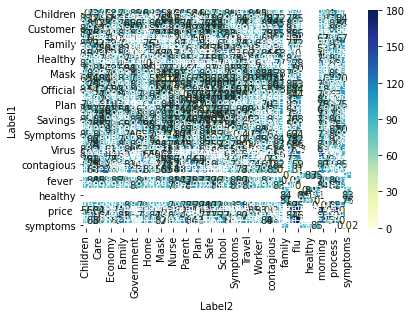

In [118]:
sns.heatmap(gr.unstack(),annot=True,cmap="YlGnBu")

In [76]:
df_temp

similarity       word1       word2                          pairs
0     0.000000  government  government  (government, government, 0.0)
1    84.492647  government     healthy   (government, healthy, 84.49)
2    85.162089     healthy  government   (healthy, government, 85.16)
3     0.000000     healthy     healthy        (healthy, healthy, 0.0)
4     0.000000  government  government  (government, government, 0.0)
5    92.068798  government      family    (government, family, 92.07)
6    92.056097      family  government    (family, government, 92.06)
7     0.000000      family      family          (family, family, 0.0)
8     0.000000  government  government  (government, government, 0.0)
9    86.734159  government    symptoms  (government, symptoms, 86.73)
10   89.077244    symptoms  government  (symptoms, government, 89.08)
11    0.019782    symptoms    symptoms     (symptoms, symptoms, 0.02)
12    0.000000  government  government  (government, government, 0.0)
13   92.735482  government        home      (government, home, 92.74)
14   91.627956        home  government      (home, government, 91.63)
15    0.000000        home        home              (home, home, 0.0)
16    0.027976     healthy     healthy       (healthy, healthy, 0.03)
17   84.087667     healthy      family       (healthy, family, 84.09)
18   82.756463      family     healthy       (family, healthy, 82.76)
19    0.000000      family      family          (family, family, 0.0)
20    0.027976     healthy     healthy       (healthy, healthy, 0.03)
21   82.935658     healthy    symptoms     (healthy, symptoms, 82.94)
22   87.545909    symptoms     healthy     (symptoms, healthy, 87.55)
23    0.019782    symptoms    symptoms     (symptoms, symptoms, 0.02)
24    0.027976     healthy     healthy       (healthy, healthy, 0.03)
25   93.308114     healthy        home         (healthy, home, 93.31)
26   92.424729        home     healthy         (home, healthy, 92.42)
27    0.000000        home        home              (home, home, 0.0)
28    0.000000      family      family          (family, family, 0.0)
29   95.180198      family    symptoms      (family, symptoms, 95.18)
30   91.380231    symptoms      family      (symptoms, family, 91.38)
31    0.019782    symptoms    symptoms     (symptoms, symptoms, 0.02)
32    0.000000      family      family          (family, family, 0.0)
33   74.673705      family        home          (family, home, 74.67)
34   81.460805        home      family          (home, family, 81.46)
35    0.000000        home        home              (home, home, 0.0)
36    0.019782    symptoms    symptoms     (symptoms, symptoms, 0.02)
37   84.990967    symptoms        home        (symptoms, home, 84.99)
38   75.636867        home    symptoms        (home, symptoms, 75.64)
39    0.000000        home        home              (home, home, 0.0)

### START Heat Map For Phrases

In [43]:
import pandas as pd

df_phrases = pd.read_excel('wordsExcel.xlsx')

In [44]:
df_phrases

Labels                                      Synonyms_List
0   Government  Government, Administration, executive, regime,...
1      healthy  Healthy, Hefty, alright, in good shape, salubr...
2       family                Family, menage, household, ancestry
3     symptoms  Symptoms, Manifestation, indication, indicator...
4         home  Home, place, dwelling_house, menage, household...
5      country  country , State, nation, sovereign state, king...
6       Worker  Worker ,Employee, labourer, workman, trader,Cr...
7      morning  morning , daybreak, morn, cockcrow, morning, f...
8        price  price , Amount, bill,cost, estimate, expenditu...
9   recovering  Recovering, find, convalesce, recoup, regain, ...
10     process  process , Procedure, summons, action, operation, 
11         flu                             flu ,Influenza, grippe
12       fever  fever , febrility, febricity, feverishness, py...
13    supplies  supplies, supplying, furnish, supply, render, ...
14        plan                     Plan, design, program, project
15     savings  Savings, Economize, economy, save, preserve, p...
16       build    Build, Construct, form, make, establish, frame,
17       needs  Needs, necessitate, needs, indigence, require,...
18     isolate  Isolate, set_apart, sequester, keep_apart, ins...
19        time  Time, meter, metre, clip, clock_time, clock, p...
20      people         People, mass, masses, citizenry, multitude
21        Mask  Mask, masquerade, masquerade_party, masque, di...
22       Store  Store, shop, stock, storage, computer_storage,...
23       Nurse                           Nurse, nanny, nursemaid,
24   Emergency  Emergency, Crisis, Danger, accident, calamity,...
25      Global  Global, Worldwide, International, world, inter...
26     Economy      Economy, economic_system, thriftiness, saving
27    Customer                                   Customer, client
28       Worse  Worse, worsened, tough, spoiled, spoilt, regre...
29      School  School, schoolhouse, schooling, schooltime, sc...
30      Parent             Parent, rear, raise, bring_up, nurture
31    Children   Children, child, kid, youngster, minor, shave...
32       virus  Virus, Disease, contagion, germ, microbe, sick...
33        care  Care, Responsibility, charge, protection, supe...
34  contagious  contagious, Epidemic, spread, infectious, tran...
35      travel               Travel, Driving, ride, tour, driving
36        safe           Safe, Secure, intact, guarded, protected
37        mask             Mask, Camouflage, veil, cloak, protect
38     economy     Economy, Recession, decrease, cutback, economy
39    official  Official, Administration, manager, agent, officer

In [45]:
type(df_phrases)

pandas.core.frame.DataFrame

In [46]:
df_phrases['Labels']

0     Government
1        healthy
2         family
3       symptoms
4           home
5        country
6         Worker
7        morning
8          price
9     recovering
10       process
11           flu
12         fever
13      supplies
14          plan
15       savings
16         build
17         needs
18       isolate
19          time
20        people
21          Mask
22         Store
23         Nurse
24     Emergency
25        Global
26       Economy
27      Customer
28         Worse
29        School
30        Parent
31      Children
32         virus
33          care
34    contagious
35        travel
36          safe
37          mask
38       economy
39      official
Name: Labels, dtype: object

In [47]:
df_phrases['Synonyms_List']

0     Government, Administration, executive, regime,...
1     Healthy, Hefty, alright, in good shape, salubr...
2                   Family, menage, household, ancestry
3     Symptoms, Manifestation, indication, indicator...
4     Home, place, dwelling_house, menage, household...
5     country , State, nation, sovereign state, king...
6     Worker ,Employee, labourer, workman, trader,Cr...
7     morning , daybreak, morn, cockcrow, morning, f...
8     price , Amount, bill,cost, estimate, expenditu...
9     Recovering, find, convalesce, recoup, regain, ...
10    process , Procedure, summons, action, operation, 
11                               flu ,Influenza, grippe
12    fever , febrility, febricity, feverishness, py...
13    supplies, supplying, furnish, supply, render, ...
14                       Plan, design, program, project
15    Savings, Economize, economy, save, preserve, p...
16      Build, Construct, form, make, establish, frame,
17    Needs, necessitate, needs, indigence, requ

In [48]:
#df_phrases['Synonyms_List'] = df_phrases['Synonyms_List'].str.strip('  ''')

In [58]:
labels = []
for i in df_phrases['Labels']:
    
    for j in df_phrases['Synonyms_List']:
        print(j)
    #labels.append(i)

Government, Administration, executive, regime, cabinet, ministry
Healthy, Hefty, alright, in good shape, salubrious, goodly.
Family, menage, household, ancestry
Symptoms, Manifestation, indication, indicator, sign, mark, feature, trait
Home, place, dwelling_house, menage, household, base, house, home, interior, domicile, dwelling, internal, habitation, abode
country , State, nation, sovereign state, kingdom ,realm, territory, province, palatinate, empire, commonwealth, homeland
Worker ,Employee, labourer, workman, trader,Craftsman, Artisan, artificer
morning , daybreak, morn, cockcrow, morning, first_light, sunrise, forenoon, dawning, morning_time, dayspring, dawn, sunup, aurora
price , Amount, bill,cost, estimate, expenditure, expense, fare, fee ,Figure, Payment, Premium, rate,Tariff, valuation,worth
Recovering, find, convalesce, recoup, regain, go_back, reclaim, recuperate, recover, convalescent, retrieve
process , Procedure, summons, action, operation, 
flu ,Influenza, grippe
fever 

In [79]:
String2vec(df_phrases['Synonyms_List'][0:5])

Tokenized data:   ['government', ',', 'administration', ',', 'executive', ',', 'regime', ',', 'cabinet', ',', 'ministry']
Tokenized data:   ['healthy', ',', 'hefty', ',', 'alright', ',', 'in', 'good', 'shape', ',', 'salubrious', ',', 'goodly', '.']
Tokenized data:   ['family', ',', 'menage', ',', 'household', ',', 'ancestry']
Tokenized data:   ['symptoms', ',', 'manifestation', ',', 'indication', ',', 'indicator', ',', 'sign', ',', 'mark', ',', 'feature', ',', 'trait']
Tokenized data:   ['home', ',', 'place', ',', 'dwelling_house', ',', 'menage', ',', 'household', ',', 'base', ',', 'house', ',', 'home', ',', 'interior', ',', 'domicile', ',', 'dwelling', ',', 'internal', ',', 'habitation', ',', 'abode']
Similarity of "Government, Administration, executive, regime, cabinet, ministry" and "Government, Administration, executive, regime, cabinet, ministry" is 1.0000001192092896
Degrees:  0.0
Similarity of "Government, Administration, executive, regime, cabinet, ministry" and "Healthy, Hefty

In [60]:
# create a dataframe
df_phrasemap = pd.DataFrame({'pair': pair_list, 'similarity': cosine_degree})
df_phrasemap.head()

pair  similarity
0  (Government, Administration, executive, regime...    0.000000
1  (Government, Administration, executive, regime...    0.000000
2  (Government, Administration, executive, regime...    0.000000
3  (Government, Administration, executive, regime...   59.209568
4  (Government, Administration, executive, regime...   69.561949

In [61]:
# make a copy
df_temp = df_phrasemap.copy()

# convert list of tuples into 2 lists
list1 = []
list2 = []

# Label1 and label2 should be like (label1, label2)
label1 =[]
label2 =[]
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)

In [62]:
# add two columns to df_temp
df_temp['Phrase1'] = list1
df_temp['Phrase2'] = list2

In [63]:
df_temp.head()

pair  similarity  \
0  (Government, Administration, executive, regime...    0.000000   
1  (Government, Administration, executive, regime...    0.000000   
2  (Government, Administration, executive, regime...    0.000000   
3  (Government, Administration, executive, regime...   59.209568   
4  (Government, Administration, executive, regime...   69.561949   

                                             Phrase1  \
0  Government, Administration, executive, regime,...   
1  Government, Administration, executive, regime,...   
2  Government, Administration, executive, regime,...   
3  Government, Administration, executive, regime,...   
4  Government, Administration, executive, regime,...   

                                             Phrase2  
0  Government, Administration, executive, regime,...  
1  Healthy, Hefty, alright, in good shape, salubr...  
2                Family, menage, household, ancestry  
3  Symptoms, Manifestation, indication, indicator...  
4  Home, place, dwelling_house, menage, household...

In [64]:
# drop the pair as it not needed
#df_temp.drop('pair', axis=1, inplace=True)

# create tuples (0, 1, similarity)
df_temp['pairs'] = list(zip(df_temp.Phrase1, df_temp.Phrase2, round(df_temp.similarity, 2)))

df_temp.head()

pair  similarity  \
0  (Government, Administration, executive, regime...    0.000000   
1  (Government, Administration, executive, regime...    0.000000   
2  (Government, Administration, executive, regime...    0.000000   
3  (Government, Administration, executive, regime...   59.209568   
4  (Government, Administration, executive, regime...   69.561949   

                                             Phrase1  \
0  Government, Administration, executive, regime,...   
1  Government, Administration, executive, regime,...   
2  Government, Administration, executive, regime,...   
3  Government, Administration, executive, regime,...   
4  Government, Administration, executive, regime,...   

                                             Phrase2  \
0  Government, Administration, executive, regime,...   
1  Healthy, Hefty, alright, in good shape, salubr...   
2                Family, menage, household, ancestry   
3  Symptoms, Manifestation, indication, indicator...   
4  Home, place, dwelling_house, menage, household...   

                                               pairs  
0  (Government, Administration, executive, regime...  
1  (Government, Administration, executive, regime...  
2  (Government, Administration, executive, regime...  
3  (Government, Administration, executive, regime...  
4  (Government, Administration, executive, regime...

In [65]:
# labels are the first words in Phrase 1 and phrase 2.
# df_temp['Label1'] = df_temp['Phrase1'].map(lambda x: x[0])
# df_temp['Label2'] = df_temp['Phrase2'].map(lambda x: x[0])


In [66]:
df_temp['Label1'] = df_temp['Phrase1'].apply(lambda x: x.split(',')[0])

In [67]:
df_temp['Label2'] = df_temp['Phrase2'].apply(lambda x: x.split(',')[0])

In [68]:
df_temp

pair  similarity  \
0     (Government, Administration, executive, regime...    0.000000   
1     (Government, Administration, executive, regime...    0.000000   
2     (Government, Administration, executive, regime...    0.000000   
3     (Government, Administration, executive, regime...   59.209568   
4     (Government, Administration, executive, regime...   69.561949   
5     (Government, Administration, executive, regime...   71.472293   
6     (Government, Administration, executive, regime...   53.954609   
7     (Government, Administration, executive, regime...   95.082665   
8     (Government, Administration, executive, regime...   76.585535   
9     (Government, Administration, executive, regime...  127.664502   
10    (Government, Administration, executive, regime...   47.618652   
11    (Government, Administration, executive, regime...   35.251851   
12    (Government, Administration, executive, regime...    0.000000   
13    (Government, Administration, executive, regime...   86.956220   
14    (Government, Administration, executive, regime...   52.742766   
15    (Government, Administration, executive, regime...    0.000000   
16    (Government, Administration, executive, regime...   60.758686   
17    (Government, Administration, executive, regime...   36.371366   
18    (Government, Administration, executive, regime...  123.333906   
19    (Government, Administration, executive, regime...   52.416607   
20    (Government, Administration, executive, regime...   15.916953   
21    (Government, Administration, executive, regime...   53.251616   
22    (Government, Administration, executive, regime...   82.480344   
23    (Government, Administration, executive, regime...    0.000000   
24    (Government, Administration, executive, regime...   45.766100   
25    (Government, Administration, executive, regime...   68.066117   
26    (Government, Administration, executive, regime...    0.000000   
27    (Government, Administration, executive, regime...    0.000000   
28    (Government, Administration, executive, regime...   85.645635   
29    (Government, Administration, executive, regime...   98.799643   
...                                                 ...         ...   
1570  (Official, Administration, manager, agent, off...   44.884838   
1571  (Official, Administration, manager, agent, off...    0.000000   
1572  (Official, Administration, manager, agent, off...    0.000000   
1573  (Official, Administration, manager, agent, off...   72.775116   
1574  (Official, Administration, manager, agent, off...   32.670778   
1575  (Official, Administration, manager, agent, off...    0.000000   
1576  (Official, Administration, manager, agent, off...   44.258884   
1577  (Official, Administration, manager, agent, off...   13.790384   
1578  (Official, Administration, manager, agent, off...  180.000000   
1579  (Official, Administration, manager, agent, off...   26.167281   
1580  (Official, Administration, manager, agent, off...    0.000000   
1581  (Official, Administration, manager, agent, off...   49.422111   
1582  (Official, Administration, manager, agent, off...  102.794056   
1583  (Official, Administration, manager, agent, off...    0.000000   
1584  (Official, Administration, manager, agent, off...   22.260649   
1585  (Official, Administration, manager, agent, off...   49.539395   
1586  (Official, Administration, manager, agent, off...    0.000000   
1587  (Official, Administration, manager, agent, off...    0.000000   
1588  (Official, Administration, manager, agent, off...   79.053742   
1589  (Official, Administration, manager, agent, off...  108.496272   
1590  (Official, Administration, manager, agent, off...   14.616855   
1591  (Official, Administration, manager, agent, off...   62.625643   
1592  (Official, Administration, manager, agent, off...   45.075454   
1593  (Official, Administration, manager, agent, off...   54.339297   
1594  (Official, Administration, manager, agent, off...   82.734763   
1595

In [69]:
# gr = df_temp.groupby(['Phrase1','Phrase2'])['similarity'].mean()
# Or
gr = df_temp.groupby(['Label1','Label2'])['similarity'].mean()

In [70]:
len(df_temp)

1600

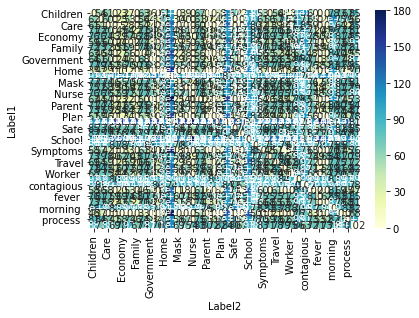

In [73]:
sns.heatmap(gr.unstack(),annot=True,cmap = "YlGnBu")

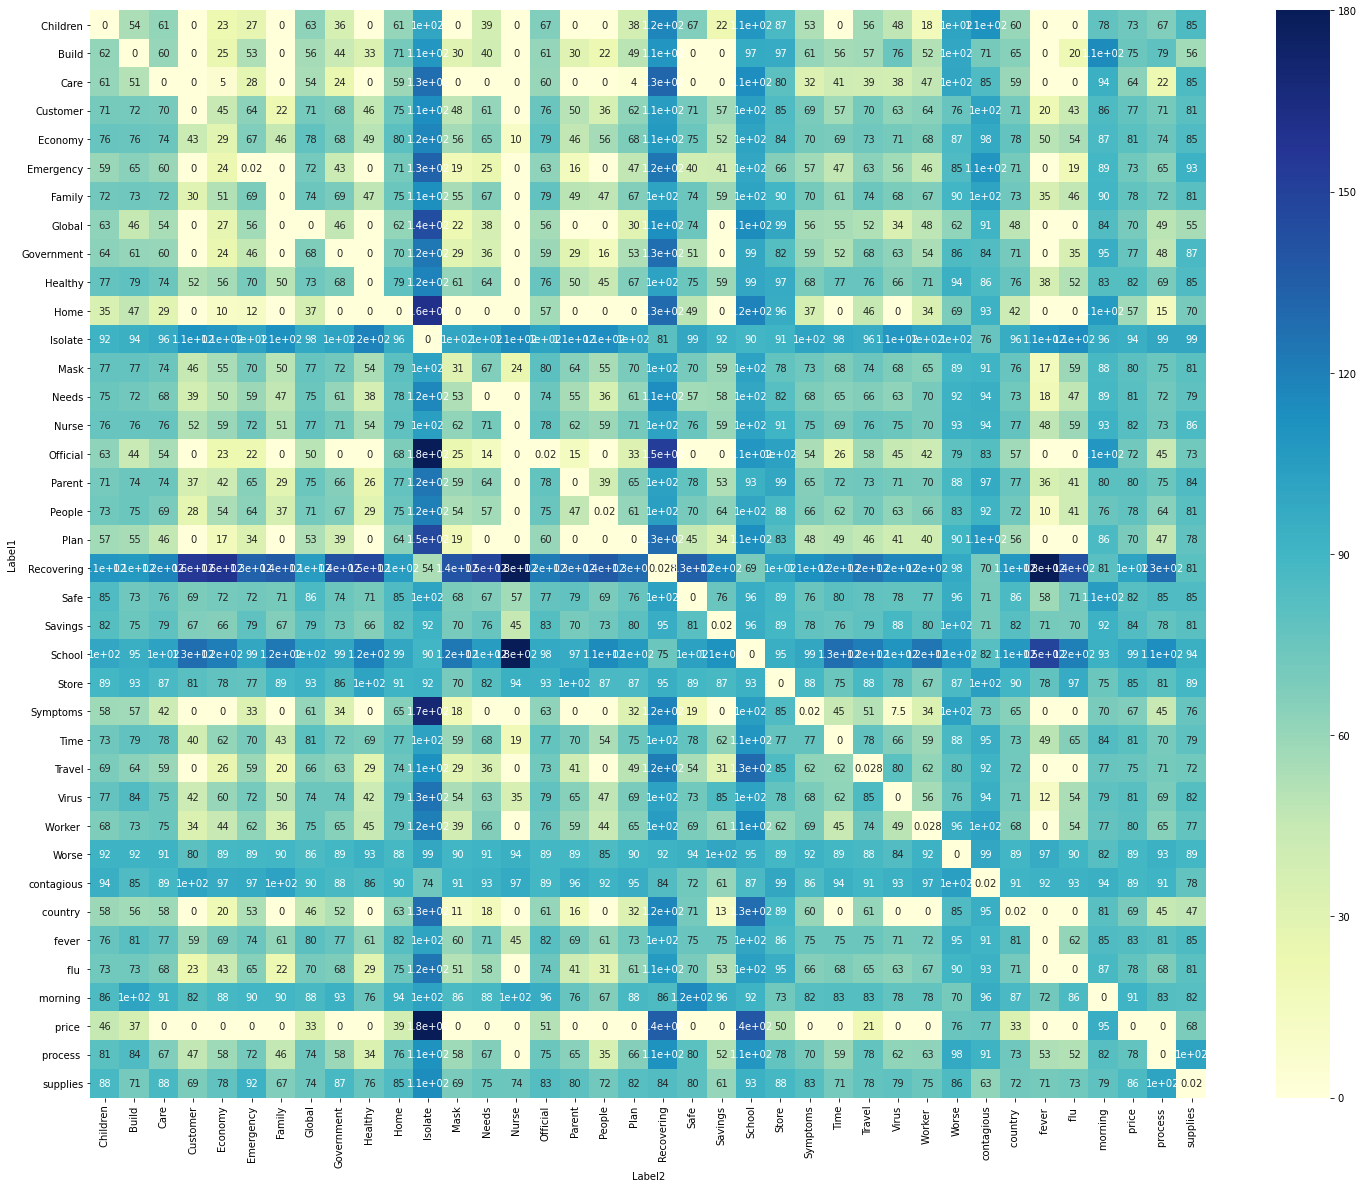

In [78]:
plt.figure(figsize=(25,20))
ax=plt.subplot(111)

sns.heatmap(gr.unstack(),annot=True, ax=ax, cmap = "YlGnBu")

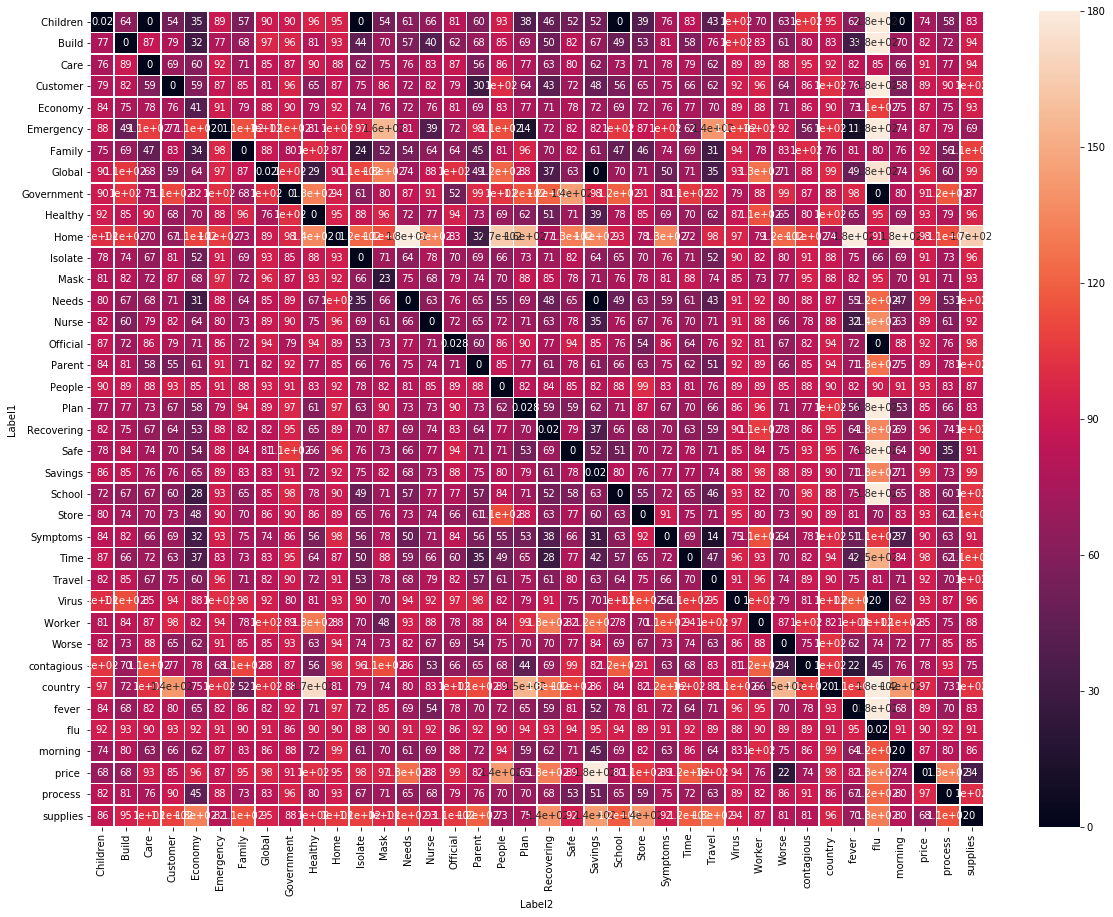

In [417]:
# https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(gr.unstack(),annot=True, linewidths=.5, ax=ax)




In [418]:
df_temp

pair  similarity  \
0     (Government, Administration, executive, regime...    0.000000   
1     (Government, Administration, executive, regime...  131.605099   
2     (Government, Administration, executive, regime...   68.420179   
3     (Government, Administration, executive, regime...   79.938141   
4     (Government, Administration, executive, regime...   93.809750   
5     (Healthy, Hefty, alright, in good shape, salub...  100.560110   
6     (Healthy, Hefty, alright, in good shape, salub...    0.000000   
7     (Healthy, Hefty, alright, in good shape, salub...   96.340963   
8     (Healthy, Hefty, alright, in good shape, salub...   69.035940   
9     (Healthy, Hefty, alright, in good shape, salub...   95.254991   
10    (Family, menage, household, ancestry, Governme...   80.352119   
11    (Family, menage, household, ancestry, Healthy,...  100.505833   
12    (Family, menage, household, ancestry, Family, ...    0.000000   
13    (Family, menage, household, ancestry, Symptoms...   74.220730   
14    (Family, menage, household, ancestry, Home, pl...   86.534274   
15    (Symptoms, Manifestation, indication, indicato...   85.708429   
16    (Symptoms, Manifestation, indication, indicato...   56.274196   
17    (Symptoms, Manifestation, indication, indicato...   75.190184   
18    (Symptoms, Manifestation, indication, indicato...    0.000000   
19    (Symptoms, Manifestation, indication, indicato...   98.066683   
20    (Home, place, dwelling_house, menage, househol...   98.186581   
21    (Home, place, dwelling_house, menage, househol...  135.329317   
22    (Home, place, dwelling_house, menage, househol...   73.481792   
23    (Home, place, dwelling_house, menage, househol...  134.598166   
24    (Home, place, dwelling_house, menage, househol...    0.000000   
25    (Government, Administration, executive, regime...    0.000000   
26    (Government, Administration, executive, regime...  131.605099   
27    (Government, Administration, executive, regime...   68.420179   
28    (Government, Administration, executive, regime...   79.938141   
29    (Government, Administration, executive, regime...   93.809750   
...                                                 ...         ...   
3195  (Official, Administration, manager, agent, off...   75.965956   
3196  (Official, Administration, manager, agent, off...    0.000000   
3197  (Official, Administration, manager, agent, off...   71.628769   
3198  (Official, Administration, manager, agent, off...   98.262821   
3199  (Official, Administration, manager, agent, off...   89.758691   
3200  (Official, Administration, manager, agent, off...   85.391439   
3201  (Official, Administration, manager, agent, off...   71.529190   
3202  (Official, Administration, manager, agent, off...   77.370933   
3203  (Official, Administration, manager, agent, off...   52.796197   
3204  (Official, Administration, manager, agent, off...   63.781712   
3205  (Official, Administration, manager, agent, off...   86.156503   
3206  (Official, Administration, manager, agent, off...   75.140479   
3207  (Official, Administration, manager, agent, off...   54.245480   
3208  (Official, Administration, manager, agent, off...   71.118863   
3209  (Official, Administration, manager, agent, off...   86.041546   
3210  (Official, Administration, manager, agent, off...   93.863390   
3211  (Official, Administration, manager, agent, off...   69.824226   
3212  (Official, Administration, manager, agent, off...   78.839487   
3213  (Official, Administration, manager, agent, off...   66.955053   
3214  (Official, Administration, manager, agent, off...   75.788389   
3215  (Official, Administration, manager, agent, off...   59.878172   
3216  (Official, Administration, manager, agent, off...   87.157061   
3217  (Official, Administration, manager, agent, off...   92.336581   
3218  (Official, Administration, manager, agent, off...   86.088260   
3219  (Official, Administration, manager, agent, off...   81.901983   
3220

In [425]:
df_temp.loc[10]

pair          (Family, menage, household, ancestry, Governme...
similarity                                              80.3521
Phrase1                     Family, menage, household, ancestry
Phrase2       Government, Administration, executive, regime,...
pairs         (Family, menage, household, ancestry, Governme...
Label1                                                   Family
Label2                                               Government
Name: 10, dtype: object

In [81]:
from sklearn.metrics.pairwise import cosine_similarity
import math
vectors = []
pair_list = []
cosine_degree = []
label_list = []
def String2vec(data):
    model= Doc2Vec.load("d2v.model")
    vectors = []
    #to find the vector of a document which is not in training data
    for i in data:
        test_data = word_tokenize(i.lower())
        print("Tokenized data:  ",test_data)
        vec = model.infer_vector(test_data)
        vectors.append(vec)
    #print("*"*40)
    #print("Vector list for the given data: ",vectors)
    #print("*"*40)
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            import math
            #vec1 = vectors[i].reshape(1,-1)
            #vec2 = vectors[j].reshape(1,-1)
            #sim= cosine_similarity(vec1, vec2)
            vec1 = vectors[i]
            vec2 = vectors[j]
            sim = (np.dot(vec1,vec2) / (np.linalg.norm(vec2) * np.linalg.norm(vec2)))
            # # The dot product divided by the product magnitude of the two vectors
            print("Similarity of \"{}\" and \"{}\" is {}" .format(data[i],data[j],sim))
            pair = data[i],data[j]
            pair_list.append(pair)
            #cos_sim = sim  # this is the score for v1 and v2
            #angle_in_radians = math.acos(sim)
            #print("Degrees: ",math.degrees(angle_in_radians))
            #print("*"*40)
            cos_sim = clean_cos(sim)
            angle_in_radians = math.acos(cos_sim)
            print("Degrees: ",math.degrees(angle_in_radians))
            cosine_degree.append(math.degrees(angle_in_radians))
            #return math.degrees(angle_in_radians)
            

In [332]:
#pair_list

### END

In [189]:
from sklearn.metrics.pairwise import cosine_similarity
import math
vectors = []
def String2vec(data):
    model= Doc2Vec.load("d2v.model")
    vectors = []
    #to find the vector of a document which is not in training data
    for i in data:
        test_data = word_tokenize(i.lower())
        print("Tokenized data:  ",test_data)
        vec = model.infer_vector(test_data)
        vectors.append(vec)
    print("*"*40)
    print("Vector list for the given data: ",vectors)
    print("*"*40)
    for i in range(len(vectors)):
        for j in range(len(vectors)):
            import math
            #vec1 = vectors[i].reshape(1,-1)
            #vec2 = vectors[j].reshape(1,-1)
            #sim= cosine_similarity(vec1, vec2)
            vec1 = vectors[i]
            vec2 = vectors[j]
            sim = (np.dot(vec1,vec2) / (np.linalg.norm(vec2) * np.linalg.norm(vec2)))
            # # The dot product divided by the product magnitude of the two vectors
            print("Similarity of \"{}\" and \"{}\" is {}" .format(data[i],data[j],sim))
            #cos_sim = sim  # this is the score for v1 and v2
            #angle_in_radians = math.acos(sim)
            #print("Degrees: ",math.degrees(angle_in_radians))
            #print("*"*40)
            cos_sim = clean_cos(sim)
            angle_in_radians = math.acos(cos_sim)
            print("Degrees: ",math.degrees(angle_in_radians))
            #return math.degrees(angle_in_radians)
            

In [190]:
String2vec(new_words)

2020-05-27 11:25:52,478 : INFO : loading Doc2Vec object from d2v.model
2020-05-27 11:25:52,489 : INFO : loading vocabulary recursively from d2v.model.vocabulary.* with mmap=None
2020-05-27 11:25:52,490 : INFO : loading trainables recursively from d2v.model.trainables.* with mmap=None
2020-05-27 11:25:52,491 : INFO : loading wv recursively from d2v.model.wv.* with mmap=None
2020-05-27 11:25:52,492 : INFO : loading docvecs recursively from d2v.model.docvecs.* with mmap=None
2020-05-27 11:25:52,493 : INFO : loaded d2v.model


Tokenized data:   ['government']
Tokenized data:   ['healthy']
Tokenized data:   ['family']
Tokenized data:   ['symptoms']
Tokenized data:   ['home']
****************************************
Vector list for the given data:  [array([ 1.2155270e-02, -8.6754084e-02, -1.5750732e-02,  4.0079303e-02,
        5.1957820e-02,  9.2868209e-03, -1.4018474e-02,  3.4781724e-02,
        1.4378179e-03,  6.6187993e-02, -1.9812820e-02, -1.2822813e-02,
       -4.7031213e-02, -5.4055732e-02,  5.0698336e-02,  2.7371224e-02,
        4.5136392e-02, -1.6300140e-02, -2.2776503e-02, -2.7455855e-05,
       -2.4151053e-02,  5.1427379e-02, -1.9342059e-02, -1.6951868e-02,
       -4.3150939e-02, -6.2253226e-02,  1.9209735e-02,  8.7219059e-02,
       -6.8045557e-02, -2.0332858e-03], dtype=float32), array([ 0.02496046,  0.00594273, -0.01058269,  0.00086633,  0.0325813 ,
       -0.02427173, -0.012807  , -0.03201602, -0.01451383,  0.02601492,
        0.00062997, -0.02676424,  0.0086757 , -0.02871867,  0.01907237,
      

### N-Grams

In [262]:
import re
import math
import numpy as np
from itertools import chain
from collections import Counter
import nltk
from nltk.util import ngrams # This is the ngram magic.
from textblob import TextBlob

In [263]:
re_sent_ends_naive = re.compile(r'[.\n]')
re_stripper_alpha = re.compile('[^a-zA-Z]+')
re_stripper_naive = re.compile('[^a-zA-Z\.\n]')

splitter_naive = lambda x: re_sent_ends_naive.split(re_stripper_naive.sub(' ', x))

In [264]:
NGRAM = 4

In [265]:
def get_tuples_nosentences(txt):
    """Get tuples that ignores all punctuation (including sentences)."""
    if not txt: return None
    ng = ngrams(re_stripper_alpha.sub(' ', txt).split(), NGRAM)
    return list(ng)

In [266]:
def get_tuples_textblob_sentences(txt):
    """New get_tuples that does use textblob."""
    if not txt: return None
    tb = TextBlob(txt)
    ng = (ngrams(x.words, NGRAM) for x in tb.sentences if len(x.words) > NGRAM)
    return [item for sublist in ng for item in sublist]

In [267]:
paragraph= """Canadian pharmacies are limiting how much medi.
The Jewish General Hospital plan"""

In [268]:
arr1 = get_tuples_textblob_sentences(paragraph);

In [270]:
print("Number of N-grams:", len(arr1))

Number of N-grams: 6


In [271]:
#accard similarity coefficient score

"""The Jaccard index [1], or Jaccard similarity coefficient, defined as the size of the 
intersection divided by the size of the union of two label sets, 
is used to compare set of predicted labels for a sample to the corresponding set of labels in y_true."""


def jaccard_distance(a, b):
    """Calculate the jaccard distance between sets A and B"""
    a = set(a)
    b = set(b)
    return 1.0 * len(a&b)/len(a|b)

In [272]:
def cosine_similarity_ngrams(a, b):
    vec1 = Counter(a)
    vec2 = Counter(b)
    
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    
   
    if not denominator:
        return 0.0
    return float(numerator) / denominator



In [286]:
from sklearn.metrics.pairwise import cosine_similarity
vectors = []
def String2vec(data):
    model= Doc2Vec.load("d2v.model")
    vectors = []
    #to find the vector of a document which is not in training data
    for i in data:
        test_data = word_tokenize(i.lower())
        print("Tokenized data:  ",test_data)
        vec = model.infer_vector(test_data)
        vectors.append(vec)
    print("*"*40)
    print("Vector list for the given data: ",vectors)
    print("*"*40)

In [284]:
a = get_tuples_nosentences("The quick brown fox jumps.")
arr1 = get_tuples_textblob_sentences("The quick brown fox jumps.");
print(arr1);

b = get_tuples_nosentences("The quick brown fox wont jumps.")
arr2 = get_tuples_textblob_sentences("The quick brown fox wont jumps.");
print(arr2)

print("Jaccard: {}   Cosine: {}".format(jaccard_distance(a,b), cosine_similarity_ngrams(a,b)))

[('The', 'quick', 'brown', 'fox'), ('quick', 'brown', 'fox', 'jumps')]
[('The', 'quick', 'brown', 'fox'), ('quick', 'brown', 'fox', 'wont'), ('brown', 'fox', 'wont', 'jumps')]
Jaccard: 0.25   Cosine: 0.40824829046386296


In [287]:
String2vec(arr1)

2020-05-27 14:26:03,001 : INFO : loading Doc2Vec object from d2v.model
2020-05-27 14:26:03,018 : INFO : loading vocabulary recursively from d2v.model.vocabulary.* with mmap=None
2020-05-27 14:26:03,019 : INFO : loading trainables recursively from d2v.model.trainables.* with mmap=None
2020-05-27 14:26:03,020 : INFO : loading wv recursively from d2v.model.wv.* with mmap=None
2020-05-27 14:26:03,021 : INFO : loading docvecs recursively from d2v.model.docvecs.* with mmap=None
2020-05-27 14:26:03,022 : INFO : loaded d2v.model


AttributeError: 'tuple' object has no attribute 'lower'

In [275]:
a = get_tuples_nosentences("The quick brown dont want to jump.")
b = get_tuples_nosentences("The quick brown dont want to jump.")
print("Jaccard: {}   Cosine: {}".format(jaccard_distance(a,b), cosine_similarity_ngrams(a,b)))

Jaccard: 1.0   Cosine: 1.0


In [276]:
a = get_tuples_nosentences("Above is a bad example of four-gram similarity.")
b = get_tuples_nosentences("This is a better example of four-gram similarity.")
print("Jaccard: {}   Cosine: {}".format(jaccard_distance(a,b), cosine_similarity_ngrams(a,b)))

Jaccard: 0.2   Cosine: 0.33333333333333337


### Method 2: Pre-trained models in Gensim, Gensim doesn’t come with the same in built models as Spacy

so to load a pre-trained model into Gensim, you first need to find and download one. This post on Ahogrammers’s blog provides a list of pertained models that can be downloaded and used.

https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

https://code.google.com/archive/p/word2vec/

In [104]:
from gensim.models import KeyedVectors

In [125]:
# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

2020-05-19 16:53:14,564 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2020-05-19 16:54:12,219 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


In [138]:
# Access vectors for specific words with a keyed lookup:
vector = model['virus']
#vector

In [139]:
# see the shape of the vector (300,)
vector.shape

(300,)

In [148]:
# Processing sentences is not as simple as with Spacy:
vectors = [model[x] for x in "This is some text I am processing with Spacy".split(' ')]

In [132]:
# For each word in the sentence vector is displayed.
vectors

[array([-0.2890625 ,  0.19921875,  0.16015625,  0.02526855, -0.23632812,
         0.10205078,  0.06640625, -0.16503906,  0.12597656,  0.22070312,
         0.05517578, -0.28710938, -0.02148438,  0.05541992,  0.01574707,
         0.29296875,  0.19433594, -0.01531982,  0.03955078, -0.21484375,
         0.00994873,  0.16015625,  0.07958984, -0.05932617,  0.12353516,
        -0.27148438, -0.10205078,  0.078125  , -0.07519531,  0.22363281,
         0.16210938, -0.04614258,  0.12304688,  0.07275391,  0.25      ,
         0.0072937 , -0.38867188,  0.10644531,  0.20996094,  0.06103516,
         0.10107422,  0.16894531, -0.15429688, -0.08251953,  0.06542969,
        -0.12255859, -0.11621094,  0.04248047,  0.08251953,  0.09716797,
        -0.05371094,  0.125     ,  0.15039062, -0.09228516,  0.23925781,
         0.15234375,  0.1796875 , -0.26171875,  0.15429688,  0.09619141,
        -0.30859375, -0.05224609, -0.18652344, -0.24414062, -0.0612793 ,
        -0.12695312,  0.14160156, -0.03295898,  0.0

Gensim includes functions to explore the vectors loaded, examine word similarity, and to find synonyms in of words using ‘similar’ vectors:

In [140]:
model.similarity('easy','straightforward')

0.5717044

In [141]:
model.most_similar('easy')

2020-05-19 16:58:10,171 : INFO : precomputing L2-norms of word weight vectors


[('easier', 0.6639506220817566),
 ('easiest', 0.6109094619750977),
 ('simple', 0.5990299582481384),
 ('Easy', 0.5979028940200806),
 ('difficult', 0.5890915393829346),
 ('effortless', 0.5728522539138794),
 ('straightforward', 0.5717042684555054),
 ('convenient', 0.5708884000778198),
 ('quick', 0.5696074962615967),
 ('tempting', 0.5480926632881165)]

In [ ]:
# https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

### ------- END ----------- ####

### Topic Modelling

### Install Packages:
    1.Spacy
    2.Genism
    3.pyLDAvis

In [ ]:
# pip install spacy
# pip install gensim
# pip install pyLDAvis

In [139]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk import FreqDist

import spacy
import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim

In [140]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

# selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

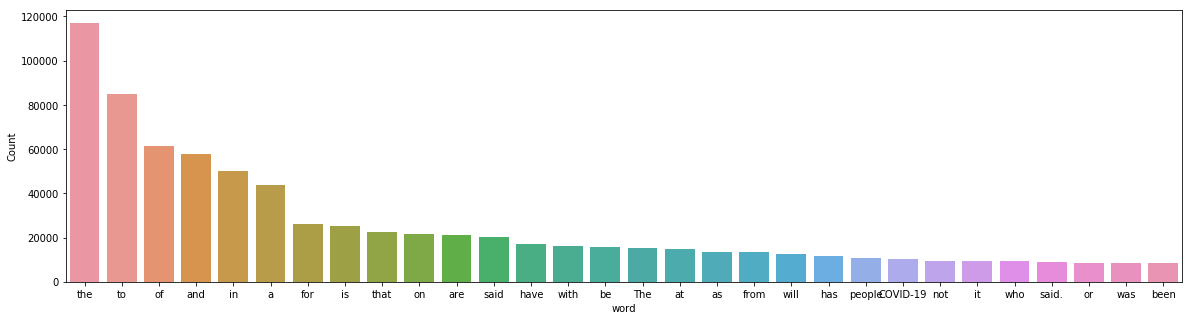

In [141]:
freq_words(df['text'])

In [142]:
# remove unwanted characters, numbers and symbols
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")

In [143]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [144]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

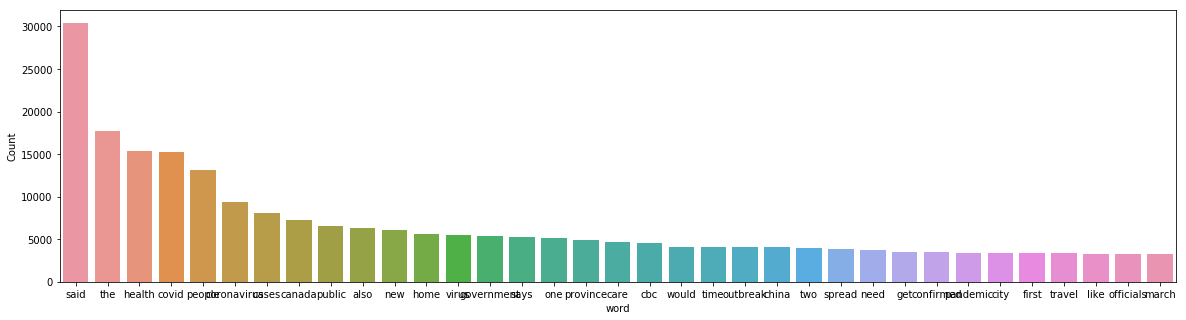

In [62]:
freq_words(reviews, 35)

In [67]:
# !python -m spacy download en # one time run

In [145]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [146]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['the', 'yukon', 'government', 'identified', 'two', 'places', 'whitehorse', 'church', 'dental', 'clinic', 'people', 'may', 'exposed', 'coronavirus', 'recent', 'weeks', 'news', 'release', 'thursday', 'evening', 'government', 'said', 'anybody', 'went', 'either', 'place', 'certain', 'days', 'monitor', 'symptoms', 'may', 'indicate', 'covid', 'fever', 'cough', 'difficulty', 'breathing', 'days', 'call', 'symptoms', 'develop', 'the', 'possible', 'sources', 'exposure', 'sunday', 'morning', 'services', 'bethany', 'church', 'alaska', 'highway', 'march', 'march', 'church', 'kids', 'zone', 'march', 'elias', 'dental', 'clinic', 'march', 'march', 'according', 'news', 'release', 'places', 'visited', 'dates', 'person', 'persons', 'tested', 'positive', 'covid', 'also', 'says', 'people', 'attended', 'places', 'identified', 'times', 'need', 'self', 'isolate', 'long', 'remain', 'healthy', 'develop', 'symptoms', 'the', 'risk', 'individuals', 'possible', 'exposures', 'low', 'release', 'says', 'bethany', 'ch

In [147]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['government', 'place', 'people', 'recent', 'week', 'news', 'release', 'evening', 'government', 'certain', 'day', 'symptom', 'covid', 'fever', 'cough', 'difficulty', 'breathing', 'day', 'symptom', 'possible', 'source', 'exposure', 'morning', 'news', 'release', 'place', 'person', 'person', 'positive', 'covid', 'people', 'place', 'time', 'self', 'isolate', 'healthy', 'symptom', 'risk', 'individual', 'possible', 'exposure', 'low', 'release', 'government', 'positive', 'morning', 'case', 'health', 'official', 'first', 'case', 'couple', 'whitehorse', 'third', 'person', 'community', 'residential', 'eviction', 'sick', 'leave', 'whitehorse', 'person', 'people', 'church', 'government', 'news', 'release', 'ongoing', 'risk', 'community', 'clinic']


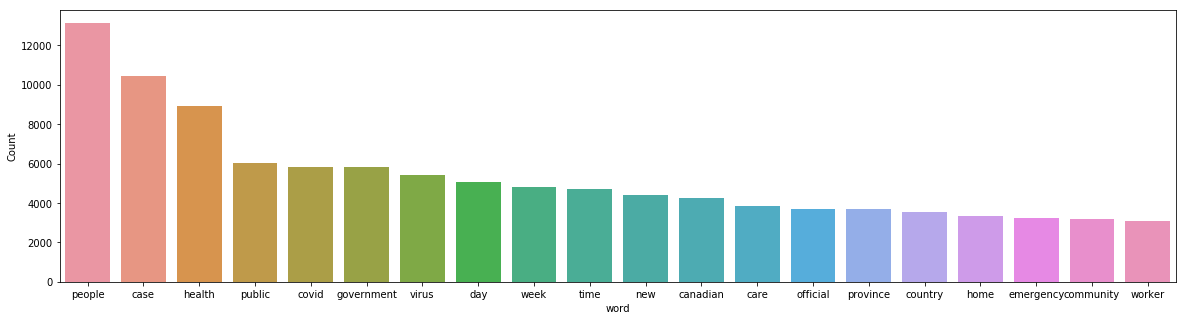

In [66]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 20)

In [148]:
dictionary = corpora.Dictionary(reviews_2)

2020-05-14 00:25:29,865 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-05-14 00:25:30,701 : INFO : built Dictionary(14699 unique tokens: ['active', 'actual', 'amount', 'antibiotic', 'association']...) from 3566 documents (total 690041 corpus positions)


In [149]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [150]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

2020-05-14 00:25:38,212 : INFO : using symmetric alpha at 0.14285714285714285
2020-05-14 00:25:38,215 : INFO : using symmetric eta at 0.14285714285714285
2020-05-14 00:25:38,225 : INFO : using serial LDA version on this node
2020-05-14 00:25:38,241 : INFO : running online (multi-pass) LDA training, 7 topics, 50 passes over the supplied corpus of 3566 documents, updating model once every 1000 documents, evaluating perplexity every 3566 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-14 00:25:38,244 : INFO : PROGRESS: pass 0, at document #1000/3566
2020-05-14 00:25:39,575 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:25:39,593 : INFO : topic #3 (0.143): 0.012*"people" + 0.011*"virus" + 0.009*"case" + 0.009*"country" + 0.009*"health" + 0.009*"canadian" + 0.007*"week" + 0.007*"covid" + 0.006*"official" + 0.006*"day"
2020-05-14 00:25:39,595 : INFO : topic #2 (0.143): 0.019*"case" + 0.017*"people" + 0.016*"health" + 0.015*

2020-05-14 00:25:47,211 : INFO : topic #3 (0.143): 0.053*"student" + 0.026*"school" + 0.011*"class" + 0.009*"week" + 0.008*"trump" + 0.007*"university" + 0.007*"sander" + 0.007*"online" + 0.006*"time" + 0.006*"campus"
2020-05-14 00:25:47,212 : INFO : topic diff=0.467725, rho=0.423866
2020-05-14 00:25:47,215 : INFO : PROGRESS: pass 1, at document #3000/3566
2020-05-14 00:25:48,512 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:25:48,519 : INFO : topic #2 (0.143): 0.016*"ship" + 0.015*"mask" + 0.014*"health" + 0.014*"people" + 0.014*"passenger" + 0.013*"cruise" + 0.012*"hand" + 0.010*"virus" + 0.009*"store" + 0.009*"case"
2020-05-14 00:25:48,521 : INFO : topic #6 (0.143): 0.013*"market" + 0.012*"price" + 0.009*"year" + 0.008*"oil" + 0.008*"cent" + 0.007*"people" + 0.007*"month" + 0.007*"virus" + 0.007*"time" + 0.007*"company"
2020-05-14 00:25:48,524 : INFO : topic #0 (0.143): 0.029*"people" + 0.012*"time" + 0.010*"community" + 0.010*"city" + 0.0

2020-05-14 00:25:56,472 : INFO : topic #6 (0.143): 0.016*"price" + 0.014*"year" + 0.014*"oil" + 0.013*"market" + 0.012*"cent" + 0.008*"company" + 0.007*"month" + 0.006*"virus" + 0.006*"canadian" + 0.006*"global"
2020-05-14 00:25:56,474 : INFO : topic diff=0.356105, rho=0.390256
2020-05-14 00:25:56,476 : INFO : PROGRESS: pass 3, at document #1000/3566
2020-05-14 00:25:57,760 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:25:57,767 : INFO : topic #3 (0.143): 0.063*"student" + 0.050*"school" + 0.017*"class" + 0.011*"week" + 0.011*"university" + 0.011*"parent" + 0.009*"teacher" + 0.009*"sander" + 0.008*"online" + 0.008*"health"
2020-05-14 00:25:57,768 : INFO : topic #0 (0.143): 0.031*"people" + 0.013*"time" + 0.011*"community" + 0.010*"city" + 0.009*"event" + 0.008*"day" + 0.007*"family" + 0.007*"year" + 0.007*"social" + 0.007*"thing"
2020-05-14 00:25:57,770 : INFO : topic #5 (0.143): 0.021*"government" + 0.014*"business" + 0.012*"worker" + 0.010*

2020-05-14 00:26:04,408 : INFO : topic diff=0.238214, rho=0.341673
2020-05-14 00:26:04,410 : INFO : PROGRESS: pass 4, at document #3000/3566
2020-05-14 00:26:05,424 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:26:05,431 : INFO : topic #4 (0.143): 0.038*"case" + 0.029*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.014*"virus" + 0.013*"care" + 0.013*"symptom" + 0.012*"patient" + 0.010*"self"
2020-05-14 00:26:05,433 : INFO : topic #2 (0.143): 0.020*"ship" + 0.019*"mask" + 0.017*"cruise" + 0.016*"store" + 0.016*"passenger" + 0.015*"hand" + 0.015*"people" + 0.013*"supply" + 0.010*"health" + 0.009*"bus"
2020-05-14 00:26:05,436 : INFO : topic #1 (0.143): 0.028*"canadian" + 0.022*"country" + 0.019*"flight" + 0.017*"government" + 0.014*"people" + 0.012*"travel" + 0.012*"case" + 0.010*"virus" + 0.010*"day" + 0.010*"week"
2020-05-14 00:26:05,438 : INFO : topic #5 (0.143): 0.023*"government" + 0.015*"business" + 0.012*"worker" + 0.010*"p

2020-05-14 00:26:11,885 : INFO : topic diff=0.192081, rho=0.323322
2020-05-14 00:26:11,886 : INFO : PROGRESS: pass 6, at document #1000/3566
2020-05-14 00:26:12,873 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:26:12,879 : INFO : topic #5 (0.143): 0.024*"government" + 0.015*"business" + 0.012*"worker" + 0.009*"province" + 0.009*"people" + 0.009*"covid" + 0.009*"emergency" + 0.008*"week" + 0.008*"health" + 0.007*"work"
2020-05-14 00:26:12,881 : INFO : topic #0 (0.143): 0.032*"people" + 0.013*"time" + 0.011*"community" + 0.010*"city" + 0.009*"event" + 0.008*"family" + 0.008*"social" + 0.008*"day" + 0.007*"thing" + 0.007*"year"
2020-05-14 00:26:12,882 : INFO : topic #2 (0.143): 0.024*"ship" + 0.021*"mask" + 0.020*"cruise" + 0.019*"passenger" + 0.016*"store" + 0.015*"people" + 0.015*"hand" + 0.013*"supply" + 0.009*"health" + 0.007*"bus"
2020-05-14 00:26:12,884 : INFO : topic #6 (0.143): 0.016*"market" + 0.015*"cent" + 0.015*"year" + 0.014*"price"

2020-05-14 00:26:18,710 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:26:18,717 : INFO : topic #6 (0.143): 0.016*"price" + 0.016*"market" + 0.015*"cent" + 0.014*"year" + 0.013*"oil" + 0.009*"company" + 0.008*"virus" + 0.008*"global" + 0.007*"economy" + 0.007*"rate"
2020-05-14 00:26:18,719 : INFO : topic #0 (0.143): 0.033*"people" + 0.014*"time" + 0.011*"community" + 0.011*"city" + 0.009*"social" + 0.008*"event" + 0.008*"family" + 0.008*"day" + 0.007*"thing" + 0.007*"home"
2020-05-14 00:26:18,721 : INFO : topic #4 (0.143): 0.039*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.014*"virus" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:26:18,723 : INFO : topic #5 (0.143): 0.024*"government" + 0.016*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.009*"people" + 0.009*"province" + 0.008*"week" + 0.008*"measure" + 0.008*"work"
2020-05-14 00:26:18,725 : INFO : top

2020-05-14 00:26:25,361 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:26:25,367 : INFO : topic #6 (0.143): 0.016*"cent" + 0.016*"market" + 0.016*"year" + 0.014*"price" + 0.012*"oil" + 0.009*"virus" + 0.008*"company" + 0.008*"global" + 0.008*"economy" + 0.007*"rate"
2020-05-14 00:26:25,369 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.021*"country" + 0.018*"flight" + 0.018*"government" + 0.014*"people" + 0.012*"virus" + 0.012*"case" + 0.011*"chinese" + 0.010*"travel" + 0.010*"official"
2020-05-14 00:26:25,371 : INFO : topic #4 (0.143): 0.040*"case" + 0.030*"health" + 0.028*"people" + 0.018*"public" + 0.016*"virus" + 0.014*"covid" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.011*"official"
2020-05-14 00:26:25,373 : INFO : topic #2 (0.143): 0.023*"ship" + 0.021*"mask" + 0.019*"cruise" + 0.019*"store" + 0.017*"passenger" + 0.015*"hand" + 0.015*"people" + 0.014*"supply" + 0.008*"health" + 0.008*"bus"
2020-05-14 00:26:25,375 : INFO : to

2020-05-14 00:26:31,381 : INFO : topic #6 (0.143): 0.016*"price" + 0.016*"market" + 0.016*"cent" + 0.015*"year" + 0.013*"oil" + 0.009*"company" + 0.008*"virus" + 0.008*"global" + 0.008*"economy" + 0.007*"rate"
2020-05-14 00:26:31,383 : INFO : topic #3 (0.143): 0.062*"student" + 0.056*"school" + 0.018*"class" + 0.015*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.010*"health" + 0.010*"teacher" + 0.009*"sander"
2020-05-14 00:26:31,385 : INFO : topic #5 (0.143): 0.025*"government" + 0.016*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.009*"province" + 0.009*"people" + 0.008*"week" + 0.008*"measure" + 0.008*"work"
2020-05-14 00:26:31,387 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.022*"country" + 0.019*"flight" + 0.017*"government" + 0.014*"people" + 0.012*"travel" + 0.011*"case" + 0.011*"virus" + 0.010*"day" + 0.009*"official"
2020-05-14 00:26:31,389 : INFO : topic #0 (0.143): 0.033*"people" + 0.014*"time" + 0.011*"community" + 0.011*"city" + 0.0

2020-05-14 00:26:38,186 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.021*"country" + 0.018*"flight" + 0.018*"government" + 0.014*"people" + 0.012*"virus" + 0.012*"case" + 0.011*"chinese" + 0.010*"passenger" + 0.010*"travel"
2020-05-14 00:26:38,187 : INFO : topic #5 (0.143): 0.025*"government" + 0.016*"business" + 0.013*"worker" + 0.010*"emergency" + 0.010*"province" + 0.010*"covid" + 0.009*"people" + 0.008*"week" + 0.008*"work" + 0.008*"health"
2020-05-14 00:26:38,189 : INFO : topic #3 (0.143): 0.065*"student" + 0.058*"school" + 0.018*"class" + 0.015*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.009*"health" + 0.009*"teacher" + 0.008*"online"
2020-05-14 00:26:38,191 : INFO : topic #4 (0.143): 0.040*"case" + 0.030*"health" + 0.028*"people" + 0.018*"public" + 0.016*"virus" + 0.014*"covid" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.011*"official"
2020-05-14 00:26:38,193 : INFO : topic #6 (0.143): 0.016*"cent" + 0.016*"year" + 0.016*"market" + 0.014*"price

2020-05-14 00:26:45,131 : INFO : topic #5 (0.143): 0.025*"government" + 0.016*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.009*"province" + 0.009*"people" + 0.008*"week" + 0.008*"measure" + 0.008*"work"
2020-05-14 00:26:45,133 : INFO : topic #6 (0.143): 0.016*"price" + 0.016*"cent" + 0.016*"market" + 0.015*"year" + 0.013*"oil" + 0.009*"company" + 0.009*"virus" + 0.008*"global" + 0.008*"economy" + 0.007*"rate"
2020-05-14 00:26:45,135 : INFO : topic #0 (0.143): 0.033*"people" + 0.014*"time" + 0.011*"community" + 0.011*"city" + 0.009*"social" + 0.008*"family" + 0.008*"event" + 0.008*"day" + 0.007*"home" + 0.007*"thing"
2020-05-14 00:26:45,137 : INFO : topic #3 (0.143): 0.062*"student" + 0.056*"school" + 0.018*"class" + 0.016*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.010*"health" + 0.009*"teacher" + 0.009*"sander"
2020-05-14 00:26:45,138 : INFO : topic diff=0.104676, rho=0.238596
2020-05-14 00:26:46,171 : INFO : -7.207 per-word bound, 147.7 per

2020-05-14 00:26:52,482 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.020*"country" + 0.018*"flight" + 0.017*"government" + 0.014*"people" + 0.012*"virus" + 0.012*"case" + 0.012*"passenger" + 0.011*"chinese" + 0.010*"travel"
2020-05-14 00:26:52,483 : INFO : topic #4 (0.143): 0.040*"case" + 0.030*"health" + 0.028*"people" + 0.018*"public" + 0.016*"virus" + 0.014*"covid" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.011*"official"
2020-05-14 00:26:52,485 : INFO : topic #0 (0.143): 0.033*"people" + 0.014*"time" + 0.011*"community" + 0.010*"city" + 0.009*"event" + 0.009*"family" + 0.008*"social" + 0.008*"day" + 0.007*"thing" + 0.007*"home"
2020-05-14 00:26:52,487 : INFO : topic #3 (0.143): 0.064*"student" + 0.058*"school" + 0.018*"class" + 0.016*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.009*"health" + 0.009*"teacher" + 0.008*"online"
2020-05-14 00:26:52,488 : INFO : topic diff=0.124845, rho=0.226073
2020-05-14 00:26:52,489 : INFO : PROGRESS: pass 15, at do

2020-05-14 00:26:58,921 : INFO : topic #5 (0.143): 0.025*"government" + 0.016*"business" + 0.012*"worker" + 0.011*"emergency" + 0.010*"covid" + 0.009*"province" + 0.009*"people" + 0.008*"week" + 0.008*"measure" + 0.008*"work"
2020-05-14 00:26:58,925 : INFO : topic #0 (0.143): 0.033*"people" + 0.014*"time" + 0.011*"community" + 0.010*"city" + 0.009*"social" + 0.008*"family" + 0.008*"event" + 0.008*"day" + 0.007*"home" + 0.007*"thing"
2020-05-14 00:26:58,929 : INFO : topic #3 (0.143): 0.061*"student" + 0.056*"school" + 0.018*"class" + 0.016*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.010*"health" + 0.009*"teacher" + 0.009*"sander"
2020-05-14 00:26:58,933 : INFO : topic diff=0.093338, rho=0.220508
2020-05-14 00:27:00,143 : INFO : -7.204 per-word bound, 147.4 perplexity estimate based on a held-out corpus of 566 documents with 110894 words
2020-05-14 00:27:00,144 : INFO : PROGRESS: pass 16, at document #3566/3566
2020-05-14 00:27:00,759 : INFO : merging changes from 56

2020-05-14 00:27:06,255 : INFO : topic #4 (0.143): 0.040*"case" + 0.030*"health" + 0.028*"people" + 0.018*"public" + 0.016*"virus" + 0.014*"covid" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.011*"official"
2020-05-14 00:27:06,258 : INFO : topic #2 (0.143): 0.022*"store" + 0.022*"mask" + 0.016*"supply" + 0.016*"hand" + 0.015*"people" + 0.015*"ship" + 0.013*"cruise" + 0.011*"passenger" + 0.009*"product" + 0.008*"service"
2020-05-14 00:27:06,260 : INFO : topic #3 (0.143): 0.064*"student" + 0.058*"school" + 0.018*"class" + 0.016*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.010*"health" + 0.009*"teacher" + 0.008*"online"
2020-05-14 00:27:06,261 : INFO : topic diff=0.113225, rho=0.210510
2020-05-14 00:27:06,262 : INFO : PROGRESS: pass 18, at document #2000/3566
2020-05-14 00:27:07,203 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:27:07,209 : INFO : topic #6 (0.143): 0.016*"cent" + 0.015*"year" + 0.015*"market" + 0.014

2020-05-14 00:27:12,937 : INFO : topic #0 (0.143): 0.033*"people" + 0.014*"time" + 0.011*"community" + 0.010*"city" + 0.009*"social" + 0.008*"family" + 0.008*"event" + 0.008*"day" + 0.007*"home" + 0.007*"thing"
2020-05-14 00:27:12,940 : INFO : topic #5 (0.143): 0.025*"government" + 0.016*"business" + 0.012*"worker" + 0.011*"emergency" + 0.010*"covid" + 0.009*"province" + 0.009*"people" + 0.008*"week" + 0.008*"measure" + 0.008*"work"
2020-05-14 00:27:12,941 : INFO : topic diff=0.085121, rho=0.205995
2020-05-14 00:27:13,823 : INFO : -7.201 per-word bound, 147.2 perplexity estimate based on a held-out corpus of 566 documents with 110894 words
2020-05-14 00:27:13,824 : INFO : PROGRESS: pass 19, at document #3566/3566
2020-05-14 00:27:14,377 : INFO : merging changes from 566 documents into a model of 3566 documents
2020-05-14 00:27:14,384 : INFO : topic #4 (0.143): 0.037*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.015*"care" + 0.014*"virus" + 0.013*"symptom

2020-05-14 00:27:19,760 : INFO : topic #5 (0.143): 0.026*"government" + 0.016*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.010*"province" + 0.009*"people" + 0.008*"week" + 0.008*"work" + 0.008*"measure"
2020-05-14 00:27:19,762 : INFO : topic #2 (0.143): 0.023*"store" + 0.022*"mask" + 0.017*"supply" + 0.017*"hand" + 0.015*"people" + 0.009*"product" + 0.009*"service" + 0.008*"customer" + 0.008*"bus" + 0.008*"ship"
2020-05-14 00:27:19,764 : INFO : topic diff=0.104251, rho=0.197774
2020-05-14 00:27:19,765 : INFO : PROGRESS: pass 21, at document #2000/3566
2020-05-14 00:27:20,768 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:27:20,775 : INFO : topic #4 (0.143): 0.040*"case" + 0.030*"health" + 0.028*"people" + 0.018*"public" + 0.015*"virus" + 0.015*"covid" + 0.014*"care" + 0.012*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:27:20,777 : INFO : topic #0 (0.143): 0.033*"people" + 0.014*"time" + 0.011*"community" +

2020-05-14 00:27:25,897 : INFO : topic #5 (0.143): 0.025*"government" + 0.016*"business" + 0.012*"worker" + 0.011*"emergency" + 0.010*"covid" + 0.009*"province" + 0.009*"people" + 0.008*"week" + 0.008*"measure" + 0.008*"work"
2020-05-14 00:27:25,899 : INFO : topic diff=0.078969, rho=0.194016
2020-05-14 00:27:26,772 : INFO : -7.199 per-word bound, 146.9 perplexity estimate based on a held-out corpus of 566 documents with 110894 words
2020-05-14 00:27:26,773 : INFO : PROGRESS: pass 22, at document #3566/3566
2020-05-14 00:27:27,191 : INFO : merging changes from 566 documents into a model of 3566 documents
2020-05-14 00:27:27,198 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.012*"community" + 0.010*"city" + 0.009*"event" + 0.008*"family" + 0.008*"social" + 0.008*"day" + 0.007*"home" + 0.007*"thing"
2020-05-14 00:27:27,199 : INFO : topic #4 (0.143): 0.037*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.015*"care" + 0.014*"virus" + 0.013*"symptom

2020-05-14 00:27:31,778 : INFO : topic #5 (0.143): 0.026*"government" + 0.016*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.010*"province" + 0.009*"people" + 0.008*"week" + 0.008*"work" + 0.008*"measure"
2020-05-14 00:27:31,779 : INFO : topic diff=0.097408, rho=0.187101
2020-05-14 00:27:31,781 : INFO : PROGRESS: pass 24, at document #2000/3566
2020-05-14 00:27:32,794 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:27:32,802 : INFO : topic #6 (0.143): 0.016*"cent" + 0.015*"year" + 0.015*"market" + 0.014*"price" + 0.012*"oil" + 0.009*"virus" + 0.009*"company" + 0.008*"global" + 0.008*"economy" + 0.007*"rate"
2020-05-14 00:27:32,804 : INFO : topic #4 (0.143): 0.040*"case" + 0.030*"health" + 0.028*"people" + 0.018*"public" + 0.015*"virus" + 0.015*"covid" + 0.014*"care" + 0.012*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:27:32,807 : INFO : topic #5 (0.143): 0.026*"government" + 0.016*"business" + 0.012*"worker"

2020-05-14 00:27:38,368 : INFO : topic diff=0.073818, rho=0.183909
2020-05-14 00:27:39,299 : INFO : -7.197 per-word bound, 146.7 perplexity estimate based on a held-out corpus of 566 documents with 110894 words
2020-05-14 00:27:39,300 : INFO : PROGRESS: pass 25, at document #3566/3566
2020-05-14 00:27:39,741 : INFO : merging changes from 566 documents into a model of 3566 documents
2020-05-14 00:27:39,748 : INFO : topic #2 (0.143): 0.025*"store" + 0.022*"mask" + 0.018*"supply" + 0.017*"hand" + 0.014*"people" + 0.010*"service" + 0.010*"customer" + 0.009*"product" + 0.009*"bus" + 0.008*"food"
2020-05-14 00:27:39,749 : INFO : topic #4 (0.143): 0.038*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.014*"care" + 0.014*"virus" + 0.013*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:27:39,751 : INFO : topic #3 (0.143): 0.062*"student" + 0.057*"school" + 0.019*"class" + 0.017*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.010*"health"

2020-05-14 00:27:44,906 : INFO : topic diff=0.091601, rho=0.177988
2020-05-14 00:27:44,907 : INFO : PROGRESS: pass 27, at document #2000/3566
2020-05-14 00:27:45,850 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:27:45,857 : INFO : topic #3 (0.143): 0.063*"student" + 0.058*"school" + 0.018*"class" + 0.017*"child" + 0.016*"parent" + 0.012*"week" + 0.010*"university" + 0.009*"health" + 0.009*"teacher" + 0.009*"online"
2020-05-14 00:27:45,859 : INFO : topic #2 (0.143): 0.025*"store" + 0.023*"mask" + 0.019*"supply" + 0.016*"hand" + 0.015*"people" + 0.011*"service" + 0.009*"customer" + 0.009*"product" + 0.009*"food" + 0.008*"grocery"
2020-05-14 00:27:45,861 : INFO : topic #0 (0.143): 0.033*"people" + 0.014*"time" + 0.011*"community" + 0.009*"city" + 0.009*"social" + 0.008*"family" + 0.008*"day" + 0.008*"event" + 0.007*"home" + 0.007*"many"
2020-05-14 00:27:45,863 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.020*"country" + 0.018*"flight" + 0.016

2020-05-14 00:27:52,287 : INFO : PROGRESS: pass 28, at document #3566/3566
2020-05-14 00:27:52,840 : INFO : merging changes from 566 documents into a model of 3566 documents
2020-05-14 00:27:52,846 : INFO : topic #6 (0.143): 0.016*"year" + 0.016*"price" + 0.016*"cent" + 0.014*"market" + 0.014*"oil" + 0.009*"company" + 0.008*"virus" + 0.008*"global" + 0.008*"economy" + 0.007*"canadian"
2020-05-14 00:27:52,849 : INFO : topic #4 (0.143): 0.038*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.014*"care" + 0.014*"virus" + 0.013*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:27:52,850 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.012*"community" + 0.010*"city" + 0.009*"event" + 0.008*"family" + 0.008*"social" + 0.008*"day" + 0.007*"thing" + 0.007*"home"
2020-05-14 00:27:52,853 : INFO : topic #2 (0.143): 0.025*"store" + 0.022*"mask" + 0.018*"supply" + 0.018*"hand" + 0.014*"people" + 0.011*"service" + 0.010*"customer" + 0.009*"product" 

2020-05-14 00:27:58,788 : INFO : topic #5 (0.143): 0.026*"government" + 0.016*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.010*"province" + 0.009*"people" + 0.008*"week" + 0.008*"measure" + 0.008*"work"
2020-05-14 00:27:58,789 : INFO : topic #0 (0.143): 0.033*"people" + 0.014*"time" + 0.011*"community" + 0.009*"city" + 0.009*"social" + 0.008*"family" + 0.008*"event" + 0.008*"day" + 0.007*"home" + 0.007*"many"
2020-05-14 00:27:58,791 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.020*"country" + 0.018*"flight" + 0.016*"government" + 0.016*"ship" + 0.016*"passenger" + 0.014*"people" + 0.013*"cruise" + 0.012*"virus" + 0.011*"case"
2020-05-14 00:27:58,794 : INFO : topic #2 (0.143): 0.025*"store" + 0.023*"mask" + 0.019*"supply" + 0.016*"hand" + 0.015*"people" + 0.011*"service" + 0.009*"customer" + 0.009*"product" + 0.009*"food" + 0.009*"grocery"
2020-05-14 00:27:58,795 : INFO : topic #6 (0.143): 0.016*"cent" + 0.015*"year" + 0.015*"market" + 0.014*"price" + 0.012*"oi

2020-05-14 00:28:04,649 : INFO : topic #5 (0.143): 0.026*"government" + 0.015*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.010*"province" + 0.009*"people" + 0.008*"week" + 0.008*"work" + 0.008*"measure"
2020-05-14 00:28:04,651 : INFO : topic #2 (0.143): 0.025*"store" + 0.022*"mask" + 0.018*"supply" + 0.018*"hand" + 0.014*"people" + 0.011*"service" + 0.010*"customer" + 0.009*"food" + 0.009*"product" + 0.009*"bus"
2020-05-14 00:28:04,652 : INFO : topic #4 (0.143): 0.038*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.014*"care" + 0.014*"virus" + 0.013*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:28:04,655 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.012*"community" + 0.010*"city" + 0.009*"event" + 0.008*"family" + 0.008*"social" + 0.008*"day" + 0.007*"thing" + 0.007*"year"
2020-05-14 00:28:04,657 : INFO : topic #3 (0.143): 0.061*"student" + 0.057*"school" + 0.019*"class" + 0.017*"child" + 0.015*"parent" 

2020-05-14 00:28:10,265 : INFO : topic #6 (0.143): 0.016*"cent" + 0.015*"year" + 0.015*"market" + 0.014*"price" + 0.012*"oil" + 0.009*"virus" + 0.009*"company" + 0.008*"global" + 0.008*"economy" + 0.007*"rate"
2020-05-14 00:28:10,266 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.011*"community" + 0.009*"city" + 0.009*"social" + 0.008*"family" + 0.008*"event" + 0.008*"day" + 0.007*"home" + 0.007*"many"
2020-05-14 00:28:10,269 : INFO : topic #5 (0.143): 0.026*"government" + 0.016*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.010*"province" + 0.009*"people" + 0.008*"week" + 0.008*"measure" + 0.008*"work"
2020-05-14 00:28:10,271 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.020*"country" + 0.018*"flight" + 0.016*"government" + 0.016*"ship" + 0.016*"passenger" + 0.014*"people" + 0.013*"cruise" + 0.012*"virus" + 0.011*"case"
2020-05-14 00:28:10,273 : INFO : topic diff=0.068786, rho=0.163156
2020-05-14 00:28:10,275 : INFO : PROGRESS: pass 33, at document

2020-05-14 00:28:18,348 : INFO : topic #3 (0.143): 0.061*"student" + 0.056*"school" + 0.019*"class" + 0.017*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.010*"health" + 0.009*"online" + 0.009*"teacher"
2020-05-14 00:28:18,350 : INFO : topic #4 (0.143): 0.038*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.014*"virus" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:28:18,352 : INFO : topic #1 (0.143): 0.030*"canadian" + 0.019*"country" + 0.018*"flight" + 0.018*"ship" + 0.016*"government" + 0.016*"passenger" + 0.014*"cruise" + 0.014*"people" + 0.011*"virus" + 0.010*"case"
2020-05-14 00:28:18,354 : INFO : topic #2 (0.143): 0.025*"store" + 0.022*"mask" + 0.018*"supply" + 0.018*"hand" + 0.015*"people" + 0.012*"service" + 0.010*"customer" + 0.010*"food" + 0.009*"product" + 0.009*"bus"
2020-05-14 00:28:18,355 : INFO : topic diff=0.067468, rho=0.161027
2020-05-14 00:28:18,357 : INFO : PROGRESS: pass 35, at doc

2020-05-14 00:28:23,902 : INFO : topic #6 (0.143): 0.016*"cent" + 0.015*"year" + 0.015*"market" + 0.014*"price" + 0.012*"oil" + 0.009*"virus" + 0.009*"company" + 0.008*"global" + 0.008*"economy" + 0.007*"rate"
2020-05-14 00:28:23,904 : INFO : topic #3 (0.143): 0.063*"student" + 0.058*"school" + 0.017*"class" + 0.017*"child" + 0.016*"parent" + 0.012*"week" + 0.010*"university" + 0.009*"health" + 0.009*"online" + 0.009*"teacher"
2020-05-14 00:28:23,906 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.011*"community" + 0.009*"city" + 0.009*"social" + 0.008*"family" + 0.008*"event" + 0.008*"day" + 0.007*"home" + 0.007*"many"
2020-05-14 00:28:23,907 : INFO : topic diff=0.065488, rho=0.157007
2020-05-14 00:28:23,909 : INFO : PROGRESS: pass 36, at document #3000/3566
2020-05-14 00:28:24,666 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:28:24,672 : INFO : topic #5 (0.143): 0.026*"government" + 0.016*"business" + 0.012*"worker" + 0.011*"em

2020-05-14 00:28:30,107 : INFO : topic #1 (0.143): 0.030*"canadian" + 0.019*"country" + 0.018*"flight" + 0.018*"ship" + 0.016*"passenger" + 0.016*"government" + 0.014*"cruise" + 0.014*"people" + 0.011*"virus" + 0.010*"case"
2020-05-14 00:28:30,110 : INFO : topic #4 (0.143): 0.038*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.014*"virus" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:28:30,112 : INFO : topic #2 (0.143): 0.025*"store" + 0.022*"mask" + 0.018*"supply" + 0.018*"hand" + 0.015*"people" + 0.012*"service" + 0.010*"customer" + 0.010*"food" + 0.009*"product" + 0.009*"bus"
2020-05-14 00:28:30,114 : INFO : topic diff=0.064608, rho=0.155107
2020-05-14 00:28:30,116 : INFO : PROGRESS: pass 38, at document #1000/3566
2020-05-14 00:28:30,986 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:28:30,992 : INFO : topic #4 (0.143): 0.039*"case" + 0.030*"health" + 0.028*"people" + 0.01

2020-05-14 00:28:36,912 : INFO : topic #2 (0.143): 0.026*"store" + 0.023*"mask" + 0.019*"supply" + 0.017*"hand" + 0.015*"people" + 0.012*"service" + 0.010*"food" + 0.010*"customer" + 0.009*"product" + 0.009*"grocery"
2020-05-14 00:28:36,916 : INFO : topic #3 (0.143): 0.062*"student" + 0.057*"school" + 0.017*"class" + 0.017*"child" + 0.015*"parent" + 0.012*"week" + 0.010*"university" + 0.009*"health" + 0.009*"online" + 0.009*"teacher"
2020-05-14 00:28:36,920 : INFO : topic diff=0.062683, rho=0.151505
2020-05-14 00:28:36,922 : INFO : PROGRESS: pass 39, at document #3000/3566
2020-05-14 00:28:38,859 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:28:38,873 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.020*"country" + 0.019*"flight" + 0.017*"ship" + 0.016*"passenger" + 0.016*"government" + 0.014*"cruise" + 0.014*"people" + 0.012*"virus" + 0.011*"case"
2020-05-14 00:28:38,875 : INFO : topic #6 (0.143): 0.016*"cent" + 0.015*"year" + 0.015*"price" +

2020-05-14 00:28:46,021 : INFO : topic #3 (0.143): 0.061*"student" + 0.056*"school" + 0.019*"class" + 0.016*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.010*"health" + 0.009*"online" + 0.009*"teacher"
2020-05-14 00:28:46,022 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.012*"community" + 0.010*"city" + 0.009*"event" + 0.009*"family" + 0.008*"social" + 0.008*"day" + 0.007*"year" + 0.007*"thing"
2020-05-14 00:28:46,024 : INFO : topic diff=0.062087, rho=0.149795
2020-05-14 00:28:46,026 : INFO : PROGRESS: pass 41, at document #1000/3566
2020-05-14 00:28:46,871 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:28:46,878 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.011*"community" + 0.010*"city" + 0.009*"event" + 0.009*"family" + 0.008*"social" + 0.008*"day" + 0.007*"thing" + 0.007*"year"
2020-05-14 00:28:46,880 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.019*"country" + 0.018*"flight" + 0.017*"shi

2020-05-14 00:28:57,305 : INFO : topic #4 (0.143): 0.039*"case" + 0.030*"health" + 0.028*"people" + 0.018*"public" + 0.015*"virus" + 0.015*"covid" + 0.014*"care" + 0.012*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:28:57,310 : INFO : topic diff=0.060245, rho=0.146543
2020-05-14 00:28:57,314 : INFO : PROGRESS: pass 42, at document #3000/3566
2020-05-14 00:28:58,749 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:28:58,757 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.020*"country" + 0.019*"flight" + 0.017*"ship" + 0.016*"passenger" + 0.016*"government" + 0.014*"cruise" + 0.014*"people" + 0.012*"virus" + 0.011*"case"
2020-05-14 00:28:58,759 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.011*"community" + 0.010*"city" + 0.009*"social" + 0.009*"family" + 0.008*"event" + 0.008*"day" + 0.007*"home" + 0.007*"thing"
2020-05-14 00:28:58,761 : INFO : topic #6 (0.143): 0.016*"cent" + 0.015*"year" + 0.015*"price" + 0.015*"ma

2020-05-14 00:29:08,433 : INFO : topic #6 (0.143): 0.016*"year" + 0.016*"cent" + 0.016*"price" + 0.014*"market" + 0.014*"oil" + 0.009*"virus" + 0.009*"company" + 0.008*"global" + 0.008*"economy" + 0.007*"canadian"
2020-05-14 00:29:08,441 : INFO : topic diff=0.059810, rho=0.144995
2020-05-14 00:29:08,452 : INFO : PROGRESS: pass 44, at document #1000/3566
2020-05-14 00:29:10,193 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:29:10,206 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.011*"community" + 0.010*"city" + 0.009*"event" + 0.009*"family" + 0.008*"social" + 0.008*"day" + 0.007*"thing" + 0.007*"year"
2020-05-14 00:29:10,210 : INFO : topic #4 (0.143): 0.039*"case" + 0.030*"health" + 0.028*"people" + 0.018*"public" + 0.016*"virus" + 0.014*"covid" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.011*"official"
2020-05-14 00:29:10,215 : INFO : topic #2 (0.143): 0.025*"store" + 0.023*"mask" + 0.019*"supply" + 0.017*"hand" + 0.

2020-05-14 00:29:22,583 : INFO : topic diff=0.058152, rho=0.142039
2020-05-14 00:29:22,585 : INFO : PROGRESS: pass 45, at document #3000/3566
2020-05-14 00:29:24,572 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:29:24,586 : INFO : topic #1 (0.143): 0.029*"canadian" + 0.020*"country" + 0.019*"flight" + 0.017*"ship" + 0.016*"passenger" + 0.016*"government" + 0.014*"cruise" + 0.014*"people" + 0.012*"virus" + 0.011*"case"
2020-05-14 00:29:24,590 : INFO : topic #4 (0.143): 0.039*"case" + 0.030*"health" + 0.028*"people" + 0.018*"public" + 0.015*"covid" + 0.015*"virus" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:29:24,594 : INFO : topic #2 (0.143): 0.025*"store" + 0.021*"mask" + 0.018*"supply" + 0.017*"hand" + 0.015*"people" + 0.012*"service" + 0.010*"food" + 0.010*"customer" + 0.009*"product" + 0.009*"bus"
2020-05-14 00:29:24,599 : INFO : topic #6 (0.143): 0.016*"cent" + 0.015*"year" + 0.015*"price" + 0.015*"

2020-05-14 00:29:36,113 : INFO : topic diff=0.057792, rho=0.140628
2020-05-14 00:29:36,115 : INFO : PROGRESS: pass 47, at document #1000/3566
2020-05-14 00:29:36,933 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:29:36,939 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.011*"community" + 0.010*"city" + 0.009*"event" + 0.009*"family" + 0.008*"social" + 0.008*"day" + 0.007*"year" + 0.007*"thing"
2020-05-14 00:29:36,941 : INFO : topic #2 (0.143): 0.025*"store" + 0.022*"mask" + 0.019*"supply" + 0.017*"hand" + 0.015*"people" + 0.012*"service" + 0.010*"food" + 0.009*"customer" + 0.009*"product" + 0.009*"bus"
2020-05-14 00:29:36,944 : INFO : topic #3 (0.143): 0.062*"student" + 0.056*"school" + 0.018*"class" + 0.016*"child" + 0.015*"parent" + 0.012*"week" + 0.010*"university" + 0.009*"health" + 0.009*"teacher" + 0.009*"online"
2020-05-14 00:29:36,946 : INFO : topic #6 (0.143): 0.016*"cent" + 0.016*"year" + 0.015*"market" + 0.014*"price" +

2020-05-14 00:29:45,561 : INFO : merging changes from 1000 documents into a model of 3566 documents
2020-05-14 00:29:45,569 : INFO : topic #5 (0.143): 0.026*"government" + 0.016*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.010*"province" + 0.009*"people" + 0.008*"week" + 0.008*"measure" + 0.008*"work"
2020-05-14 00:29:45,570 : INFO : topic #4 (0.143): 0.039*"case" + 0.030*"health" + 0.028*"people" + 0.018*"public" + 0.015*"covid" + 0.015*"virus" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.010*"official"
2020-05-14 00:29:45,572 : INFO : topic #2 (0.143): 0.026*"store" + 0.021*"mask" + 0.018*"supply" + 0.017*"hand" + 0.015*"people" + 0.012*"service" + 0.010*"food" + 0.010*"customer" + 0.009*"product" + 0.009*"bus"
2020-05-14 00:29:45,574 : INFO : topic #6 (0.143): 0.016*"cent" + 0.015*"year" + 0.015*"price" + 0.015*"market" + 0.013*"oil" + 0.009*"virus" + 0.009*"company" + 0.008*"global" + 0.008*"economy" + 0.007*"rate"
2020-05-14 00:29:45,576 : INFO : t

In [151]:
lda_model.print_topics()

2020-05-14 00:30:41,152 : INFO : topic #0 (0.143): 0.032*"people" + 0.014*"time" + 0.012*"community" + 0.010*"city" + 0.009*"event" + 0.009*"family" + 0.008*"social" + 0.008*"day" + 0.007*"year" + 0.007*"thing"
2020-05-14 00:30:41,154 : INFO : topic #1 (0.143): 0.030*"canadian" + 0.019*"country" + 0.018*"flight" + 0.018*"ship" + 0.016*"passenger" + 0.016*"government" + 0.014*"cruise" + 0.014*"people" + 0.011*"virus" + 0.011*"case"
2020-05-14 00:30:41,156 : INFO : topic #2 (0.143): 0.026*"store" + 0.021*"mask" + 0.018*"supply" + 0.017*"hand" + 0.015*"people" + 0.012*"service" + 0.010*"food" + 0.010*"customer" + 0.009*"product" + 0.009*"bus"
2020-05-14 00:30:41,158 : INFO : topic #3 (0.143): 0.061*"student" + 0.056*"school" + 0.018*"class" + 0.016*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.010*"health" + 0.009*"online" + 0.009*"teacher"
2020-05-14 00:30:41,160 : INFO : topic #4 (0.143): 0.038*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" 

[(0,
  '0.032*"people" + 0.014*"time" + 0.012*"community" + 0.010*"city" + 0.009*"event" + 0.009*"family" + 0.008*"social" + 0.008*"day" + 0.007*"year" + 0.007*"thing"'),
 (1,
  '0.030*"canadian" + 0.019*"country" + 0.018*"flight" + 0.018*"ship" + 0.016*"passenger" + 0.016*"government" + 0.014*"cruise" + 0.014*"people" + 0.011*"virus" + 0.011*"case"'),
 (2,
  '0.026*"store" + 0.021*"mask" + 0.018*"supply" + 0.017*"hand" + 0.015*"people" + 0.012*"service" + 0.010*"food" + 0.010*"customer" + 0.009*"product" + 0.009*"bus"'),
 (3,
  '0.061*"student" + 0.056*"school" + 0.018*"class" + 0.016*"child" + 0.015*"parent" + 0.012*"week" + 0.011*"university" + 0.010*"health" + 0.009*"online" + 0.009*"teacher"'),
 (4,
  '0.038*"case" + 0.030*"health" + 0.027*"people" + 0.018*"public" + 0.015*"covid" + 0.015*"virus" + 0.014*"care" + 0.013*"symptom" + 0.012*"patient" + 0.010*"official"'),
 (5,
  '0.026*"government" + 0.015*"business" + 0.012*"worker" + 0.010*"emergency" + 0.010*"covid" + 0.010*"provin

In [152]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.064438  0.054882       1        1  32.111713
5     -0.022987  0.014688       2        1  19.477907
0     -0.066309 -0.009307       3        1  13.997704
1      0.094019  0.029986       4        1  13.160663
6      0.259815 -0.009772       5        1   9.487380
2     -0.112202  0.168590       6        1   7.167412
3     -0.087899 -0.249067       7        1   4.597225, topic_info=     Category          Freq          Term         Total  loglift  logprob
537   Default   2337.000000        school   2337.000000  30.0000  30.0000
1153  Default   1947.000000       student   1947.000000  29.0000  29.0000
80    Default   9850.000000          case   9850.000000  28.0000  28.0000
9     Default   4200.000000      canadian   4200.000000  27.0000  27.0000
29    Default   5918.000000    government   5918.000000  26.0000  26.0000
259   Default   1433.000000         store   1433.000000  25.0000  25.0000
1414  Default   1713.000000        flight   1713.000000  24.0000  24.0000
250   Default   1610.000000          ship   1610.000000  23.0000  23.0000
776   Default   1458.000000          mask   1458.000000  22.0000  22.0000
1469  Default   1653.000000     passenger   1653.000000  21.0000  21.0000
147   Default   3246.000000       country   3246.000000  20.0000  20.0000
461   Default   1738.000000          hand   1738.000000  19.0000  19.0000
48    Default   2598.000000       patient   2598.000000  18.0000  18.0000
30    Default   8833.000000        health   8833.000000  17.0000  17.0000
1740  Default   1351.000000        cruise   1351.000000  16.0000  16.0000
111   Default   2943.000000       symptom   2943.000000  15.0000  15.0000
71    Default   1512.000000        supply   1512.000000  14.0000  14.0000
50    Default  12566.000000        people  12566.000000  13.0000  13.0000
280   Default   3076.000000          year   3076.000000  12.0000  12.0000
135   Default   3908.000000          care   3908.000000  11.0000  11.0000
139   Default   1296.000000         child   1296.000000  10.0000  10.0000
232   Default   1083.000000         price   1083.000000   9.0000   9.0000
75    Default   5041.000000         virus   5041.000000   8.0000   8.0000
279   Default   2975.000000        worker   2975.000000   7.0000   7.0000
522   Default   3619.000000      province   3619.000000   6.0000   6.0000
11    Default   1865.000000          cent   1865.000000   5.0000   5.0000
133   Default   2634.000000      business   2634.000000   4.0000   4.0000
3277  Default    887.000000           oil    887.000000   3.0000   3.0000
334   Default   1095.000000        market   1095.000000   2.0000   2.0000
248   Default   2824.000000       service   2824.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
3064   Topic7    112.981926      district    162.139893   2.7185  -5.6376
2010   Topic7    168.184494     candidate    268.406738   2.6123  -5.2397
1497   Topic7    127.057617     residence    195.789993   2.6473  -5.5201
139    Topic7    517.076538         child   1296.496460   2.1605  -4.1166
2045   Topic7     70.382980  presidential     98.026337   2.7484  -6.1108
4414   Topic7     82.163429     secondary    126.599022   2.6474  -5.9561
270    Topic7    122.612411         trump    236.971985   2.4208  -5.5558
790    Topic7    283.139679        online    947.639160   1.8717  -4.7188
2595   Topic7    127.742867       daycare    279.445343   2.2969  -5.5148
1337   Topic7    159.990906        course    410.016937   2.1386  -5.2897
1076   Topic7    140.887985        letter    334.569305   2.2148  -5.4168
846    Topic7    139.367081         young    448.282776   1.9114  -5.4277
114    Topic7    387.365021          week   4601.139160   0.6050  -4.4054
478    Topic7    143.368027           kid    480.797546   1.8697  -5.3994
234    Topic7    182.677338       program    904.612183   1.4799  -

The fourth topic Topic 4 has terms like ‘flight ’, ‘ship’, ‘passenger’, ‘airline’,traveller, indicating that the topic is very much related to people who travelled and the quarantine cases. Similarly, Topic 6 seems to be about the product supply as it has terms like ‘mask’, ‘supply’, and ‘business’, 'grocery'.



### Applying punctuation, Tokenization, Remove stopwords, Lemmatization and Stemming

In [35]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [36]:
df.head()

authors                                              title  \
0               cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1               cbc  Yukon gov't names 2 possible sources of corona...   
2  associated press  U.S. Senate passes $2T coronavirus relief package   
3               cbc  Coronavirus: The latest in drug treatment and ...   
4               cbc  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   
1  [the, yukon, government, has, identified, two,...   
2  [the, senate, late, wednesday, passed, an, unp...   
3  [scientists, around, the, world, are, racing, ...   
4  [, trudeau, says, rules, of, quarantine, act, ...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   
1  [yukon, government, identified, two, places, w...   
2  [senate, late, wednesday, passed, unparalleled...   
3  [scientists, around, world, racing, find, nove...   
4  [, trudeau, says, rules, quarantine, act, enfo...   

                                   body_text_stemmed  
0  [canadian, pharmaci, limit, much, medic, dispe...  
1  [yukon, govern, identifi, two, place, whitehor...  
2  [senat, late, wednesday, pass, unparallel, 22,...  
3  [scientist, around, world, race, find, novel, ...  
4  [, trudeau, say, rule, quarantin, act, enforc,...

### Vectorizing Raw Data

Implemented 3 types of vectorization Models. They are:

1. count Vectorization
2. Bag-Of-words Model (TF-IDF)
3. N-gram Vectorization or Skip Gram

### Count vectorization 

Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)  # call the function clean_text. 
X_counts = count_vect.fit_transform(df['text'])

# X_counts is the vectorized version of the data.

print(X_counts.shape)
#print(count_vect.get_feature_names())  # get_feature_names() prints all the unique words that are found in all of the text messages.

# (3566, 31399) : 3566 text messages, across this 3566 text messages there are 31399 unique words.
# It means the document term matrix consists of 3566 rows and 31399 columns.

# Each row : Text message and the column will have unique words of this text message.

# get_feature_names() : means the numbers are names of the columns. We can remove the numbers and change it to names.





(3566, 31399)


In [39]:
# Apply CountVectorizer to smaller sample

data_sample = df[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(data_sample['text'])
print(X_counts_sample.shape)
#print(count_vect_sample.get_feature_names())

# (20, 2951) : 20 rows and 2951 columns.
# There are new feature names. 
# 
# 
print(count_vect_sample)


(20, 2951)
CountVectorizer(analyzer=<function clean_text at 0x11f3d5598>, binary=False,
                decode_error='strict', dtype=<class 'numpy.int64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1),
                preprocessor=None, stop_words=None, strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
                vocabulary=None)


In [40]:
## The raw data output of the count vector is called as the Sparse Vector.


In [41]:
# Vectorizers output sparse matrices
#Sparse Matrix: A matrix in which most entries are 0. In the interest of efficient storage, 
#    a sparse matrix will be stored by only storing the locations of the non-zero elements.

X_counts_sample

<20x2951 sparse matrix of type '<class 'numpy.int64'>'
	with 7096 stored elements in Compressed Sparse Row format>

In [42]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df

# This is the document term Matrix. It has 2951 columns and 20 rows. 
# Values are numbered from 0 to 191 in the columns. 

0     1     2     3     4     5     6     7     8     9     ...  2941  \
0      1     0     0     0     0     0     0     0     0     0  ...     0   
1      0     0     0     0     0     0     0     0     0     0  ...     0   
2      0     0     0     0     0     0     0     0     0     0  ...     0   
3      0     0     0     0     0     0     0     0     0     0  ...     0   
4      1     1     0     0     0     0     0     0     0     0  ...     1   
5      0     0     1     0     0     0     0     0     0     0  ...     0   
6      1     0     0     0     1     1     1     0     1     1  ...     1   
7      0     0     0     0     0     0     0     0     0     0  ...     0   
8      0     0     0     0     0     0     0     0     0     2  ...     0   
9      0     0     0     0     0     0     0     0     0     0  ...     0   
10     1     0     0     0     0     0     0     0     3     0  ...     0   
11     0     0     0     0     0     0     0     0     0     0  ...     0   
12     1     0     0     0     0     0     0     0     0     0  ...     0   
13     0     0     0     1     0     0     0     0     0     0  ...     1   
14     1     0     0     0     0     0     0     0     0     0  ...     0   
15     0     0     0     0     0     0     0     0     0     0  ...     1   
16     0     0     0     0     0     0     0     0     1     0  ...     0   
17     0     0     0     0     0     0     0     0     8     0  ...    12   
18     0     0     0     0     1     0     0     1     0     1  ...     0   
19     0     0     0     0     0     0     0     0     0     0  ...     0   

    2942  2943  2944  2945  2946  2947  2948  2949  2950  
0      0     0     0     0     0     0     0     0     0  
1      0     0     4     0     0     0     0     0     1  
2      0     0     0     0     0     0     0     0     0  
3      0     0     0     0     2     0     0     0     0  
4      2     0     0     0     0     0     0     0     0  
5      0     0     0     0     0     0     0     0     0  
6      0     0     0     0     0     1     0     1     0  
7      0     0     0     0     0     0     0     0     0  
8      0     0     0     0     0     0     0     0     0  
9      0     0     0     0     0     0     0     0     0  
10     0     0     0     0     0     0     0     0     0  
11     0     0     0     0     0     0     0     0     0  
12     0     0     0     0     0     0     0     0     0  
13     0     0     0     1     0     0     0     0     0  
14     0     0     0     0     0     0     0     0     0  
15     0     0     0     0     0     0     0     0     1  
16     0     0     0     0     0     0     0     0     0  
17     1     0     0     0     0     0     0     0     0  
18     0     1     0     0     0     0     2     0     0  
19     0     0     0     0     0     0     0     0     0  

[20 rows x 2951 columns]

In [43]:
X_counts_df.columns = count_vect_sample.get_feature_names()  # Assigning the feature names to the columns
X_counts_df

000  025  026  042  049  057  1  10  100  ...  your  youv  yuje  yukon  \
0   1    0    0    0    0    0    0  0   0    0  ...     0     0     0      0   
1   0    0    0    0    0    0    0  0   0    0  ...     0     0     0      4   
2   0    0    0    0    0    0    0  0   0    0  ...     0     0     0      0   
3   0    0    0    0    0    0    0  0   0    0  ...     0     0     0      0   
4   1    1    0    0    0    0    0  0   0    0  ...     1     2     0      0   
5   0    0    1    0    0    0    0  0   0    0  ...     0     0     0      0   
6   1    0    0    0    1    1    1  0   1    1  ...     1     0     0      0   
7   0    0    0    0    0    0    0  0   0    0  ...     0     0     0      0   
8   0    0    0    0    0    0    0  0   0    2  ...     0     0     0      0   
9   0    0    0    0    0    0    0  0   0    0  ...     0     0     0      0   
10  1    0    0    0    0    0    0  0   3    0  ...     0     0     0      0   
11  0    0    0    0    0    0    0  0   0    0  ...     0     0     0      0   
12  1    0    0    0    0    0    0  0   0    0  ...     0     0     0      0   
13  0    0    0    1    0    0    0  0   0    0  ...     1     0     0      0   
14  1    0    0    0    0    0    0  0   0    0  ...     0     0     0      0   
15  0    0    0    0    0    0    0  0   0    0  ...     1     0     0      0   
16  0    0    0    0    0    0    0  0   1    0  ...     0     0     0      0   
17  0    0    0    0    0    0    0  0   8    0  ...    12     1     0      0   
18  0    0    0    0    1    0    0  1   0    1  ...     0     0     1      0   
19  0    0    0    0    0    0    0  0   0    0  ...     0     0     0      0   

    z  zarychanski  zibi  ziomek  zmiyiwski  zone  
0   0            0     0       0          0     0  
1   0            0     0       0          0     1  
2   0            0     0       0          0     0  
3   0            2     0       0          0     0  
4   0            0     0       0          0     0  
5   0            0     0       0          0     0  
6   0            0     1       0          1     0  
7   0            0     0       0          0     0  
8   0            0     0       0          0     0  
9   0            0     0       0          0     0  
10  0            0     0       0          0     0  
11  0            0     0       0          0     0  
12  0            0     0       0          0     0  
13  1            0     0       0          0     0  
14  0            0     0       0          0     0  
15  0            0     0       0          0     1  
16  0            0     0       0          0     0  
17  0            0     0       0          0     0  
18  0            0     0       2          0     0  
19  0            0     0       0          0     0  

[20 rows x 2951 columns]

## Bag Of Words Model

Bag-of-words model:
1.	Count how many times does a word occur in each message (Known as term frequency) (TF)
2.	Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)- (IDF)
3.	Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [97]:
len(df)

3566

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
# Might take awhile...
train_data = df[0:1000]
bow_transformer = CountVectorizer(analyzer=clean_text).fit(train_data['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

17331


In [65]:
newstest1 = train_data['text'][3]
#print(newstest1)

In [66]:
bowtest1 = bow_transformer.transform([newstest1])
print(bowtest1)
print(bowtest1.shape)

  (0, 172)	1
  (0, 223)	1
  (0, 332)	1
  (0, 368)	1
  (0, 434)	1
  (0, 645)	2
  (0, 706)	1
  (0, 739)	1
  (0, 777)	1
  (0, 1015)	1
  (0, 1263)	1
  (0, 1710)	1
  (0, 1713)	1
  (0, 1722)	1
  (0, 1751)	2
  (0, 1781)	1
  (0, 1793)	1
  (0, 1857)	1
  (0, 1864)	1
  (0, 1939)	1
  (0, 2026)	2
  (0, 2170)	1
  (0, 2190)	1
  (0, 2193)	1
  (0, 2213)	3
  :	:
  (0, 15848)	4
  (0, 15855)	1
  (0, 16075)	1
  (0, 16176)	4
  (0, 16300)	1
  (0, 16303)	1
  (0, 16319)	2
  (0, 16352)	10
  (0, 16433)	1
  (0, 16460)	1
  (0, 16558)	2
  (0, 16609)	1
  (0, 16700)	1
  (0, 16721)	1
  (0, 16743)	2
  (0, 16778)	1
  (0, 16804)	1
  (0, 16870)	2
  (0, 16910)	1
  (0, 16980)	1
  (0, 17011)	1
  (0, 17021)	2
  (0, 17036)	4
  (0, 17203)	1
  (0, 17269)	2
(1, 17331)


In [131]:

#print(bow_transformer.get_feature_names())
#print(bow_transformer.get_feature_names()[9570])

In [67]:
news_bows = bow_transformer.transform(train_data['text'])

In [68]:
print('Shape of Sparse Matrix: ', news_bows.shape)
print('Amount of Non-Zero occurences: ', news_bows.nnz)

Shape of Sparse Matrix:  (1000, 17331)
Amount of Non-Zero occurences:  260806


In [134]:
sparsity = (100.0 * news_bows.nnz / (news_bows.shape[0] * news_bows.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


## TF-IDF

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(news_bows)
tfidf4 = tfidf_transformer.transform(bowtest1)
print(tfidf4)

  (0, 17269)	0.13058072787464675
  (0, 17203)	0.0296249945017847
  (0, 17036)	0.0608861449974719
  (0, 17021)	0.0276023897036252
  (0, 17011)	0.026468178204935924
  (0, 16980)	0.041739948472949276
  (0, 16910)	0.03634719746060934
  (0, 16870)	0.044399747248866445
  (0, 16804)	0.017694428664810868
  (0, 16778)	0.013397644457302273
  (0, 16743)	0.03890585323985886
  (0, 16721)	0.03249554585605943
  (0, 16700)	0.02251463549972901
  (0, 16609)	0.0349787853183564
  (0, 16558)	0.025227955942080483
  (0, 16460)	0.029983397450680554
  (0, 16433)	0.03530198008474523
  (0, 16352)	0.31799164530439683
  (0, 16319)	0.03615701436040493
  (0, 16303)	0.03451465838070459
  (0, 16300)	0.024674975953548815
  (0, 16176)	0.08833841863248833
  (0, 16075)	0.06162151635796847
  (0, 15855)	0.049864965335699736
  (0, 15848)	0.15756705451835676
  :	:
  (0, 2213)	0.16604873998444136
  (0, 2193)	0.020511552193603216
  (0, 2190)	0.017303454619042147
  (0, 2170)	0.033250023634791376
  (0, 2026)	0.024135565049104336


In [70]:
messages_tfidf = tfidf_transformer.transform(news_bows)
print(messages_tfidf.shape)

(1000, 17331)


## Training the model

In [71]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, train_data['authors'])

In [72]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', train_data.authors[3])

predicted: Cbc News
expected: Cbc News


Created a classification to predict CBC News

### Model Evaluation

In [73]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' '' 'Cbc News'
 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' ''
 'Cbc News' 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' '' 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' '' 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' ''
 'Cbc News' 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' '' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News' 'Cbc News'
 'Cbc News' 'Cbc News' '' 'Cbc News' 'Cbc News' '' '' '' 'Cbc News'
 'Cbc News' 'Cbc News' 'C

In [74]:
from sklearn.metrics import classification_report
print (classification_report(train_data['authors'], all_predictions))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                            precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 0.80      0.51      0.62       270

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
test_data  = df[1001:]

In [76]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
TF-IDF:
https://github.com/mahmoudparsian/machine-learning-course/tree/master/docs/TF-IDF

## N-gram Vectorization

In [73]:
from nltk.tokenize.punkt import PunktLanguageVars
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import trigrams

In [74]:
df.head(3)

authors                                              title  \
0               cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1               cbc  Yukon gov't names 2 possible sources of corona...   
2  associated press  U.S. Senate passes $2T coronavirus relief package   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   
1  [the, yukon, government, has, identified, two,...   
2  [the, senate, late, wednesday, passed, an, unp...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   
1  [yukon, government, identified, two, places, w...   
2  [senate, late, wednesday, passed, unparalleled...   

                                   body_text_stemmed  \
0  [canadian, pharmaci, limit, much, medic, dispe...   
1  [yukon, govern, identifi, two, place, whitehor...   
2  [senat, late, wednesday, pass, unparallel, 22,...   

                                body_text_lemmatized  
0  [canadian, pharmacy, limiting, much, medicatio...  
1  [yukon, government, identified, two, place, wh...  
2  [senate, late, wednesday, passed, unparalleled...

In [79]:
data = df['body_text_clean'].to_string()

In [80]:
no_specials_string = re.sub('[!#?,.:";]', '', data)

In [78]:
#no_specials_string

In [81]:
p=PunktLanguageVars()
tokens=p.word_tokenize(no_specials_string)

In [82]:
# See the last 10 pairs
for i in range(len(tokens)-30, len(tokens)-1):
    print(tokens[i], tokens[i+1])

in h
h 3563
3563 Its
Its a
a relic
relic of
of a
a bygone
bygone era
era when
when wealthy
wealthy Nova
Nova 3564
3564 Camels
Camels have
have been
been implicated
implicated in
in a
a Middle
Middle Easter
Easter 3565
3565 A
A World
World Health
Health Organizationled
Organizationled group
group of
of expert


In [57]:
word_pairs = [(tokens[i], tokens[i+1]) for i in range(len(tokens)-1)]
print(len(word_pairs))

gram2 = set(word_pairs)
print(len(gram2))

# Print 20 elements from gram2
gram2_iter = iter(gram2)
print([next(gram2_iter) for i in range(50)])

31854
19823
[('Isobel', 'Mackenzie'), ('and', 'first'), ('d', '206'), ('more', 'p'), ('1472', 'It'), ('Friday', 'Kraft'), ('Windsor', 'announced'), ('diamond', 'mine'), ('toward', 'the'), ('a', 'hug'), ('3361', 'Canadians'), ('Algonquin', 'First'), ('of', 'phishing'), ('Rosa', 'desperately'), ('The', 'Brewer'), ('anchored', 'just'), ('on', '1588'), ('2333', 'Manitobans'), ('fourthquarter', '2764'), ('ongo', '495'), ('Follow', 'the'), ('manslaughter', 'and'), ('ma', '1970'), ('April', 'is'), ('has', 'added'), ('and', 'vaccines'), ('1882', 'Its'), ('pos', '182'), ('stood', 'shoulder'), ('As', 'country'), ('82', 'A'), ('coronavirus', 'pandemic'), ('call', 'centre'), ('declared', 'a'), ('are', 'working'), ('i', '2799'), ('su', '2128'), ('in', 'Greater'), ('provincial', 'telephone'), ('2894', 'Last'), ('its', 'final'), ('COVID', '3210'), ('The', 'death'), ('since', 'an'), ('Halton', 'Region'), ('1651', 'An'), ('Hes', 'a'), ('to', '1420'), ('Some', 'who'), ('PE', '337')]


In [58]:
gram2 = dict()

# Populate 2-gram dictionary
for i in range(len(tokens)-1):
    key = (tokens[i], tokens[i+1])
    if key in gram2:
        gram2[key] += 1
    else:
        gram2[key] = 1

# Turn into a list of (word, count) sorted by count from most to least

gram2 = sorted(gram2, key=lambda count: count)

# Print top 20 most frequent words
print(gram2[:50])

[('0', 'Canadian'), ('1', '983'), ('1', 'The'), ('1', 'a'), ('1', 'milli'), ('10', '870'), ('10', '874'), ('10', 'Read'), ('10', 'Three'), ('10', 'billion'), ('10', 'cities'), ('10', 'days'), ('10', 'metal'), ('10', 'people'), ('100', 'Calgarians'), ('100', 'Ford'), ('100', 'm'), ('100', 'people'), ('1000', 'In'), ('1000', 'a'), ('1000', '—'), ('100000', 'globa'), ('1001', 'Beverly'), ('1002', 'When'), ('1003', 'The'), ('1004', 'Getting'), ('1005', 'Murray'), ('1006', 'For'), ('1007', 'Prime'), ('1008', 'Youve'), ('1009', 'On'), ('101', 'The'), ('1010', 'Music'), ('1011', 'Youve'), ('1012', 'The'), ('1013', 'Ottawa'), ('1014', 'Alberta'), ('1015', 'The'), ('1016', 'The'), ('1017', 'As'), ('1018', 'Gunmen'), ('1019', 'Provincial'), ('102', 'Starbucks'), ('1020', 'BC'), ('1021', 'CALGARY'), ('1022', 'As'), ('1023', 'Premier'), ('1024', 'Starting'), ('1025', 'After'), ('1026', 'Some')]


In [59]:
b=bigrams(tokens)
[x for x in b]

[('0', 'Canadian'),
 ('Canadian', 'pharmacies'),
 ('pharmacies', 'are'),
 ('are', 'limiting'),
 ('limiting', 'how'),
 ('how', 'much'),
 ('much', 'medi'),
 ('medi', '1'),
 ('1', 'The'),
 ('The', 'Yukon'),
 ('Yukon', 'government'),
 ('government', 'has'),
 ('has', 'identified'),
 ('identified', 'two'),
 ('two', 'places'),
 ('places', '2'),
 ('2', 'The'),
 ('The', 'Senate'),
 ('Senate', 'late'),
 ('late', 'Wednesday'),
 ('Wednesday', 'passed'),
 ('passed', 'an'),
 ('an', 'unparallel'),
 ('unparallel', '3'),
 ('3', 'Scientists'),
 ('Scientists', 'around'),
 ('around', 'the'),
 ('the', 'world'),
 ('world', 'are'),
 ('are', 'racing'),
 ('racing', 'to'),
 ('to', 'find'),
 ('find', '4'),
 ('4', 'Trudeau'),
 ('Trudeau', 'says'),
 ('says', 'rules'),
 ('rules', 'of'),
 ('of', 'Quarantine'),
 ('Quarantine', 'Act'),
 ('Act', 'will'),
 ('will', '5'),
 ('5', 'The'),
 ('The', 'continued'),
 ('continued', 'existence'),
 ('existence', 'of'),
 ('of', 'wildlife'),
 ('wildlife', 'markets'),
 ('markets', 'w

In [60]:
t=trigrams(tokens)
[x for x in t]

[('0', 'Canadian', 'pharmacies'),
 ('Canadian', 'pharmacies', 'are'),
 ('pharmacies', 'are', 'limiting'),
 ('are', 'limiting', 'how'),
 ('limiting', 'how', 'much'),
 ('how', 'much', 'medi'),
 ('much', 'medi', '1'),
 ('medi', '1', 'The'),
 ('1', 'The', 'Yukon'),
 ('The', 'Yukon', 'government'),
 ('Yukon', 'government', 'has'),
 ('government', 'has', 'identified'),
 ('has', 'identified', 'two'),
 ('identified', 'two', 'places'),
 ('two', 'places', '2'),
 ('places', '2', 'The'),
 ('2', 'The', 'Senate'),
 ('The', 'Senate', 'late'),
 ('Senate', 'late', 'Wednesday'),
 ('late', 'Wednesday', 'passed'),
 ('Wednesday', 'passed', 'an'),
 ('passed', 'an', 'unparallel'),
 ('an', 'unparallel', '3'),
 ('unparallel', '3', 'Scientists'),
 ('3', 'Scientists', 'around'),
 ('Scientists', 'around', 'the'),
 ('around', 'the', 'world'),
 ('the', 'world', 'are'),
 ('world', 'are', 'racing'),
 ('are', 'racing', 'to'),
 ('racing', 'to', 'find'),
 ('to', 'find', '4'),
 ('find', '4', 'Trudeau'),
 ('4', 'Trudeau',

In [61]:
five_gram=ngrams(tokens,5)
[x for x in five_gram]

[('0', 'Canadian', 'pharmacies', 'are', 'limiting'),
 ('Canadian', 'pharmacies', 'are', 'limiting', 'how'),
 ('pharmacies', 'are', 'limiting', 'how', 'much'),
 ('are', 'limiting', 'how', 'much', 'medi'),
 ('limiting', 'how', 'much', 'medi', '1'),
 ('how', 'much', 'medi', '1', 'The'),
 ('much', 'medi', '1', 'The', 'Yukon'),
 ('medi', '1', 'The', 'Yukon', 'government'),
 ('1', 'The', 'Yukon', 'government', 'has'),
 ('The', 'Yukon', 'government', 'has', 'identified'),
 ('Yukon', 'government', 'has', 'identified', 'two'),
 ('government', 'has', 'identified', 'two', 'places'),
 ('has', 'identified', 'two', 'places', '2'),
 ('identified', 'two', 'places', '2', 'The'),
 ('two', 'places', '2', 'The', 'Senate'),
 ('places', '2', 'The', 'Senate', 'late'),
 ('2', 'The', 'Senate', 'late', 'Wednesday'),
 ('The', 'Senate', 'late', 'Wednesday', 'passed'),
 ('Senate', 'late', 'Wednesday', 'passed', 'an'),
 ('late', 'Wednesday', 'passed', 'an', 'unparallel'),
 ('Wednesday', 'passed', 'an', 'unparallel'

* 1. Prediction of all the wrods that will follow the certain word in search. 
    ** example : "Government has" is entered. then it would display the list of words that follow the co 

* 2. Plotter chart : 

## Install TensorFlow Library Work Module

In [1]:
import tensorflow as tf

In [2]:
var = 0
def countWords(text):
    v = 0
    for i in text:
        v = v + 1
    print(v)
print(var)

0


In [3]:
words = []

In [36]:
# Stemmed vectors are taken as input. 
# Article size: 5 articles are taken.

articles = df.body_text_stemmed.tolist()
for article in articles:
    for word in article:
        words.append(word)
        
len(words)

1502567

In [37]:
words[1]

'pharmaci'

In [38]:
# Considering only unique words.
words = set(words)

In [39]:
len(words)

31399

In [40]:
vocab_size = len(words) # gives the total number of unique words

In [41]:
vocab_size

31399

In [42]:
word2int = {}
int2word = {}
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [43]:
print(word2int['pharmaci'])
len(words)

30122


31399

In [44]:
dataTF = []

WINDOW_SIZE = 2

# based on the window size, the neighbouring word or context words is considered for the current word.
# So if the window size is 2, the surrounding words which are at a distance of two words from the current word is processed.

for article in articles[0:5]:
    for word_index, word in enumerate(article):
        for nb_word in article[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(article)) + 1] : 
            if nb_word != word:
                dataTF.append([word, nb_word])

In [45]:
dataTF[0:5]

[['canadian', 'pharmaci'],
 ['canadian', 'limit'],
 ['pharmaci', 'canadian'],
 ['pharmaci', 'limit'],
 ['pharmaci', 'much']]

In [46]:
dataTF[0]

['canadian', 'pharmaci']

In [55]:
dataTF[1]

['canadian', 'limit']

In [47]:
#word2int

In [48]:
word2int["canadian"]  # word2int[ data_word[0] ] = word2int["canadian"] = word2int[dataTF[0]]

6994

In [49]:
word2int["pharmaci"]

30122

In [50]:
word2int['covid19']

17536

In [53]:
vocab_size = len(words)
vocab_size

31399

In [56]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)     # Initializing the temp array with Zeros till the vocab size. like [ 0 0 0]
    temp[data_point_index] = 1    # assigning one value to the data point index. 
    return temp
x_train = [] # input word
y_train = [] # output word

In [57]:
for data_word in dataTF:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [63]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
print(x_train.shape, y_train.shape)

# meaning 9272 training points, where each point has 1101 dimensions
# or 9272 rows and each row has 1101 columns. 

(9272, 31399) (9272, 31399)


In [58]:
# Run this in order to make tensor flow placeholder run on the machine
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [65]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [66]:
x

<tf.Tensor 'Placeholder_4:0' shape=(?, 31399) dtype=float32>

In [67]:
y_label

<tf.Tensor 'Placeholder_5:0' shape=(?, 31399) dtype=float32>

In [68]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [69]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [ ]:
# Started at 10.30 AM
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))
# 

loss is :  15.396786
loss is :  15.060417
loss is :  14.7789545
loss is :  14.543843
loss is :  14.347865
loss is :  14.184861
loss is :  14.049553
loss is :  13.937419
loss is :  13.8446045
loss is :  13.767849
loss is :  13.704401
loss is :  13.651961
loss is :  13.6086
loss is :  13.572725
loss is :  13.543006
loss is :  13.518352
loss is :  13.497851
loss is :  13.480762
loss is :  13.466468
loss is :  13.454465
loss is :  13.444339
loss is :  13.435751
loss is :  13.428419
loss is :  13.422116
loss is :  13.4166565
loss is :  13.411886
loss is :  13.407679
loss is :  13.403934
loss is :  13.400566
loss is :  13.397502
loss is :  13.3947
loss is :  13.3920965
loss is :  13.389667
loss is :  13.387376
loss is :  13.385196
loss is :  13.383113
loss is :  13.381103
loss is :  13.379161
loss is :  13.377268
loss is :  13.375417
loss is :  13.373605
loss is :  13.371823
loss is :  13.370061
loss is :  13.368324
loss is :  13.366601
loss is :  13.364895
loss is :  13.363197
loss is :  13

In [ ]:
# For Articles = 100, Window Size = 5
# Started at 12.55 AM
# 

In [59]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 0.74582875  0.7793943   0.07386164  0.15888414 -1.0550942 ]
 [ 0.98273414  0.0811931   0.0202823   0.3914135  -0.6963007 ]
 [ 0.01152561 -0.315974   -0.21288878  0.15460855  0.8525657 ]
 ...
 [-0.5787782   2.55173    -0.3985736   0.58246446  0.26849777]
 [-0.8640642   0.09151337  0.37342748  0.8094642   0.5006471 ]
 [ 2.7362478  -0.53771824 -1.2462976   1.5780292  -0.5305438 ]]
----------
[0.2118817  0.09580352 0.28877154 0.22681047 0.16917028]
----------


In [60]:
vectors = sess.run(W1 + b1)

In [61]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [92]:
# We will now query these vectors with ‘king’, ‘queen’ and ‘royal’
print(int2word[find_closest(word2int['canadian'], vectors)])
print(int2word[find_closest(word2int['pharmaci'], vectors)])
print(int2word[find_closest(word2int['covid19'], vectors)])

packag
disappoint
follow


In [62]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [63]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [64]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()

 -3.8947728
face -15.572499
anim 1.0498935
analysi -27.109291
market 22.697393
ship 2.409625
1000 16.15856
could 9.423725
critic 33.66415
remot -1.252983
leader 4.5464296
tumult -13.851024
afford -8.124293
entertain -0.89187616
warn -9.086381
forc -7.2234974
cap -25.375395
respiratori -10.305653
toxic 9.459612
10000 33.244785
spong -28.22298
start 24.725822
justin -29.294842
anyth -17.52146
basebal 28.959248
initi 29.42309
addit -10.913372
brief 16.302504
option -16.439035
specialist 28.440205
coronaviru 16.817432
pressur 25.393217
view -2.5587611
ordersanyon -17.755936
six 30.785965
kanopi -1.4266641
dispens 21.57296
deputi 17.981155
equal -1.5556762
blast -10.843041
stress -16.035044
right -19.541338
spiral 18.063726
wish -11.98849
treatment -31.669596
biotech 26.972506
whose -35.80998
alcohol 6.4318314
settl 0.11116588
trick 19.133835
journal 22.785318
suppli 21.73817
work 26.32507
permanent 16.523457
confin 29.671194
break 27.993616
attent -20.050459
appear -5.8178678
600 -9.580401

150000 11.814204
begin -5.1323147
trade -9.847184
sick -3.5123818
cover 31.386969
track -11.5770645
blend 26.81797
mislead 4.4110937
here 22.17565
focus -20.241213
outbreak 3.22317
per 15.683399
base -18.966576
compli 19.06111
14 -16.657051
secur -4.1326256
rheumatoid -36.39707
ill -2.0389738
second 26.279608
cattl 29.944613
whitehors 21.54646
centuryold 8.104972
astronaut -31.792763
broad 28.730446
8 27.615168
4000 5.9088907
unwash -29.632307
includ 15.738359
burden -35.552666
quebec 28.910887
spokesperson 18.724125
prevent -17.98592
april -28.35252
fee 27.535082
deal 5.777824
especi 14.885817
old 29.056107
hurt 10.017166
unclear -1.3694985
request 23.889174
rich 7.2149005
back 33.600864
essenti 29.069126
misinform 10.14035
glove 32.008663
globe 34.785057
encourag -34.277042
parent -3.536217
watch 3.7644677
wasnt -29.145367
expertis 33.435978
prepar 10.283645
despit -0.68040794
herbal 16.936924
propos -13.624949
big -0.78120065
13 21.351345
sanit 2.8905737
famili 7.733819
anyon 31.139

<Figure size 640x480 with 1 Axes>

## Machine learning

The data we have is unsupervised.therefore, we employed the unsupervised Machine Learning Type. 
Deriving the structure from data where we dont know the effect of any of the variables. 

Based on the content of the text, grouping the texts together in distinct folders. 
* Like cbc news text : in one folder.
* Associated Press News text : in second folder
* freelancer news : In 3rd Folder.

##### Unsupervised Learning Technique on News.csv
If the model can identify that these 30 to 40 texts are in regard to symptoms of COVID
and other ones are in regard to economic effects of COVID in certain regions and then we can group them into certain
bundles.

For classification Problems: we use three main performance metrics.
    1. Accuracy = No.of predicted correctly/Total number of observations
    2. Precision = No. of predicted as cbc news that are actually cbc/total no. predicted as cbc
    3. Recall = No. of predicted as cbc news that are actually cbc/ total no. that are actually cbc 

## RandomForestClassifier Attributes & Hyperparameters

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0

### RandomForestClassifier through Cross-Validation

In [45]:
from sklearn.model_selection import KFold, cross_val_score

In [46]:
rf = RandomForestClassifier(n_jobs=-1)
# n_jobs=-1 : By building indiviual decision trees to run in parallel.

In [47]:
k_fold = KFold(n_splits=5)
# Hyperparameter n_splits = so there are 5 subsets. 
# In 1st itertion model will train on first 4 and evaluate the 5th subset.
# In 2nd itertion model will train on 2,3,4,5 and evaluate the 1st subset and so on. ....

In [48]:
df.head()

authors                                              title  \
0               cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1               cbc  Yukon gov't names 2 possible sources of corona...   
2  associated press  U.S. Senate passes $2T coronavirus relief package   
3               cbc  Coronavirus: The latest in drug treatment and ...   
4               cbc  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   
1  [the, yukon, government, has, identified, two,...   
2  [the, senate, late, wednesday, passed, an, unp...   
3  [scientists, around, the, world, are, racing, ...   
4  [, trudeau, says, rules, of, quarantine, act, ...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   
1  [yukon, government, identified, two, places, w...   
2  [senate, late, wednesday, passed, unparalleled...   
3  [scientists, around, world, racing, find, nove...   
4  [, trudeau, says, rules, quarantine, act, enfo...   

                                   body_text_stemmed  
0  [canadian, pharmaci, limit, much, medic, dispe...  
1  [yukon, govern, identifi, two, place, whitehor...  
2  [senat, late, wednesday, pass, unparallel, 22,...  
3  [scientist, around, world, race, find, novel, ...  
4  [, trudeau, say, rule, quarantin, act, enforc,...

In [53]:
# https://www.kaggle.com/washingtongold/fake-vs-real-news/data
# https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26

true = pd.read_csv('True.csv')
false = pd.read_csv('Fake.csv')

In [52]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [54]:
false.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [55]:
true['true'] = 1
false['true'] = 0

In [56]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  true  
0  December 31, 2017      1  
1  December 29, 2017      1  
2  December 31, 2017      1  
3  December 30, 2017      1  
4  December 29, 2017      1

In [57]:
data = pd.concat([true,false])

In [59]:
data

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
5      White House, Congress prepare for talks on spe...   
6      Trump says Russia probe will be fair, but time...   
7      Factbox: Trump on Twitter (Dec 29) - Approval ...   
8             Trump on Twitter (Dec 28) - Global Warming   
9      Alabama official to certify Senator-elect Jone...   
10     Jones certified U.S. Senate winner despite Moo...   
11     New York governor questions the constitutional...   
12     Factbox: Trump on Twitter (Dec 28) - Vanity Fa...   
13        Trump on Twitter (Dec 27) - Trump, Iraq, Syria   
14     Man says he delivered manure to Mnuchin to pro...   
15     Virginia officials postpone lottery drawing to...   
16     U.S. lawmakers question businessman at 2016 Tr...   
17     Trump on Twitter (Dec 26) - Hillary Clinton, T...   
18     U.S. appeals court rejects challenge to Trump ...   
19     Treasury Secretary Mnuchin was sent gift-wrapp...   
20     Federal judge partially lifts Trump's latest r...   
21     Exclusive: U.S. memo weakens guidelines for pr...   
22     Trump travel ban should not apply to people wi...   
23     Second court rejects Trump bid to stop transge...   
24     Failed vote to oust president shakes up Peru's...   
25     Trump signs tax, government spending bills int...   
26     Companies have up to a year for new U.S. tax b...   
27     Trump on Twitter (Dec 22) - Tax cut, Missile d...   
28     Mexico to review need for tax changes after U....   
29     Senate leader McConnell sees a more collegial ...   
...                                                  ...   
23451  3.57 Degrees: Kevin Bacon’s Cultural Mantle Sh...   
23452           Bernie Sanders Could End Up Winning Iowa   
23453  Plastic Persona: Behind the Scenes of the Ted ...   
23454          ‘Meet Jeb’ – Going For Your Sympathy Vote   
23455  BOILER ROOM – Examination, Exclamation, Excita...   
23456  Eyewash: CIA Elites Misleading Employees Indic...   
23457  Activist: ‘This is where you can make the most...   
23458  Episode #120 – SUNDAY WIRE: ‘Crisis of Liberty...   
23459  FBI Release Oregon Video Footage Depicting Dea...   
23460  Trial By YouTube: Mainstream Media Use Second-...   
23461  REPORT: ‘Federal Government Escalated the Viol...   
23462  BOILER ROOM – Oregon Standoff, Cuddle Parties,...   
23463  Eyewitness Says Feds Ambushed Bundys, 100 Shot...   
23464  Episode #119 – SUNDAY WIRE: ‘You Know the Dril...   
23465  ‘There’ll be boots on the ground’: US making n...   
23466  Boston Brakes? How to Hack a New Car With Your...   
23467  Oregon Governor Says Feds ‘Must Act’ Against P...   
23468  Ron Paul on Burns Oregon Standoff and Jury Nul...   
23469     BOILER ROOM: As the Frogs Slowly Boil – EP #40   
23470  Arizona Rancher Protesting in Oregon is Target...   
23471  Seven Iranians freed in the prisoner swap have...   
23472                      #Hashtag Hell & The Fake Left   
23473  Astroturfing: Journalist Reveals Brainwashing ...   
23474          The New American Century: An Era of Fraud   
23475  Hillary Clinton: ‘Israel First’ (and no peace ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trum

In [60]:
import re
def preprocess_text(sentence):
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence.lower()

In [63]:
data['cleaned'] = data['text'].apply(preprocess_text)

In [64]:
data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  true                                            cleaned  
0  December 31, 2017      1  washington reuters the head of conservative re...  
1  December 29, 2017      1  washington reuters transgender people will be ...  
2  December 31, 2017      1  washington reuters the special counsel investi...  
3  December 30, 2017      1  washington reuters trump campaign adviser geor...  
4  December 29, 2017      1  seattle washington reuters president donald tr...

In [65]:
corona_news = pd.read_csv('news.csv')

In [66]:
corona_news.head()

Unnamed: 0                   authors  \
0           0              ['Cbc News']   
1           1              ['Cbc News']   
2           2  ['The Associated Press']   
3           3              ['Cbc News']   
4           4              ['Cbc News']   

                                               title         publish_date  \
0  Coronavirus a 'wake-up call' for Canada's pres...  2020-03-27 08:00:00   
1  Yukon gov't names 2 possible sources of corona...  2020-03-27 01:45:00   
2  U.S. Senate passes $2T coronavirus relief package  2020-03-26 05:13:00   
3  Coronavirus: The latest in drug treatment and ...  2020-03-27 00:36:00   
4  The latest on the coronavirus outbreak for Mar...  2020-03-26 20:57:00   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                                 url  
0  https://www.cbc.ca/news/health/covid-19-drug-s...  
1  https://www.cbc.ca/news/canada/north/yukon-cor...  
2  https://www.cbc.ca/news/world/senate-coronavir...  
3  https://www.cbc.ca/news/health/coronavirus-tre...  
4  https://www.cbc.ca/news/the-latest-on-the-coro...

In [67]:
corona_news['cleaned'] = corona_news['text'].apply(preprocess_text)

In [68]:
corona_news.head()

Unnamed: 0                   authors  \
0           0              ['Cbc News']   
1           1              ['Cbc News']   
2           2  ['The Associated Press']   
3           3              ['Cbc News']   
4           4              ['Cbc News']   

                                               title         publish_date  \
0  Coronavirus a 'wake-up call' for Canada's pres...  2020-03-27 08:00:00   
1  Yukon gov't names 2 possible sources of corona...  2020-03-27 01:45:00   
2  U.S. Senate passes $2T coronavirus relief package  2020-03-26 05:13:00   
3  Coronavirus: The latest in drug treatment and ...  2020-03-27 00:36:00   
4  The latest on the coronavirus outbreak for Mar...  2020-03-26 20:57:00   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                                 url  \
0  https://www.cbc.ca/news/health/covid-19-drug-s...   
1  https://www.cbc.ca/news/canada/north/yukon-cor...   
2  https://www.cbc.ca/news/world/senate-coronavir...   
3  https://www.cbc.ca/news/health/coronavirus-tre...   
4  https://www.cbc.ca/news/the-latest-on-the-coro...   

                                             cleaned  
0  canadian pharmacies are limiting how much medi...  
1  the yukon government has identified two places...  
2  the senate late wednesday passed an unparallel...  
3  scientists around the world are racing to find...  
4   trudeau says rules of quarantine act will be ...

In [69]:
list1 = ''.join(data['cleaned'].tolist()).split(' ')

In [70]:
list1
# So this list has the text of true and false news i.e the real news and fake news.

['washington',
 'reuters',
 'the',
 'head',
 'of',
 'conservative',
 'republican',
 'faction',
 'in',
 'the',
 's',
 'congress',
 'who',
 'voted',
 'this',
 'month',
 'for',
 'huge',
 'expansion',
 'of',
 'the',
 'national',
 'debt',
 'to',
 'pay',
 'for',
 'tax',
 'cuts',
 'called',
 'himself',
 'fiscal',
 'conservative',
 'on',
 'sunday',
 'and',
 'urged',
 'budget',
 'restraint',
 'in',
 'in',
 'keeping',
 'with',
 'sharp',
 'pivot',
 'under',
 'way',
 'among',
 'republicans',
 's',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'on',
 'cbs',
 'face',
 'the',
 'nation',
 'drew',
 'hard',
 'line',
 'on',
 'federal',
 'spending',
 'which',
 'lawmakers',
 'are',
 'bracing',
 'to',
 'do',
 'battle',
 'over',
 'in',
 'january',
 'when',
 'they',
 'return',
 'from',
 'the',
 'holidays',
 'on',
 'wednesday',
 'lawmakers',
 'will',
 'begin',
 'trying',
 'to',
 'pass',
 'federal',
 'budget',
 'in',
 'fight',
 'likely',
 'to',
 'be',
 'linked',
 'to',
 'other',
 'issues',
 'such',
 'as

In [71]:
len(list1)

17590589

In [72]:
list1.extend(''.join(corona_news['cleaned'].tolist()).split(' '))

# Now in this list , all the news.csv data is appended.

In [73]:
len(list1)

20110748

In [74]:
unique = pd.Series(''.join(data['cleaned'].tolist()).split(' ')).unique()
# Now in a new variable, we retreive all the unique words of the real and fake news data set.

In [75]:
unique

array(['washington', 'reuters', 'the', ..., 'treehousehere', 'betti',
       'mondoweiss'], dtype=object)

In [76]:
item_to_index = {}
index_to_item = {}
for index,item in enumerate(unique):
    item_to_index[item] = index
    index_to_item[index] = item

In [77]:
def vectorize(text):
    return_list = []
    for word in text.split(' '):
        try:
            return_list.append(item_to_index[word])
        except:
            pass
    return return_list

In [78]:
X = data['cleaned'].apply(vectorize)

# converting the all fake and real news words into vectors.

In [ ]:
# del data : to delete a dataframe

In [92]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [84]:
data = df.copy()

In [85]:
data.head(1)

authors                                              title  \
0     cbc  Coronavirus a 'wake-up call' for Canada's pres...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   

                                   body_text_stemmed  
0  [canadian, pharmaci, limit, much, medic, dispe...

In [86]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [87]:
data['body_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['text'].apply(lambda x: count_punct(x))

In [93]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

body_len  punct%         0    1         2    3    4    5    6    7  ...  \
0      2199     2.5  0.023103  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   
1      1528     3.1  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   
2      5207     3.3  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   
3      4267     4.6  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...   
4      7404     3.5  0.014863  0.0  0.044166  0.0  0.0  0.0  0.0  0.0  ...   

   31389  31390  31391  31392  31393  31394  31395  31396  31397  31398  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 31401 columns]

In [96]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['authors'], cv=k_fold, scoring='accuracy', n_jobs=-1)

# Which observations belong to which subsets?
# Scoring metric used here is accuracy.
# 

array([0.48039216, 0.5259467 , 0.5259467 , 0.5483871 , 0.56521739])

In [4]:
df.head()

Unnamed: 0                   authors  \
0           0              ['Cbc News']   
1           1              ['Cbc News']   
2           2  ['The Associated Press']   
3           3              ['Cbc News']   
4           4              ['Cbc News']   

                                               title         publish_date  \
0  Coronavirus a 'wake-up call' for Canada's pres...  2020-03-27 08:00:00   
1  Yukon gov't names 2 possible sources of corona...  2020-03-27 01:45:00   
2  U.S. Senate passes $2T coronavirus relief package  2020-03-26 05:13:00   
3  Coronavirus: The latest in drug treatment and ...  2020-03-27 00:36:00   
4  The latest on the coronavirus outbreak for Mar...  2020-03-26 20:57:00   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                                 url  
0  https://www.cbc.ca/news/health/covid-19-drug-s...  
1  https://www.cbc.ca/news/canada/north/yukon-cor...  
2  https://www.cbc.ca/news/world/senate-coronavir...  
3  https://www.cbc.ca/news/health/coronavirus-tre...  
4  https://www.cbc.ca/news/the-latest-on-the-coro...

In [5]:
df.text[0]

'Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply chains have been disrupted by the spread of COVID-19. Provincial regulatory colleges are complying with the Canadian Pharmacists Association call to limit the amount of medications given to patients to 30-day\xa0supplies. The goal is to stop people from refilling prescriptions early and to ensure life-saving drugs don\'t run short when supply chains are\xa0vulnerable. Mina Tadrous is a pharmacist and researcher in Toronto who monitors pharmaceutical supplies. He is worried Canadians will start stockpiling drugs after watching what has been unfolding in the U.S. and other regions as the virus spreads.\xa0 He said pharmacists are concerned about drugs such as life-saving inhalers that people might stockpile based on misinformation circulating about potential treatments for COVID-19. "It\'s that 

In [6]:
len(df.text[0])

2593

### Concept Extraction

For news domain : Extract concepts based on symptoms of COVID, concept on sensitive information like drugs from Indoa, China.  supplies on medications.Stock Shortages.

In [7]:
from reach import Reach
from conch import compose

ModuleNotFoundError: No module named 'reach'

In [8]:
from conch.preprocessing.concept_vectors import create_concepts

ModuleNotFoundError: No module named 'conch'

Cosine & Cost: https://arxiv.org/abs/1410.6093

https://medium.com/@adriensieg/text-similarities-da019229c894

https://github.com/adsieg/text_similarity

https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f

https://towardsdatascience.com/custom-loss-functions-for-gradient-boosting-f79c1b40466d

https://stackoverflow.com/questions/51657527/implementing-custom-stopping-metrics-to-optimize-during-training-in-h2o-model-di

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html



### Compute the cosine similarity with Python’s scikit learn: Jupyter Notebook.
* https://www.machinelearningplus.com/nlp/cosine-similarity/


In [44]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [45]:
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()


In [46]:
df.head()

authors                                              title  \
0               cbc  Coronavirus a 'wake-up call' for Canada's pres...   
1               cbc  Yukon gov't names 2 possible sources of corona...   
2  associated press  U.S. Senate passes $2T coronavirus relief package   
3               cbc  Coronavirus: The latest in drug treatment and ...   
4               cbc  The latest on the coronavirus outbreak for Mar...   

                                         description  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate has passed an unparalleled $2.2 tri...   
3  Scientists around the world are racing to find...   
4  The latest on the coronavirus outbreak from CB...   

                                                text  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                     body_text_clean  \
0  Canadian pharmacies are limiting how much medi...   
1  The Yukon government has identified two places...   
2  The Senate late Wednesday passed an unparallel...   
3  Scientists around the world are racing to find...   
4      Trudeau says rules of Quarantine Act will ...   

                                 body_text_tokenized  \
0  [canadian, pharmacies, are, limiting, how, muc...   
1  [the, yukon, government, has, identified, two,...   
2  [the, senate, late, wednesday, passed, an, unp...   
3  [scientists, around, the, world, are, racing, ...   
4  [, trudeau, says, rules, of, quarantine, act, ...   

                                    body_text_nostop  \
0  [canadian, pharmacies, limiting, much, medicat...   
1  [yukon, government, identified, two, places, w...   
2  [senate, late, wednesday, passed, unparalleled...   
3  [scientists, around, world, racing, find, nove...   
4  [, trudeau, says, rules, quarantine, act, enfo...   

                                   body_text_stemmed  
0  [canadian, pharmaci, limit, much, medic, dispe...  
1  [yukon, govern, identifi, two, place, whitehor...  
2  [senat, late, wednesday, pass, unparallel, 22,...  
3  [scientist, around, world, race, find, novel, ...  
4  [, trudeau, say, rule, quarantin, act, enforc,...

In [51]:
df_sample_data = df[0:3]

In [52]:
df_sample_data['text']

0    Canadian pharmacies are limiting how much medi...
1    The Yukon government has identified two places...
2    The Senate late Wednesday passed an unparallel...
Name: text, dtype: object

In [53]:
sparse_matrix = count_vectorizer.fit_transform(df_sample_data['text'])

In [54]:
sparse_matrix

<3x734 sparse matrix of type '<class 'numpy.int64'>'
	with 872 stored elements in Compressed Sparse Row format>

In [55]:
# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df_2 = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['Pharmacies', 'government', 'Senate'])

In [56]:
df_2

# This is the document term matrix

000  10  13  130  14  15  150  16  19  20  ...  worldwide  \
Pharmacies    1   0   0    0   0   0    0   0   2   0  ...          0   
government    0   0   1    0   1   2    0   1   6   0  ...          0   
Senate        4   1   0    1   0   0    1   0   3   2  ...          1   

            worried  worse  would  written  year  york  you  yukon  zone  
Pharmacies        1      0      0        0     0     0    1      0     0  
government        0      0      0        0     0     0    0      4     1  
Senate            0      1      9        1     1     2    1      0     0  

[3 rows x 734 columns]

* Use the TfidfVectorizer() instead of CountVectorizer(), because it would have downweighted words that occur frequently across docuemnts.

### Use cosine_similarity() to get the final output. It can take the document term matri as a pandas dataframe as well as a sparse matrix as inputs.

In [57]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_2, df_2))

[[1.         0.55665791 0.6839581 ]
 [0.55665791 1.         0.67215848]
 [0.6839581  0.67215848 1.        ]]


* The similarity scores amongst similar documents are higher

### Soft Cosine Similarity:
* Consider another set of documents on a completely different topic, say Country, you want a similarity metric that gives higher scores for documents belonging to the same topic and lower scores when comparing docs from different topics.

In [3]:
# https://stackoverflow.com/questions/8897593/how-to-compute-the-similarity-between-two-text-documents
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
vect = TfidfVectorizer(min_df=1, stop_words="english") 

In [5]:
df.head()

NameError: name 'df' is not defined

In [ ]:
tfidf = vect.fit_transform(corpus)  

In [ ]:
                                                                                                                                                                                                                     
pairwise_similarity = tfidf * tfidf.T 


In [ ]:
--- Samples Testing ---

In [49]:
# Define the documents
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"

doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"

doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

documents = [doc_trump, doc_election, doc_putin]

In [50]:
documents

['Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin',
 'President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election',
 'Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career']

### AWS 

In [ ]:
cd Desktop/SCU/Courses/Capstone/Trash
chmod 400 Mytreyi_Reddy.pem
or
Sudo chmod 400 /Path/Yourkey.pem

ssh -i Mytreyi_Reddy.pem ubuntu@

In [ ]:
chmod 400 Mytreyi_Reddy.pem

ssh -i "Mytreyi_Reddy.pem" ubuntu@ec2-52-53-251-244.us-west-1.compute.amazonaws.com

In [72]:
# https://pythonprogramming.net/wordnet-nltk-tutorial/
from nltk.corpus import wordnet

In [79]:
syns = wordnet.synsets("boy")

In [80]:
print(syns)

[Synset('male_child.n.01'), Synset('boy.n.02'), Synset('son.n.01'), Synset('boy.n.04')]


In [81]:
syns = wordnet.synsets("girl")

In [82]:
print(syns)

[Synset('girl.n.01'), Synset('female_child.n.01'), Synset('daughter.n.01'), Synset('girlfriend.n.02'), Synset('girl.n.05')]


In [85]:
syns = wordnet.synsets("virus")
print(syns)

[Synset('virus.n.01'), Synset('virus.n.02'), Synset('virus.n.03')]


In [179]:
syns = wordnet.synsets("corona")
print(syns)

[Synset('aureole.n.01'), Synset('corona.n.02'), Synset('corona_discharge.n.01'), Synset('corona.n.04'), Synset('corona.n.05'), Synset('corona.n.06')]


In [91]:
syns = wordnet.synsets("program")
print(syns)

[Synset('plan.n.01'), Synset('program.n.02'), Synset('broadcast.n.02'), Synset('platform.n.02'), Synset('program.n.05'), Synset('course_of_study.n.01'), Synset('program.n.07'), Synset('program.n.08'), Synset('program.v.01'), Synset('program.v.02')]


In [92]:
print(syns[0].name())

plan.n.01


In [93]:
print(syns[0].lemmas()[0].name())

plan


In [94]:
print(syns[0].definition())

a series of steps to be carried out or goals to be accomplished


In [95]:
print(syns[0].examples())

['they drew up a six-step plan', 'they discussed plans for a new bond issue']


In [201]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("people"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
#print(set(antonyms))

{'mass', 'masses', 'hoi_polloi', 'citizenry', 'multitude', 'the_great_unwashed', 'people'}


In [100]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("government"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'regime', 'political_science', 'government', 'government_activity', 'governing', 'politics', 'administration', 'authorities', 'governance'}
set()


In [181]:
synonyms = []
antonyms = []

for syn in wordnet.synsets(""):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'money'}
set()


In [102]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("countries"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'land', 'nation', 'rural_area', 'state', 'area', 'body_politic', 'res_publica', 'country', 'commonwealth'}
{'urban_area'}


In [106]:
w1 = wordnet.synset('ship.n.01')  # Noun
w2 = wordnet.synset('boat.n.01')
print(w1.wup_similarity(w2))

0.9090909090909091


In [104]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('car.n.01')
print(w1.wup_similarity(w2))

0.6956521739130435


In [107]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('cat.n.01')
print(w1.wup_similarity(w2))

0.32
